# Importing Python Packages

In [102]:
import openpyxl
import xlrd
import os
import glob

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

In [103]:
# import python packages

# import nltk (natural language tool kit)
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import requests
from lxml import html
import csv
import pandas as pd

from os import path

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))


# Importing Data

## Opening the Correct Directory

In [3]:
os.chdir('C:\\Users\\millsj.ADMIN\\Desktop\\GENBA 894\\2018_DataChallenges_Teradata\\Participants\\')

In [4]:
# filenames
excel_names = ["2013-2017 Bike MS Participants.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
participants = pd.concat(frames)

# Check headers
participants.head(3)

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Event Month,Event Day,Event Year,Participation Type Name,Team Name,Team Creation Date,...,Address - Participant ZIP/Postal Code,Registration Type,Event ID,Participant Gender,Participant Goal($),Participant Goal_M,Suggested Participant Goal($),Source Code Type,Source Code Text,Sub Source Code Text
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25,6,25,2016,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,...,80122,Online,27037,Female,1095.0,1095.0,1095.0,NaN,NaN,NaN
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23,9,23,2017,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,...,94705,Online,28894,Female,1500.0,1500.0,1100.0,NaN,NaN,NaN
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,...,80138,Online,25572,Male,1075.0,1075.0,1075.0,6,www.google.com,NaN


In [5]:
# convert string to integers
#biketeams['Team Captain Accept Email'] = (biketeams['Team Captain Accept Email'] == 'TRUE').astype(int)

In [6]:
# make sure the conversion worked
#biketeams.head(3)

# Looking for Data Anomalies and Cleaning Addresses

In [7]:
# List of all headers
# participants[['Security Category Name','Fiscal Year','Internal Event Name','Event Date','Participation Type Name','Team Name','Team Creation Date','Team Division','Team ID','Contact ID','Member ID','Participant Accept Email','Registration Date','Registration Active Status','Is Team Captain','Is Secondary Registration','Is Prior Participant','Emails Sent','Total of All Confirmed Gifts($)','Total From Participant($)','Total Not From Participant($)','Number From Participant','Number Not From Participant','Participant Email Status','Participant Employer','Participant Occupation','Participant Connection to MS','Address  -  Participant State/Province','Address  -  Participant County','Address  -  Participant City','Address -  Participant ZIP/Postal Code','Registration Type','Event ID','Participant Gender','Participant Goal($)','Suggested Participant Goal($)','Source Code Type','Source Code Text','Sub Source Code Text']]

In [8]:
# counting zero values
print((participants[['Security Category Name','Fiscal Year','Internal Event Name','Event Date','Participation Type Name','Team Name','Team Creation Date','Team Division','Team ID','Contact ID','Member ID','Participant Accept Email','Registration Date','Registration Active Status','Is Team Captain','Is Secondary Registration','Is Prior Participant','Emails Sent','Total Amount Drop','Total of All Confirmed Gifts($)','Total From Participant($)','Total Not From Participant($)','Number From Participant','Number Not From Participant','Participant Email Status','Participant Employer','Participant Occupation','Participant Connection to MS','Address  -  Participant State/Province','Address  -  Participant County','Address  -  Participant City','Address -  Participant ZIP/Postal Code','Registration Type','Event ID','Participant Gender','Participant Goal($)','Suggested Participant Goal($)','Source Code Type','Source Code Text','Sub Source Code Text']] == 0).sum())


Security Category Name                        0
Fiscal Year                                   0
Internal Event Name                           0
Event Date                                    0
Participation Type Name                       0
Team Name                                     0
Team Creation Date                            0
Team Division                                 0
Team ID                                       0
Contact ID                                    0
Member ID                                     0
Participant Accept Email                  21551
Registration Date                             0
Registration Active Status                    0
Is Team Captain                           59304
Is Secondary Registration                 65051
Is Prior Participant                          0
Emails Sent                               40802
Total Amount Drop                         62793
Total of All Confirmed Gifts($)           10324
Total From Participant($)               

In [9]:
# Counting missing values
participantsnull=(participants[['Security Category Name','Fiscal Year','Internal Event Name','Event Date','Participation Type Name','Team Name','Team Creation Date','Team Division','Team ID','Contact ID','Member ID','Participant Accept Email','Registration Date','Registration Active Status','Is Team Captain','Is Secondary Registration','Is Prior Participant','Emails Sent','Total of All Confirmed Gifts($)','Total From Participant($)','Total Not From Participant($)','Number From Participant','Number Not From Participant','Participant Email Status','Participant Employer','Participant Occupation','Participant Connection to MS','Address  -  Participant State/Province','Address  -  Participant County','Address  -  Participant City','Address -  Participant ZIP/Postal Code','Registration Type','Event ID','Participant Gender','Participant Goal($)','Suggested Participant Goal($)','Source Code Type','Source Code Text','Sub Source Code Text']])

print(participantsnull.isnull().sum())

Security Category Name                        0
Fiscal Year                                   0
Internal Event Name                           0
Event Date                                    0
Participation Type Name                       0
Team Name                                 11509
Team Creation Date                        11509
Team Division                             12209
Team ID                                   11509
Contact ID                                    0
Member ID                                    74
Participant Accept Email                      0
Registration Date                             0
Registration Active Status                    0
Is Team Captain                               0
Is Secondary Registration                     0
Is Prior Participant                          0
Emails Sent                                   0
Total of All Confirmed Gifts($)               0
Total From Participant($)                     0
Total Not From Participant($)           

In [10]:
#compute count of values in columns
participants['Registration Type'].value_counts()


Online     57666
Offline     7833
Name: Registration Type, dtype: int64

In [11]:
#compute count of values in columns
participants['Participant Gender'].value_counts()


Male      40478
Female    24130
Name: Participant Gender, dtype: int64

In [12]:
#compute count of values in columns
participants['Participation Type Name'].value_counts()

Cyclist                                                          22916
Two-Day Participant                                               8875
Cyclist No Bus                                                    3753
$75 Cyclist Registration, No Coach needed on Sunday               2622
Two Day Cyclist                                                   2389
Two-day Cyclist                                                   2108
Event Participant                                                 1960
$60 Cyclist Registration, No Coach needed on Sunday               1652
Participant - No Bus                                              1399
Cyclist w/ Sunday PM Bus                                          1330
Cyclist - No Bus                                                  1228
166 miles                                                          958
Virtual Cyclist                                                    937
Cyclist Registration (no transportation needed on Sunday)          866
$95 Cy

In [13]:
#compute count of values in columns
participants['Is Prior Participant'].value_counts()

No     34177
Yes    31322
Name: Is Prior Participant, dtype: int64

In [14]:
#compute count of values in columns
participants['Participant Email Status'].value_counts()

Good                 57899
Unknown               3047
Bad (Hard Bounce)     2911
Bad (Soft Bounce)     1587
Name: Participant Email Status, dtype: int64

In [15]:
#compute count of values in columns
participants['Participant Employer'].value_counts()


# initial results yielded numerous years, social security numbers, and obvious space filler entries. These were deleted.

# Other data entry errors were identified and corrected, such as "AT&T", "A   T&T" and anyone who indicated retired from a firm was changed to retired.
# If in doubt, nothing was changed

Self Employed                                  1381
Retired                                         864
Salesforce                                      227
Google                                          212
Wells Fargo                                     201
IHS                                             185
Salesforce.com                                  176
National MS Society                             166
Deloitte                                        153
Johns Manville                                  149
Intuit                                          139
Student                                         126
None                                            117
Kaiser Permanente                               110
Wescom Credit Union                             109
Chevron                                          91
PwC                                              89
Gartner                                          88
Southern California Edison Company               88
Bank of Amer

In [16]:
#compute count of values in columns
participants['Participant Occupation'].value_counts()


Healthcare                               2315
Engineering                              2225
Information Technology (IT)              1718
Sales                                    1442
Executive/Management                     1224
Education and Training                   1199
Consulting                                844
Banking and Financial Services            828
Accounting                                814
Legal and Paralegal                       708
Marketing                                 606
Construction and Landscaping              526
Student                                   505
Real Estate, Rental, and Leasing          496
Administrative, Support, and Clerical     475
Science and Biotechnology                 378
Government                                357
Insurance                                 347
Manufacturing                             341
Retail/Wholesale                          338
Skilled Work and Trades                   329
Nonprofit                         

In [17]:
#compute count of values in columns
participants['Address  -  Participant City'].value_counts()






Denver                 3194
San Francisco          2315
San Diego              1300
Littleton              1105
Wilmington              966
Los Angeles             897
Jacksonville            779
Lakewood                693
Fort Collins            626
Centennial              575
Boulder                 570
Arvada                  567
Phoenix                 533
Aurora                  519
Tampa                   494
Oakland                 489
Orlando                 488
San Jose                488
Newark                  487
Highlands Ranch         484
Birmingham              473
Golden                  454
Parker                  424
Irvine                  407
Huntington Beach        362
Las Vegas               352
Longmont                349
Westminster             343
Long Beach              343
Englewood               330
                       ... 
West Valley City          1
Highland City             1
Woolwich                  1
Blackwood                 1
East Atlantic Beach 

In [18]:
#describe zip code for errors
participants['Address -  Participant ZIP/Postal Code'].describe()

# the zero evalue entries were all intenational. 

count     65478
unique     5554
top       80127
freq        385
Name: Address -  Participant ZIP/Postal Code, dtype: int64

In [19]:
participants['Team Division'].value_counts()

Family and Friends                                            28128
Corporate                                                     24296
Other                                                           603
Organization (Clubs; Civic Groups; Place of Worship; etc.)      239
School                                                           24
Name: Team Division, dtype: int64

# Data Analysis

In [20]:
# List of all headers
# participants[['Security Category Name','Fiscal Year','Internal Event Name','Event Date','Participation Type Name','Team Name','Team Creation Date','Team Division','Team ID','Contact ID','Member ID','Participant Accept Email','Registration Date','Registration Active Status','Is Team Captain','Is Secondary Registration','Is Prior Participant','Emails Sent','Total of All Confirmed Gifts($)','Total From Participant($)','Total Not From Participant($)','Number From Participant','Number Not From Participant','Participant Email Status','Participant Employer','Participant Occupation','Participant Connection to MS','Address  -  Participant State/Province','Address  -  Participant County','Address  -  Participant City','Address -  Participant ZIP/Postal Code','Registration Type','Event ID','Participant Gender','Participant Goal($)','Suggested Participant Goal($)','Source Code Type','Source Code Text','Sub Source Code Text']]

In [21]:
#How many events per year
participants['Event Year'].value_counts()

2015    14822
2014    14599
2013    14510
2016    10693
2017     7193
2012     3682
Name: Event Year, dtype: int64

In [22]:
#How many employers
participants['Participant Employer'].value_counts()

Self Employed                                  1381
Retired                                         864
Salesforce                                      227
Google                                          212
Wells Fargo                                     201
IHS                                             185
Salesforce.com                                  176
National MS Society                             166
Deloitte                                        153
Johns Manville                                  149
Intuit                                          139
Student                                         126
None                                            117
Kaiser Permanente                               110
Wescom Credit Union                             109
Chevron                                          91
PwC                                              89
Gartner                                          88
Southern California Edison Company               88
Bank of Amer

In [23]:
participants['Participant Occupation'].value_counts()


Healthcare                               2315
Engineering                              2225
Information Technology (IT)              1718
Sales                                    1442
Executive/Management                     1224
Education and Training                   1199
Consulting                                844
Banking and Financial Services            828
Accounting                                814
Legal and Paralegal                       708
Marketing                                 606
Construction and Landscaping              526
Student                                   505
Real Estate, Rental, and Leasing          496
Administrative, Support, and Clerical     475
Science and Biotechnology                 378
Government                                357
Insurance                                 347
Manufacturing                             341
Retail/Wholesale                          338
Skilled Work and Trades                   329
Nonprofit                         

In [24]:
# Get the sum of the total gifts per month
participants.groupby(['Participant Occupation','Fiscal Year'])['Total of All Confirmed Gifts($)'].sum()

Participant Occupation                 Fiscal Year
Accounting                             2013           145138.63
                                       2014           136149.86
                                       2015           152787.35
                                       2016           133573.94
                                       2017            81659.17
Administrative, Support, and Clerical  2013            76462.39
                                       2014            72661.63
                                       2015            82598.42
                                       2016            60657.91
                                       2017            46400.15
Advertising                            2013            16900.00
                                       2014            20105.00
                                       2015            22959.53
                                       2016            23425.28
                                       2017          

In [25]:
#export data to excel

writer = pd.ExcelWriter('participants_Occupation_Year_total gift.xlsx')
participants.groupby(['Participant Occupation','Fiscal Year'])['Total of All Confirmed Gifts($)'].sum().to_excel(writer,'Sheet1')
#df2.to_excel(writer,'Sheet2')
writer.save()

In [26]:
# How many events are there for each month?
participants['Event Month'].value_counts()

6     21342
9     17969
10    16847
5      4552
4      2299
8      1160
3      1017
11      307
1         5
12        1
Name: Event Month, dtype: int64

In [27]:
# Get the sum of the total gifts per month
participants.groupby('Event Month')['Total of All Confirmed Gifts($)'].sum()

Event Month
1            0.00
3       746948.63
4      1650925.00
5      2592974.12
6     20405834.93
8      1075571.08
9     13288265.57
10    16208936.18
11      134306.44
12           0.00
Name: Total of All Confirmed Gifts($), dtype: float64

In [28]:
# Get the number of dates / events in each month
participants.groupby('Event Month')['Event Date'].count()

Event Month
1         5
3      1017
4      2299
5      4552
6     21342
8      1160
9     17969
10    16847
11      307
12        1
Name: Event Date, dtype: int64

In [29]:
participants.groupby('Address  -  Participant State/Province')['Total of All Confirmed Gifts($)'].sum()

Address  -  Participant State/Province
AB         35010.00
AE         22654.83
AK          5780.23
AL        947595.73
AP          4674.00
AR        330041.37
AZ       1466214.53
BC          7177.01
CA      23288791.75
CO      15175312.39
CT       1362298.05
DC        240176.08
DE       1261485.20
FL       4142764.67
GA        233474.64
HI         53907.12
IA          9937.60
ID         45361.81
IL        261101.28
IN         38142.10
KS         45653.68
KY         13409.00
LA        101553.14
MA        221978.31
MD        417722.00
ME          8798.00
MI         52961.75
MN         99948.28
MO         52189.14
MS        190904.23
           ...     
ND          9257.50
NE         44960.40
NH         38824.06
NJ        272159.57
NM         26959.00
NS           400.00
NV        308979.37
NY        279395.72
None        4659.00
OH        102651.24
OK         43119.23
ON          7000.00
OR        118264.41
PA        658961.61
PR           380.00
QC           510.00
RI         13961.00
S

Text(0,0.5,'Gift amount')

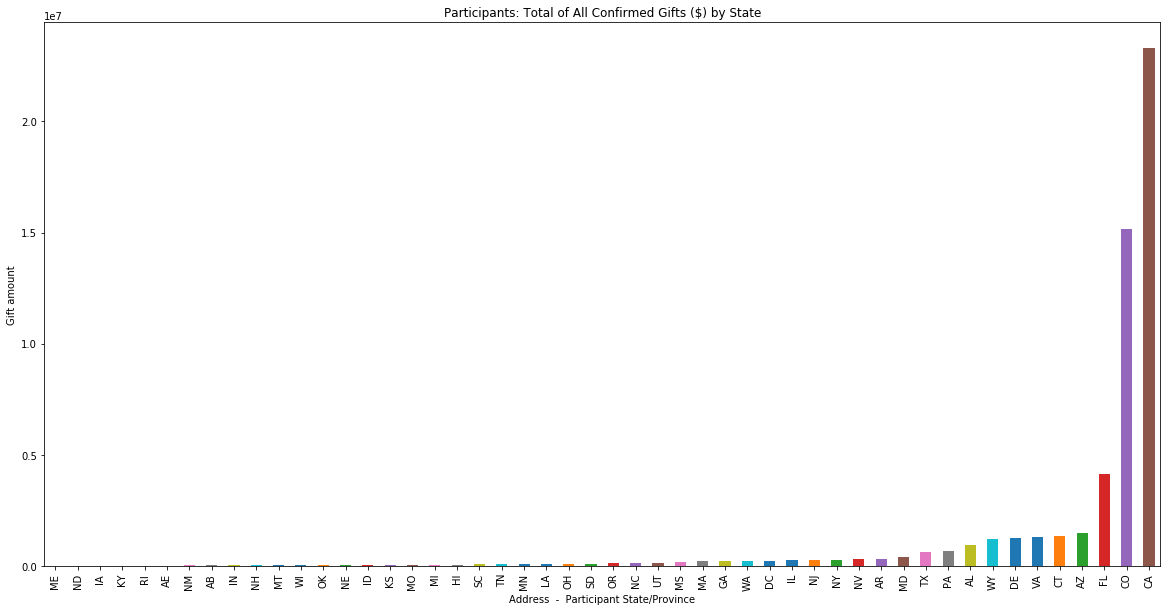

In [30]:

# What total gifts for all states
plt.figure(figsize=(20,10))
plot_data =participants.groupby('Address  -  Participant State/Province')['Total of All Confirmed Gifts($)'].sum()
plot_data.sort_values()[-50:].plot(kind='bar')
plt.title("Participants: Total of All Confirmed Gifts ($) by State")
plt.ylabel("Gift amount")

Text(0,0.5,'Gift amount')

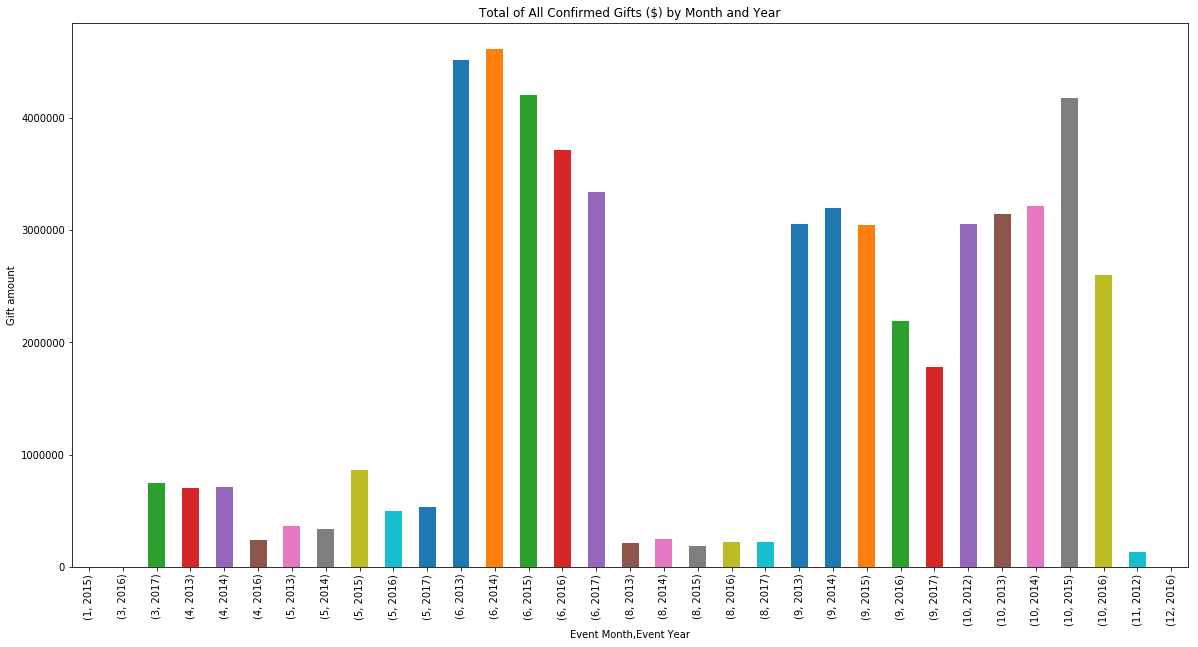

In [31]:
# sum of total gifts by month and year

plt.figure(figsize=(20,10))
plot_data =participants.groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Total of All Confirmed Gifts ($) by Month and Year")
plt.ylabel("Gift amount")

Text(0,0.5,'Gift amount')

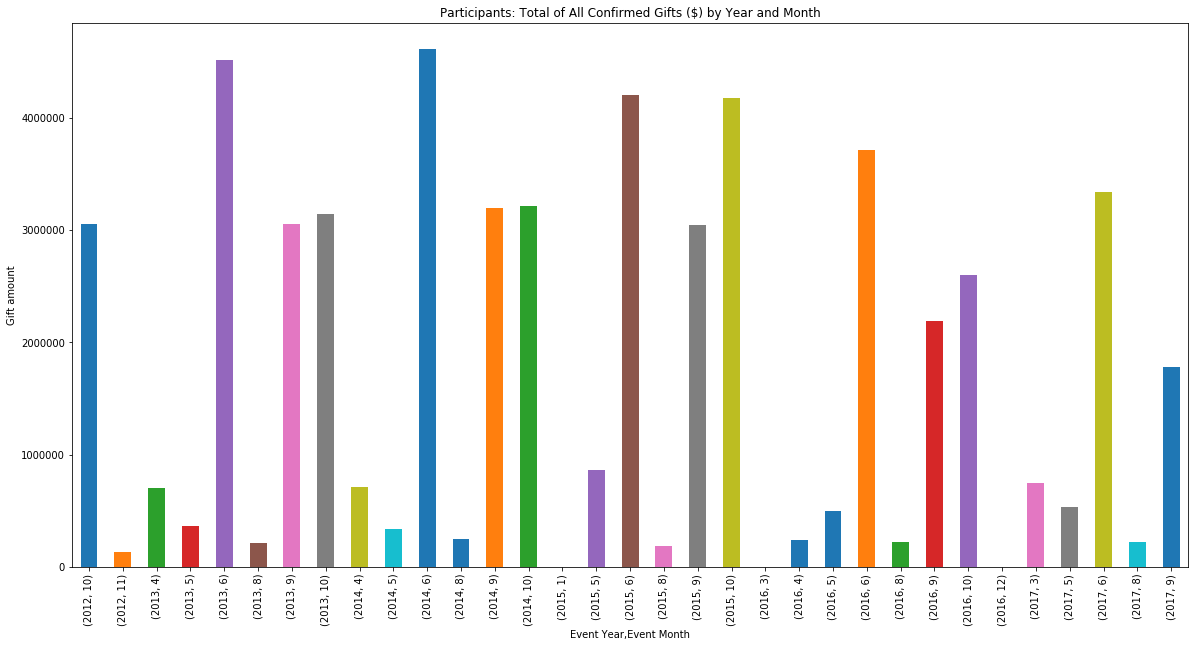

In [32]:
# sum of total gifts by month and year

plt.figure(figsize=(20,10))
plot_data =participants.groupby(['Event Year','Event Month'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Participants: Total of All Confirmed Gifts ($) by Year and Month")
plt.ylabel("Gift amount")

Text(0,0.5,'Gift amount')

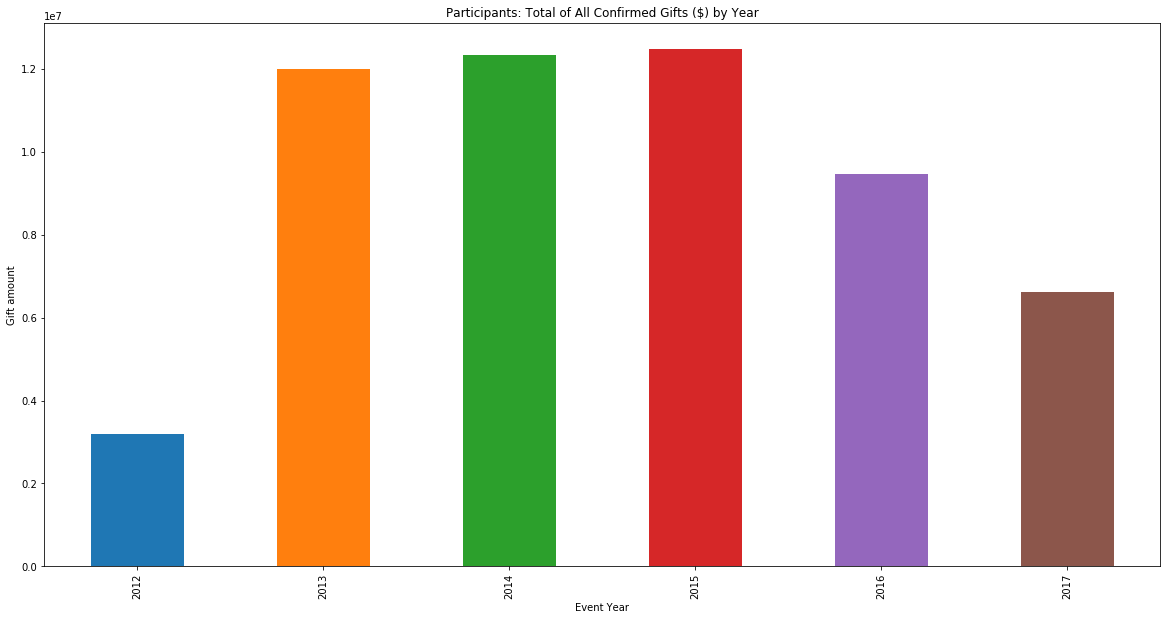

In [33]:
# sum of total gifts by month and year

plt.figure(figsize=(20,10))
plot_data =participants.groupby(['Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Participants: Total of All Confirmed Gifts ($) by Year")
plt.ylabel("Gift amount")

In [34]:
# Total Gifts by month, year and state
participants.groupby(['Event Month','Event Year','Address  -  Participant State/Province'])['Total of All Confirmed Gifts($)'].sum()

Event Month  Event Year  Address  -  Participant State/Province
1            2015        CO                                             0.00
                         TX                                             0.00
3            2016        AK                                             0.00
                         CA                                             0.00
                         CO                                             0.00
                         CT                                             0.00
                         FL                                             0.00
                         GA                                             0.00
                         IL                                             0.00
                         IN                                             0.00
                         KY                                             0.00
                         MD                                             0.00
            

In [35]:
# Total Gifts by month, year and state
participants.groupby(['Address  -  Participant State/Province','Event Year','Event Month',])['Total of All Confirmed Gifts($)'].sum()

Address  -  Participant State/Province  Event Year  Event Month
AB                                      2012        10               7635.00
                                        2013        10               4225.00
                                        2014        10               7880.00
                                        2015        6                4330.00
                                                    10               4750.00
                                        2016        10               3865.00
                                        2017        6                2325.00
AE                                      2012        10               2075.00
                                        2013        4                 250.00
                                                    6                7924.00
                                                    9                 470.00
                                                    10               1238.00
            

Text(0,0.5,'Total of All Confirmed Gifts($)')

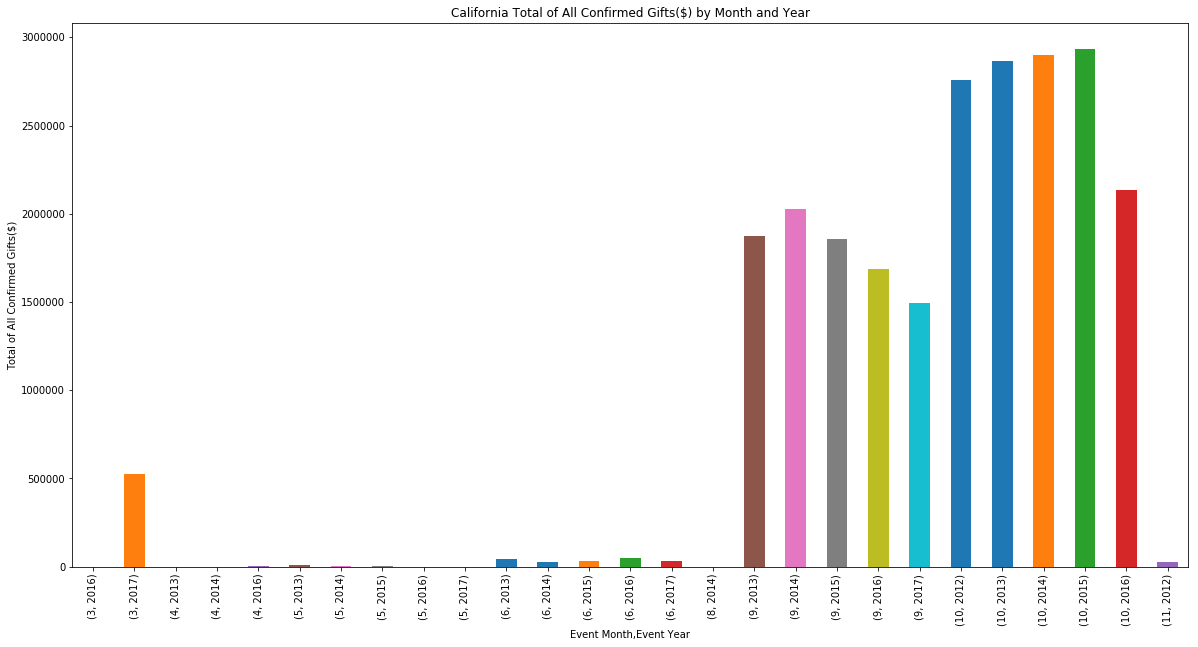

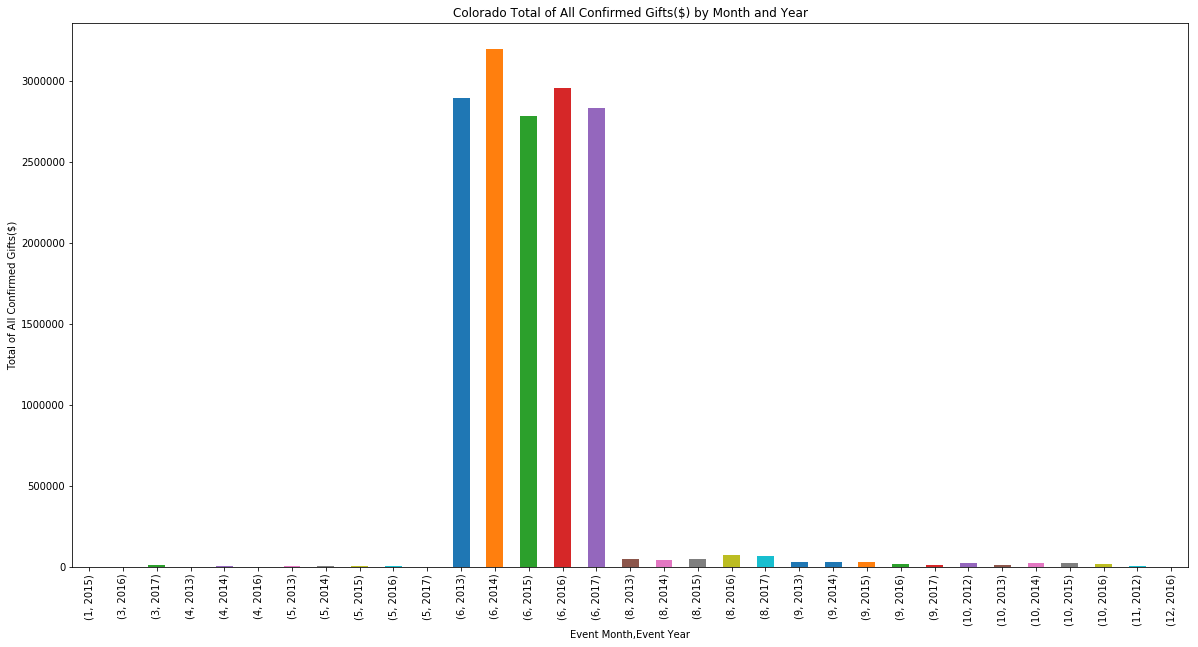

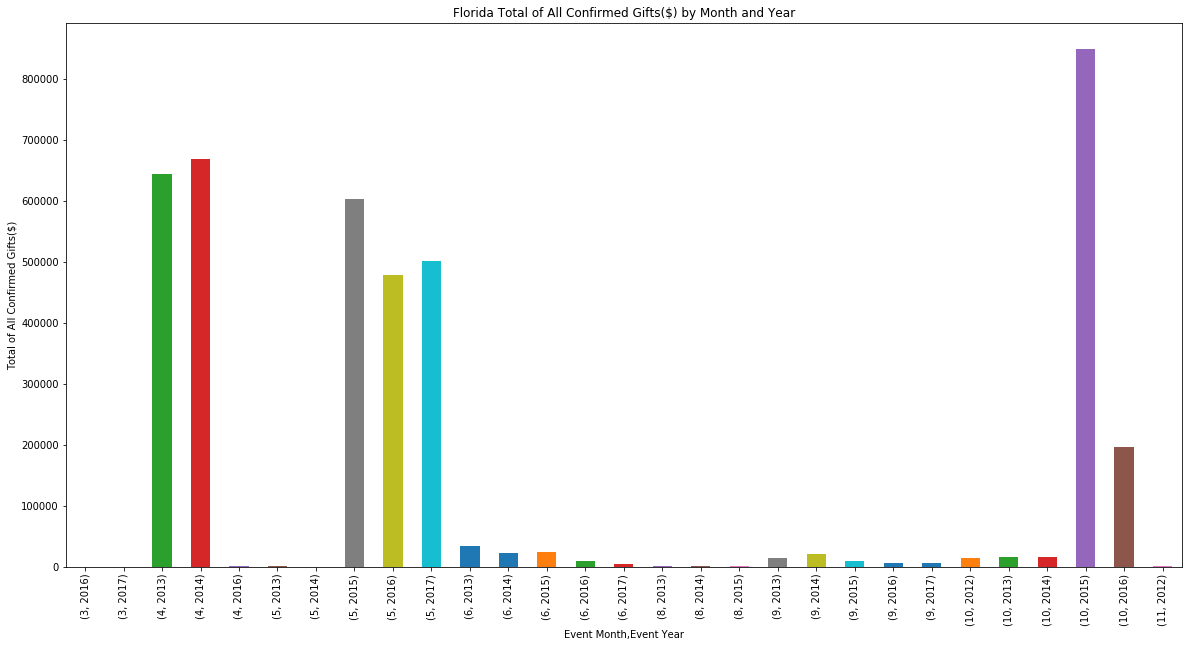

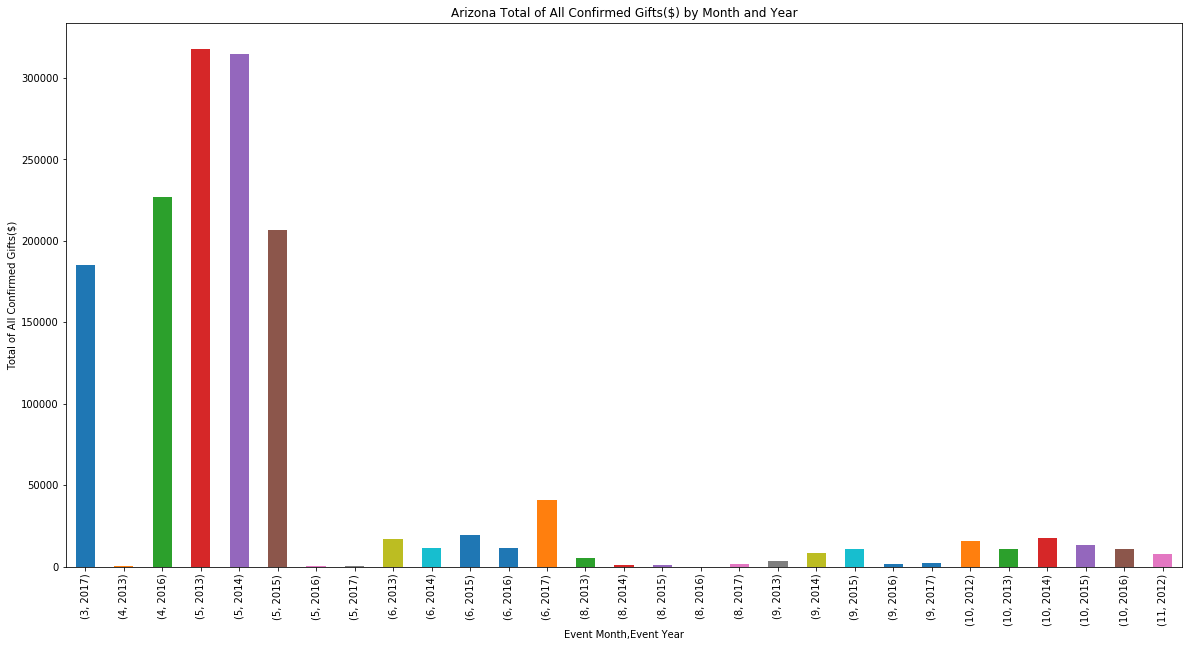

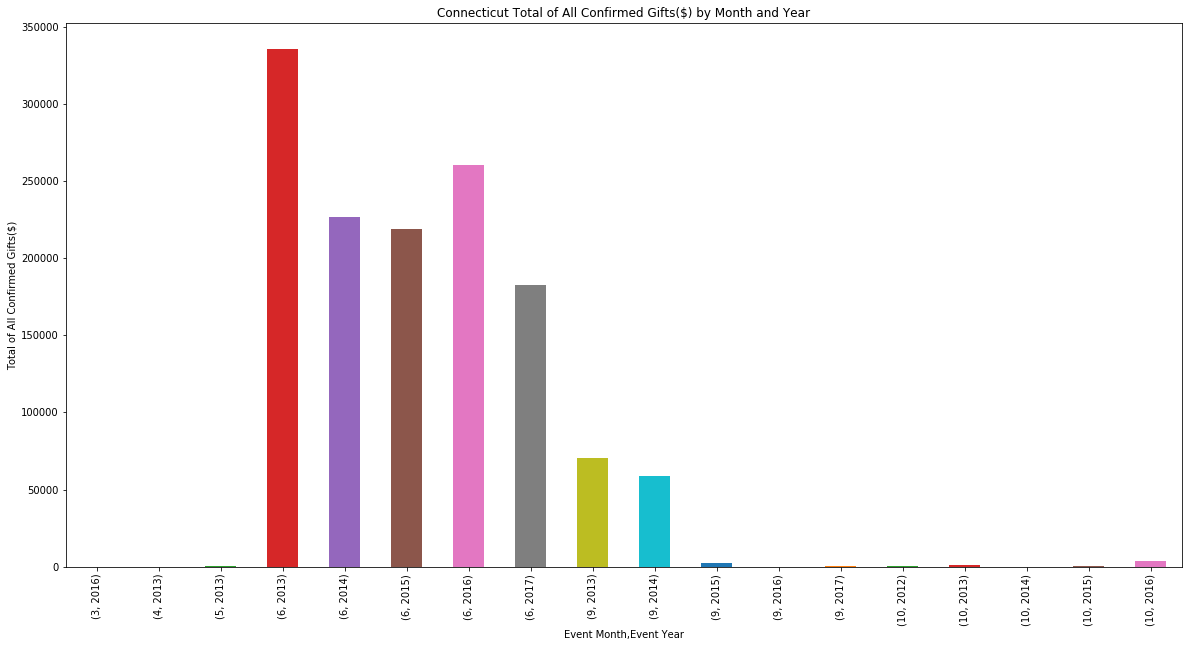

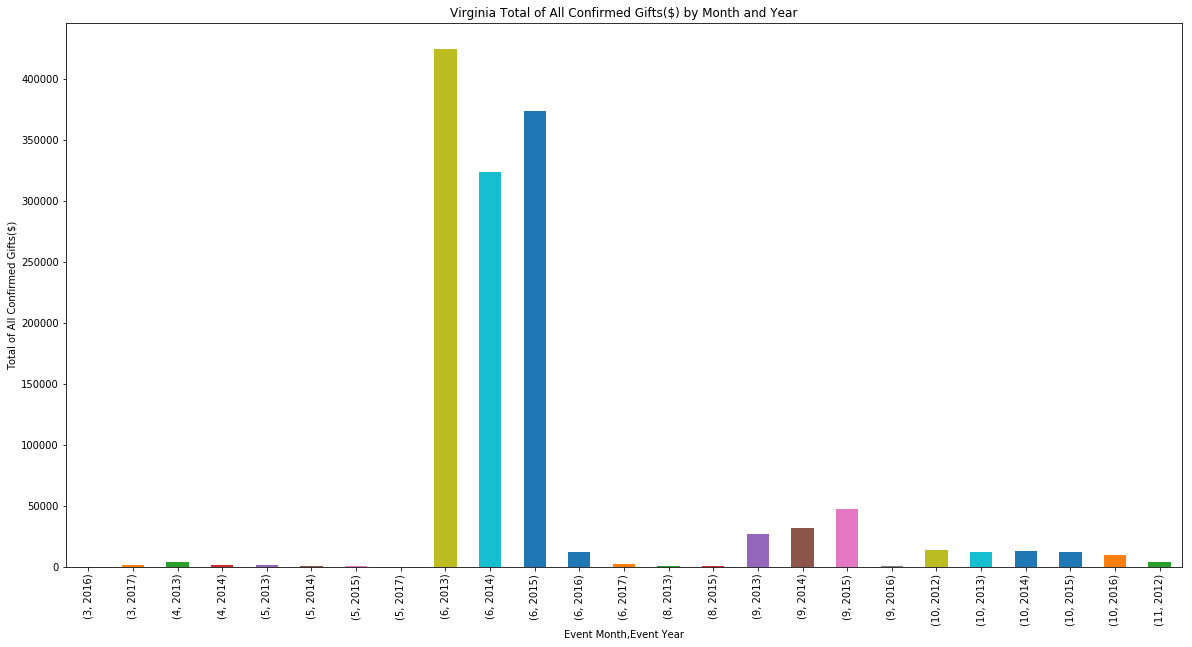

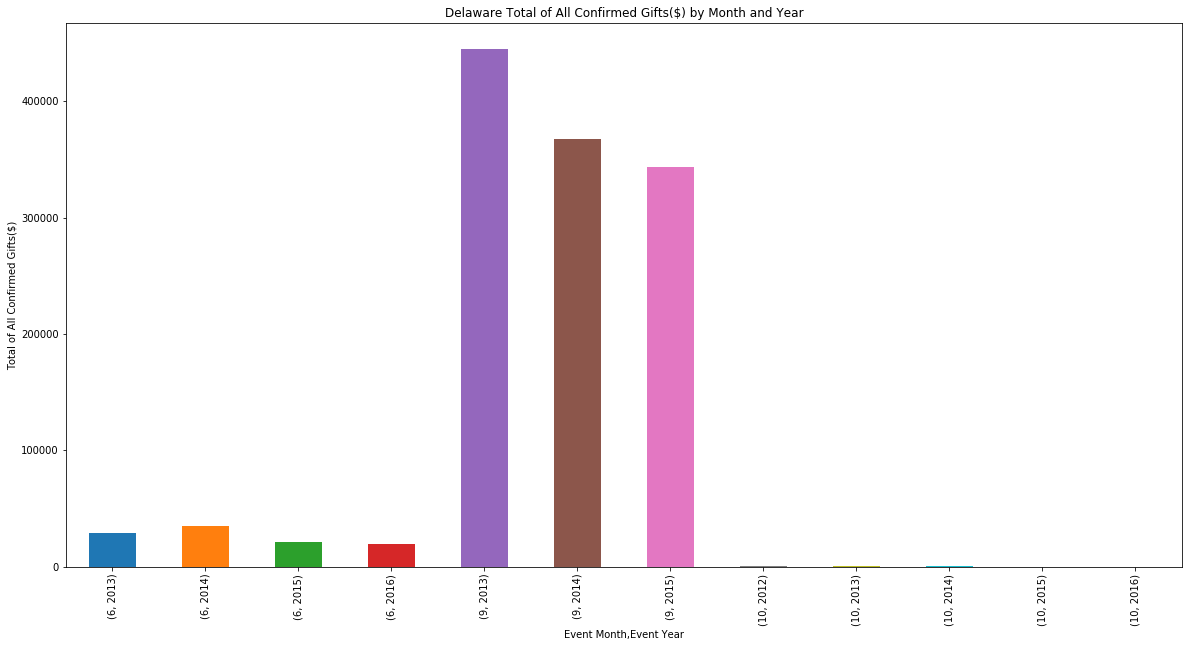

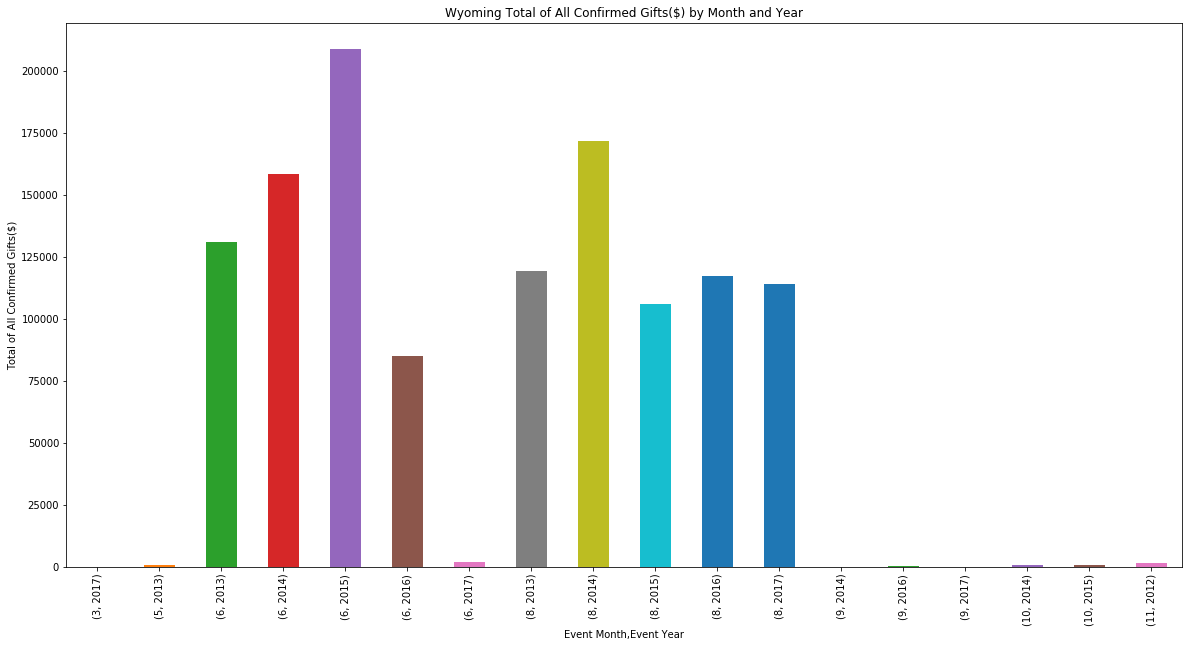

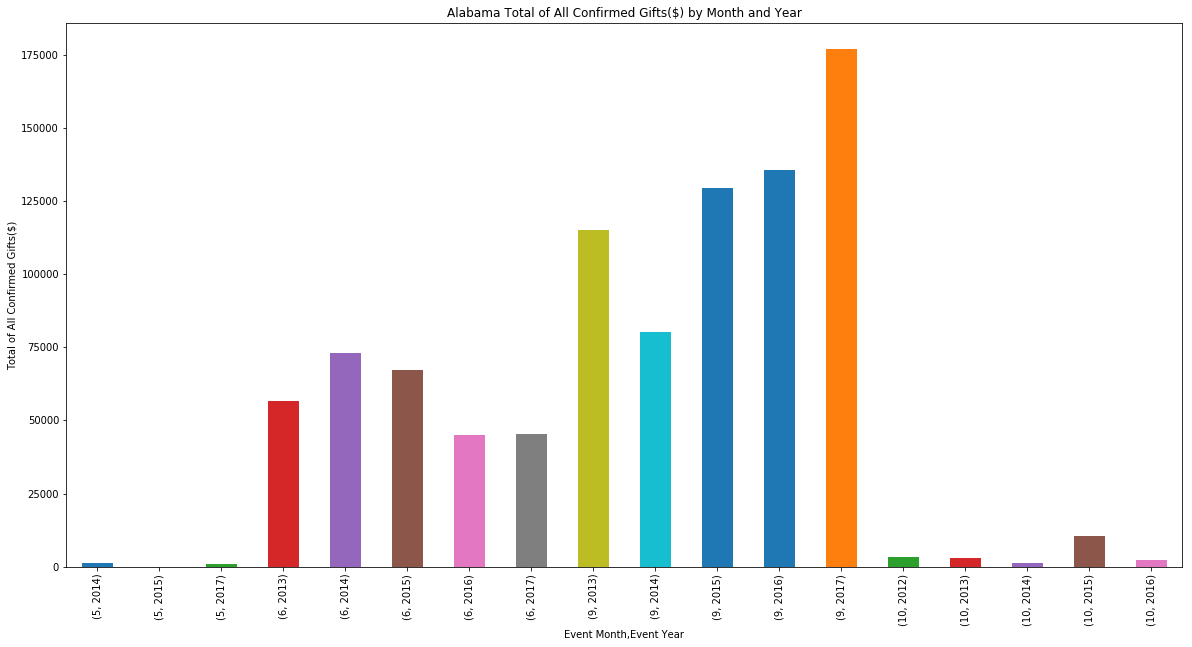

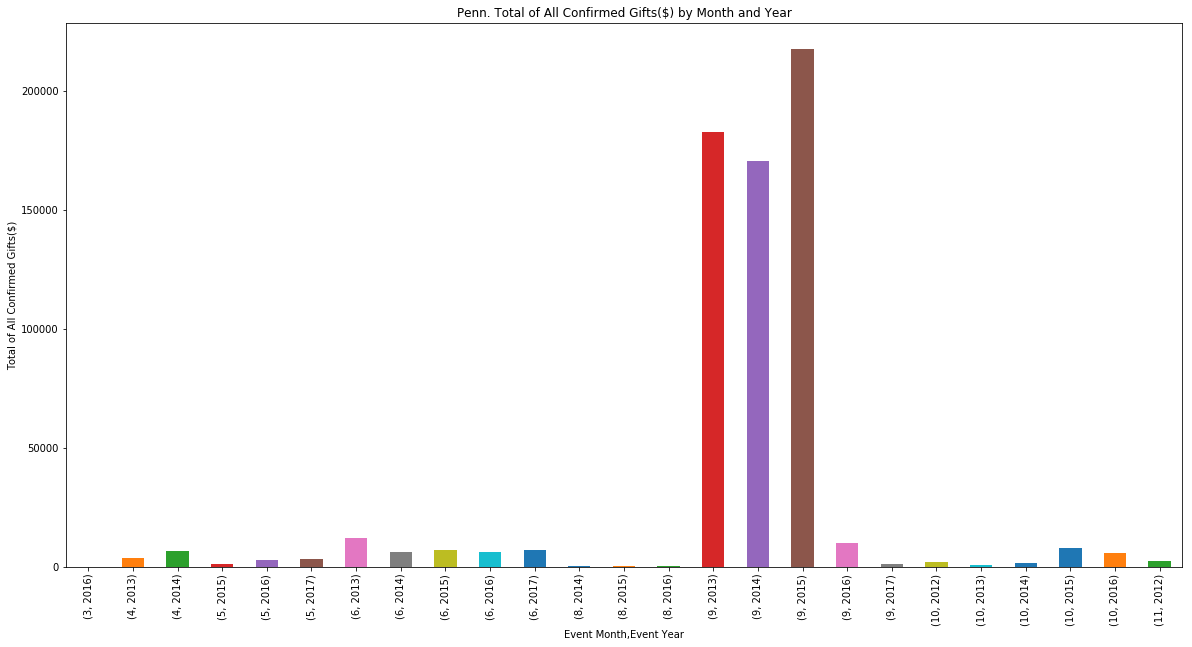

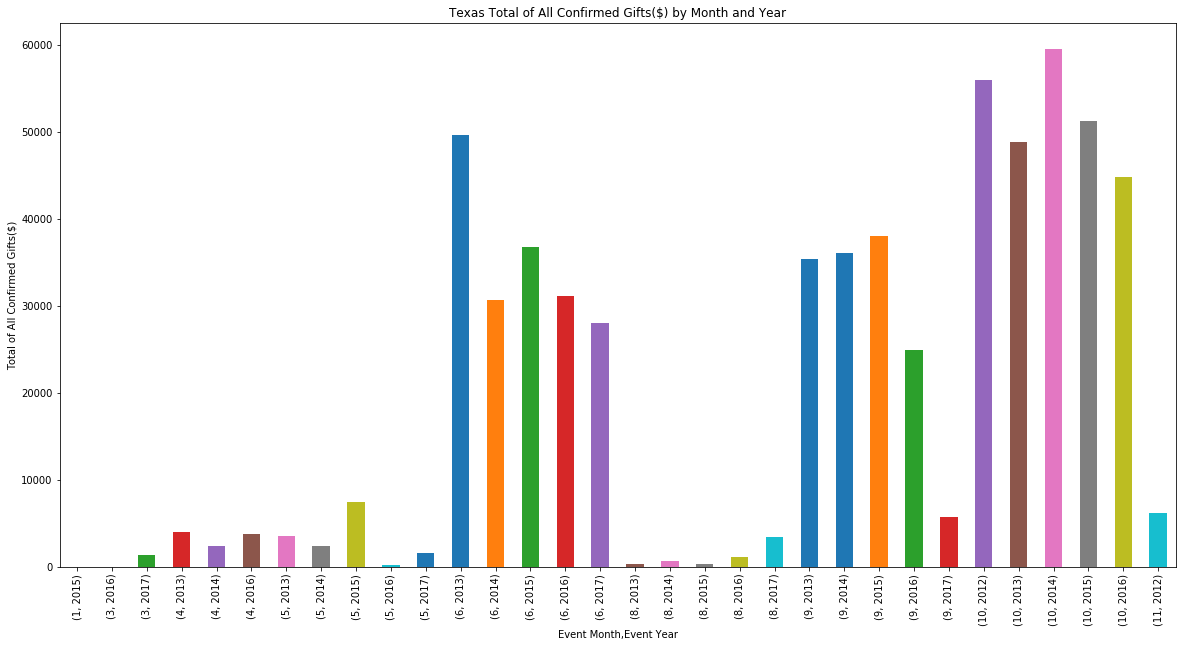

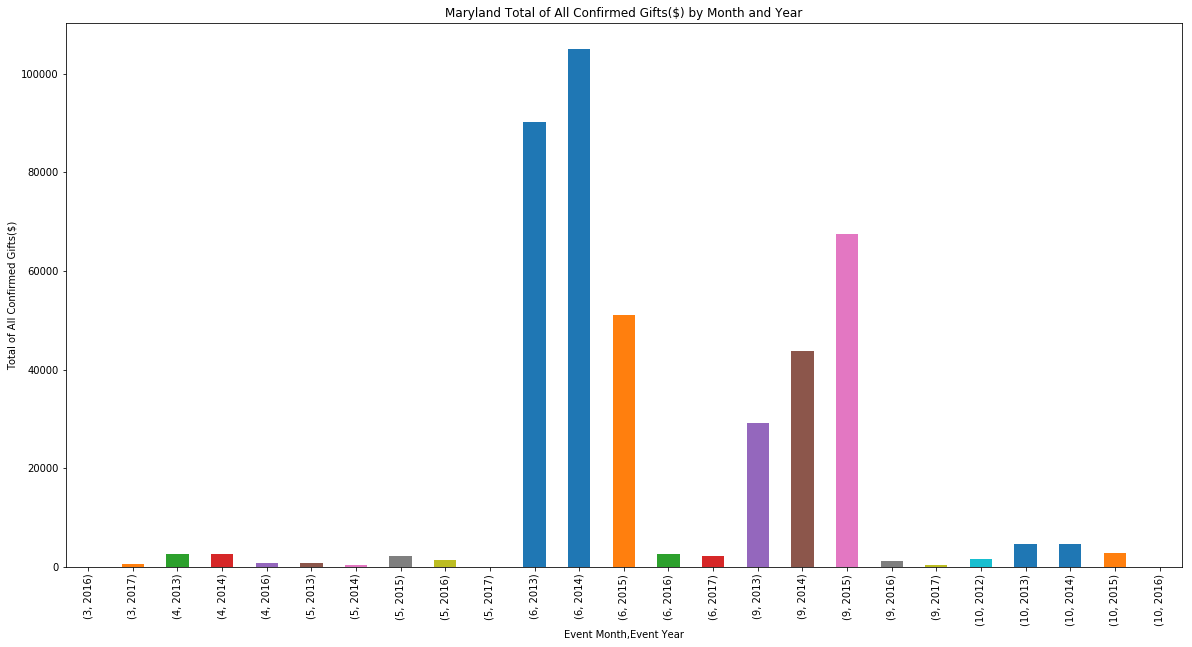

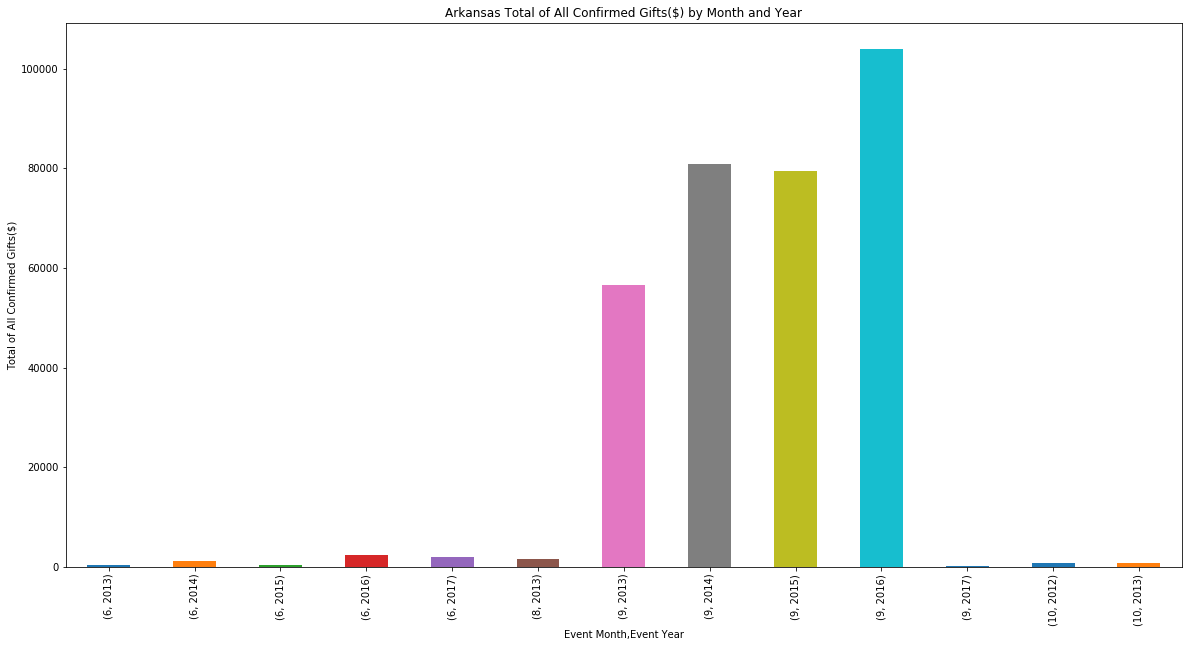

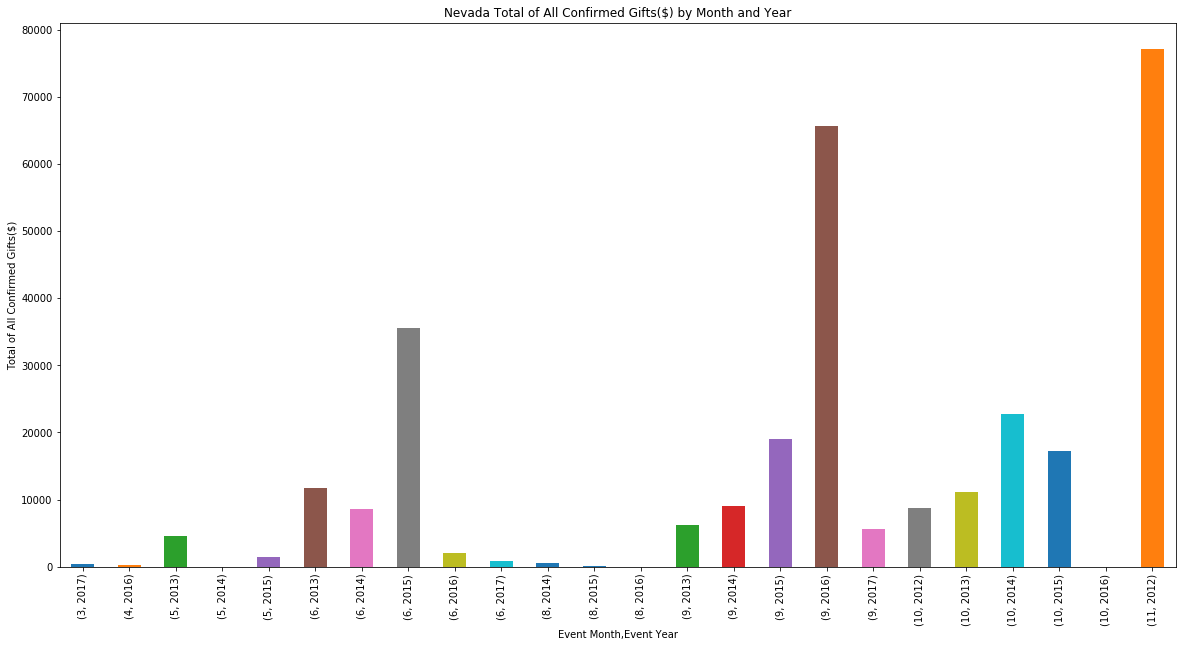

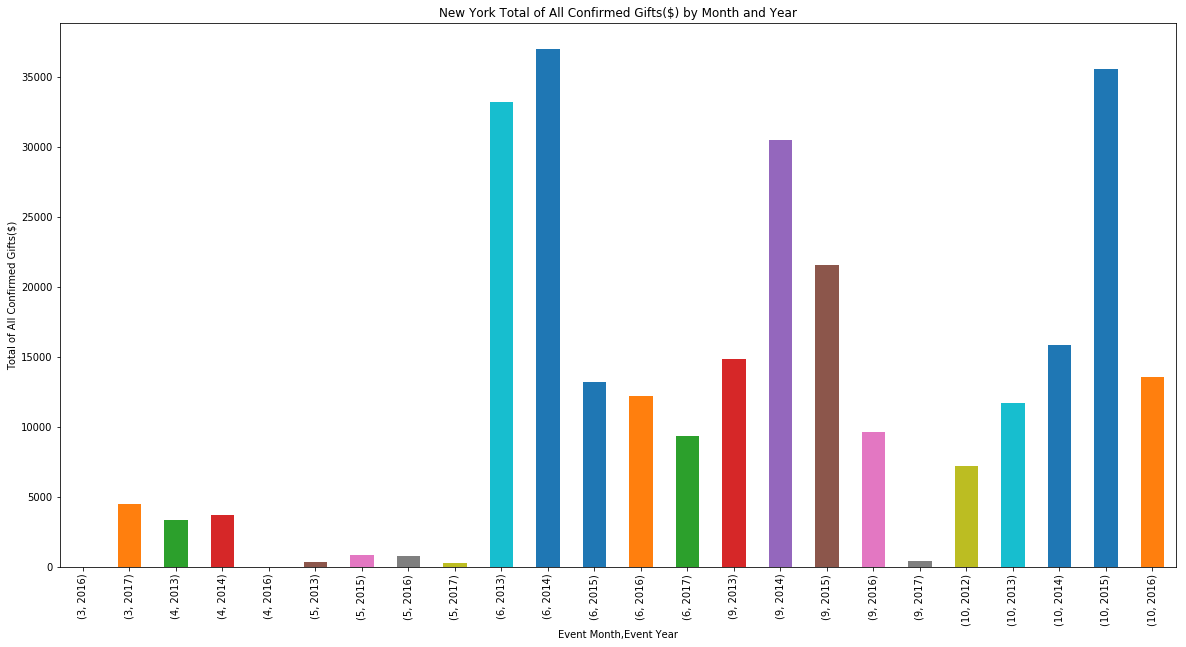

In [36]:
# sum of total gifts by month and year top 15 Local Team Captain 'Address  -  Participant State/Province' /Provinces

plt.figure(figsize=(20,10))
plot_data =participants[participants['Address  -  Participant State/Province'] == 'CA'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("California Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Address  -  Participant State/Province'] == 'CO'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Colorado Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Address  -  Participant State/Province'] == 'FL'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Florida Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Address  -  Participant State/Province'] == 'AZ'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Arizona Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Address  -  Participant State/Province'] == 'CT'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Connecticut Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Address  -  Participant State/Province'] == 'VA'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Virginia Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Address  -  Participant State/Province'] == 'DE'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Delaware Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Address  -  Participant State/Province'] == 'WY'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Wyoming Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Address  -  Participant State/Province'] == 'AL'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Alabama Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Address  -  Participant State/Province'] == 'PA'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Penn. Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Address  -  Participant State/Province'] == 'TX'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Texas Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Address  -  Participant State/Province'] == 'MD'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Maryland Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Address  -  Participant State/Province'] == 'AR'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Arkansas Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Address  -  Participant State/Province'] == 'NV'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Nevada Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Address  -  Participant State/Province'] == 'NY'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("New York Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

Why are the states with the most participants by gifts so different than the other data sets like bike teams and national bike teams and events?

Text(0.5,0.98,'Total of All Confirmed Gifts($) by Participant Connection to MS and Participant State/Province')

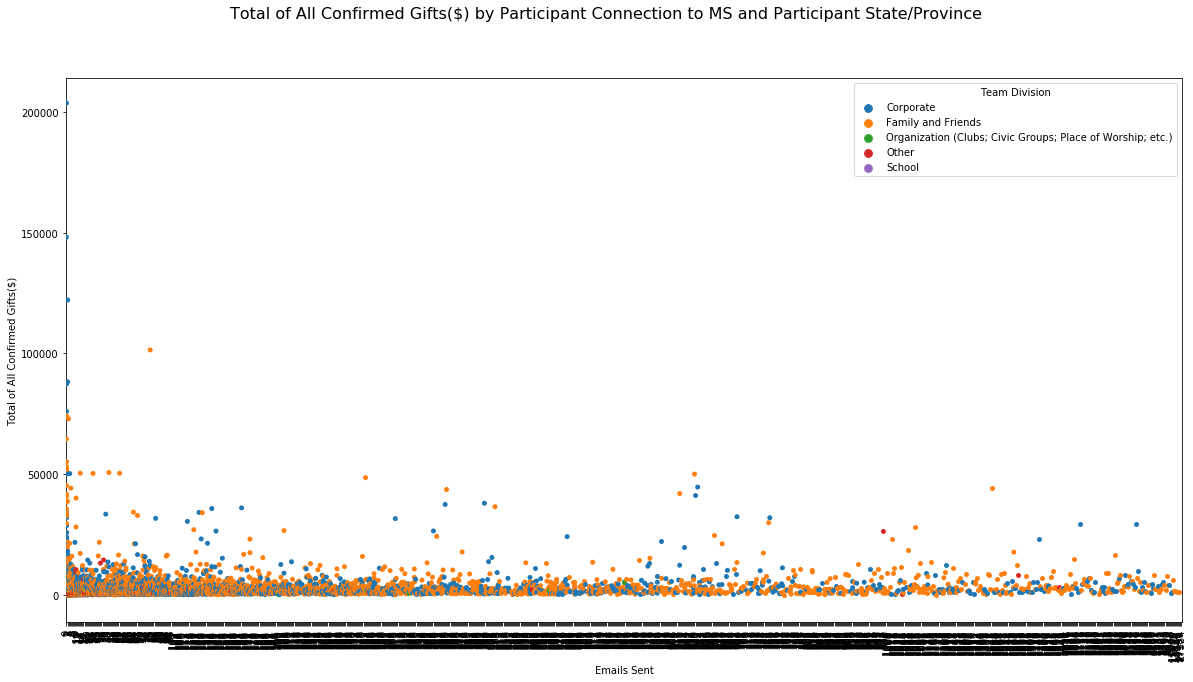

In [157]:
# sum of total gifts by month and year



plt.figure(figsize=(20,10))

sns.stripplot(x='Emails Sent', y="Total of All Confirmed Gifts($)", hue="Team Division",data=participants,  jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total of All Confirmed Gifts($) by Participant Connection to MS and Participant State/Province', fontsize=16)



Text(0,0.5,'Count')

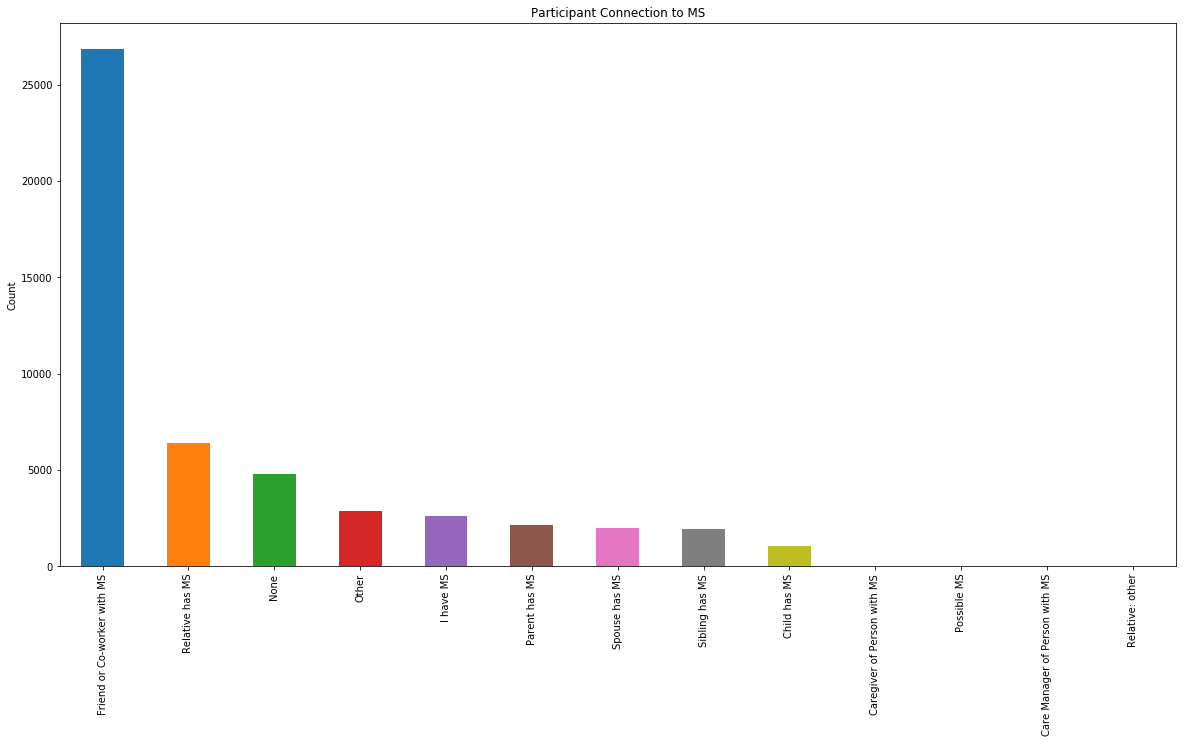

In [149]:

plt.figure(figsize=(20,10))
plot_data =participants['Participant Connection to MS'].value_counts()
plot_data.plot(kind='bar')
plt.title("Participant Connection to MS")
plt.ylabel("Count")

Text(0.5,0.98,'Total of All Confirmed Gifts($) by Participant Connection to MS and Participant State/Province')

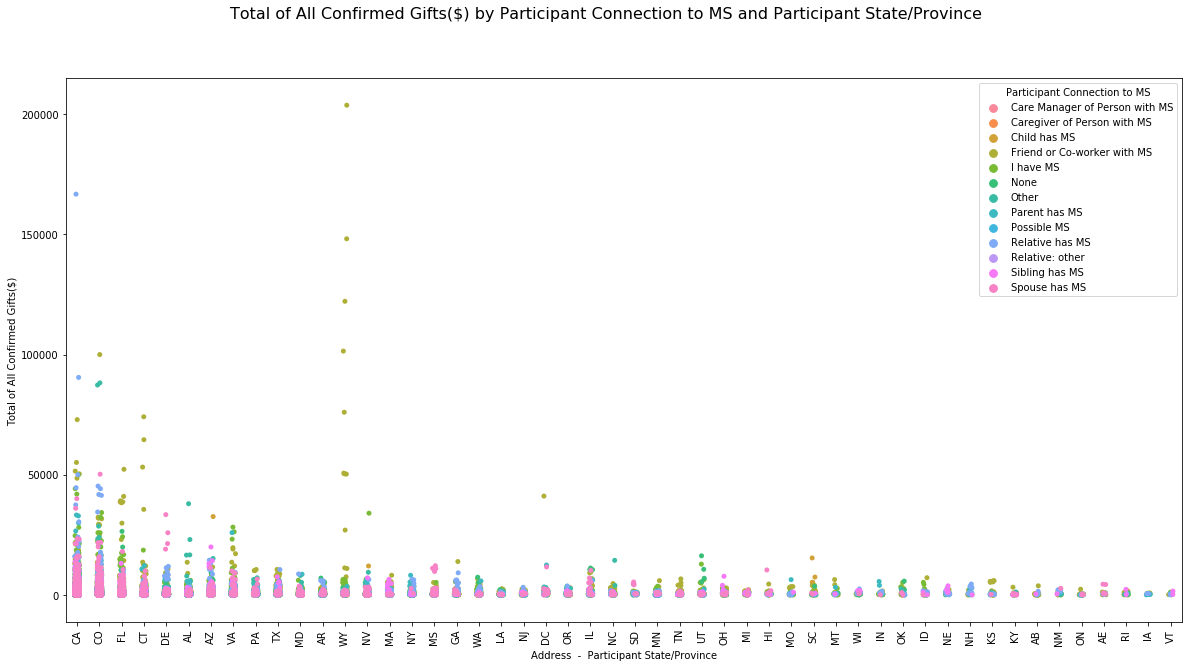

In [37]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Address  -  Participant State/Province', y="Total of All Confirmed Gifts($)", hue="Participant Connection to MS",data=participants, order = participants['Address  -  Participant State/Province'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total of All Confirmed Gifts($) by Participant Connection to MS and Participant State/Province', fontsize=16)



Text(0.5,0.98,'Total of All Confirmed Gifts($) by Participant Connection to MS and Team Division')

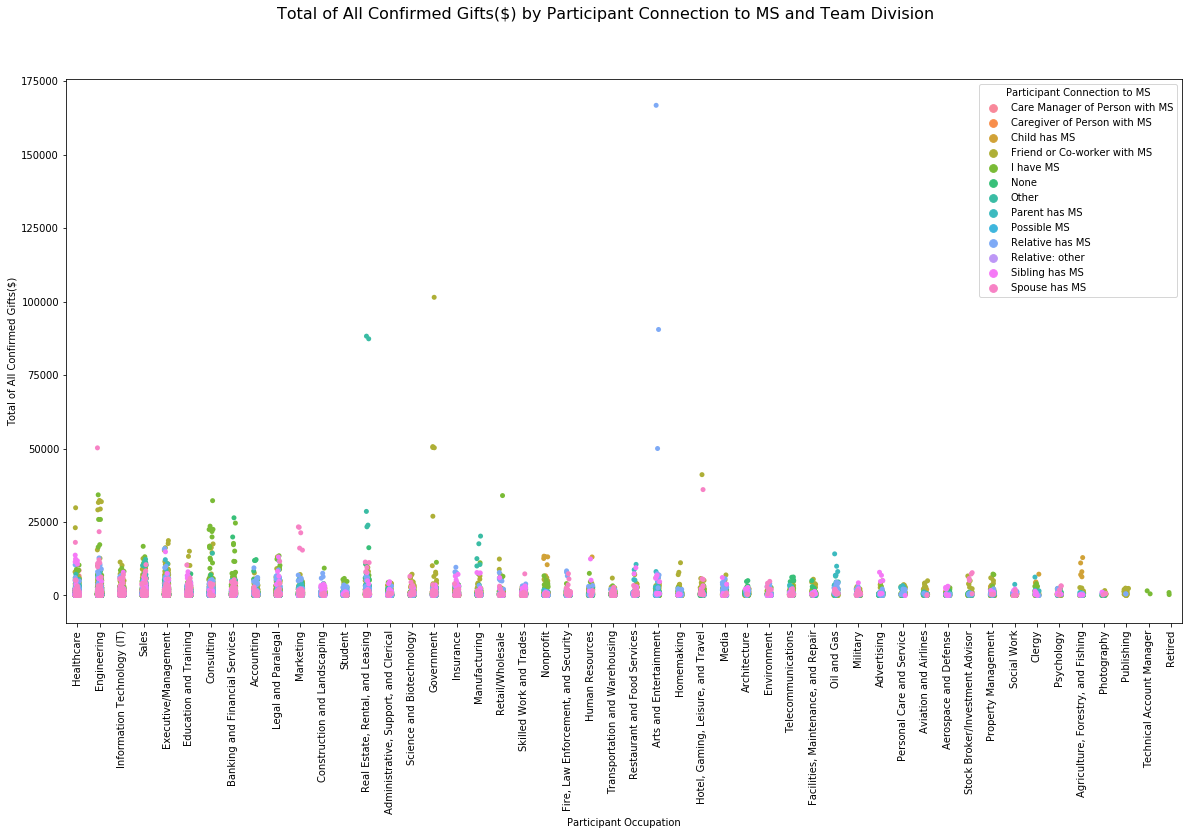

In [38]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Participant Occupation', y="Total of All Confirmed Gifts($)", hue="Participant Connection to MS",data=participants, order = participants['Participant Occupation'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total of All Confirmed Gifts($) by Participant Connection to MS and Team Division', fontsize=16)



Text(0.5,0.98,'Total of All Confirmed Gifts($) by Participant Occupation (Top 50) and Team Division')

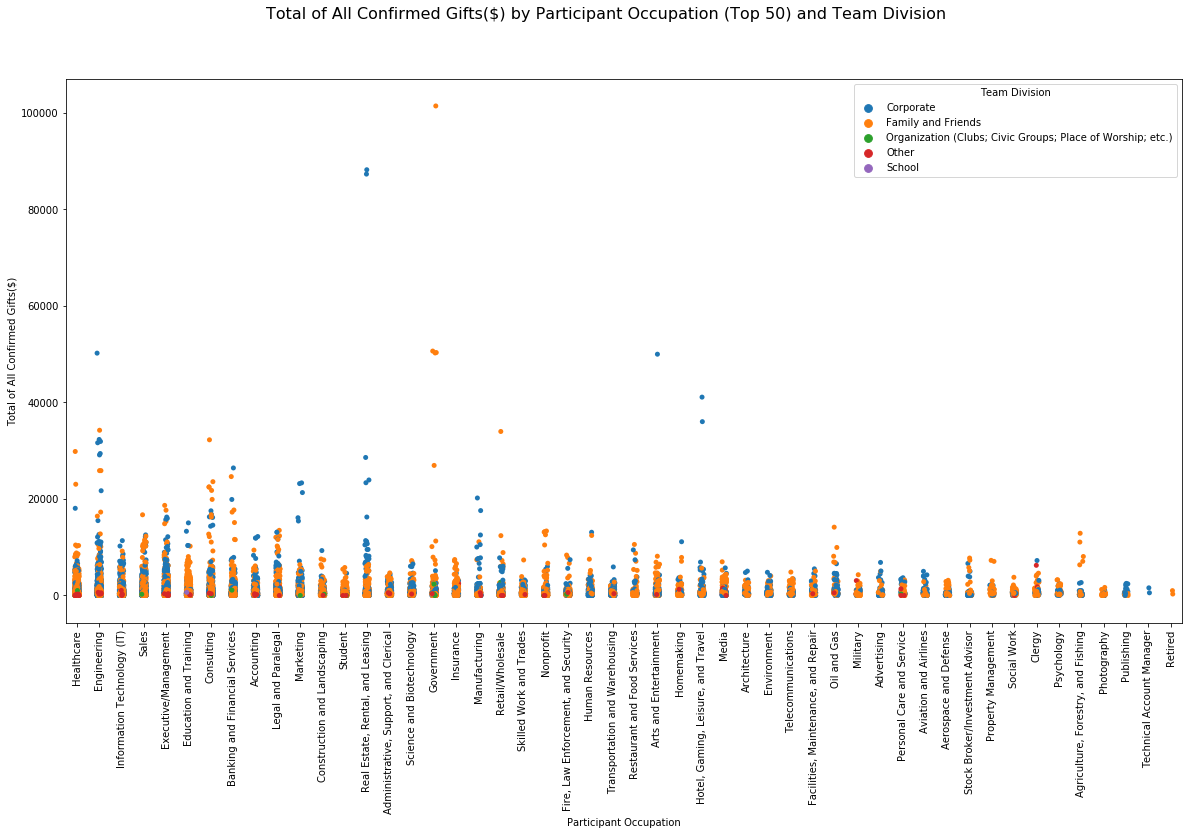

In [39]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Participant Occupation', y="Total of All Confirmed Gifts($)", hue="Team Division",data=participants, order = participants['Participant Occupation'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total of All Confirmed Gifts($) by Participant Occupation (Top 50) and Team Division', fontsize=16)



Text(0,0.5,'Counts')

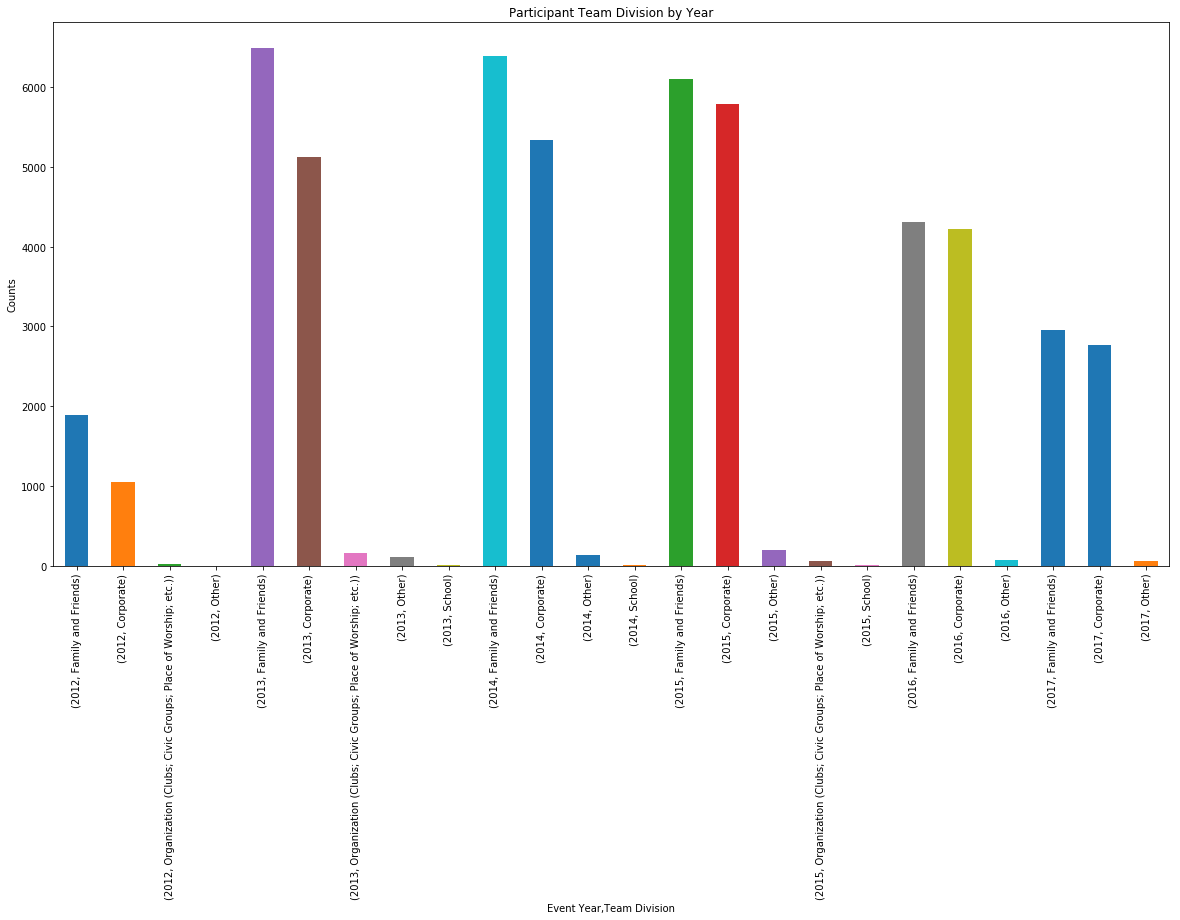

In [40]:
# sum of total gifts by month and year

plt.figure(figsize=(20,10))
plot_data =participants.groupby(['Event Year'])['Team Division'].value_counts()
plot_data.plot(kind='bar')
plt.title("Participant Team Division by Year")
plt.ylabel("Counts")

In [159]:
participants.groupby(['Participant Occupation'])['Total of All Confirmed Gifts($)'].sum()

Participant Occupation
Accounting                                649308.95
Administrative, Support, and Clerical     338780.50
Advertising                               107579.63
Aerospace and Defense                      62726.88
Agriculture, Forestry, and Fishing         67160.36
Architecture                              145562.57
Arts and Entertainment                    549087.76
Aviation and Airlines                      76124.41
Banking and Financial Services            833121.55
Clergy                                     80827.51
Construction and Landscaping              369074.49
Consulting                               1105513.37
Education and Training                    994434.61
Engineering                              2321060.39
Environment                               132934.40
Executive/Management                     1566358.34
Facilities, Maintenance, and Repair       120108.02
Fire, Law Enforcement, and Security       176017.53
Government                               

In [160]:


from pandas import ExcelWriter

writer = ExcelWriter('Participants_Occupations_Gift Sum.xlsx')
participants.groupby(['Participant Occupation'])['Total of All Confirmed Gifts($)'].sum().to_excel(writer,'Sheet1')
writer.save()

In [41]:
participants['Participant Occupation'].value_counts()

Healthcare                               2315
Engineering                              2225
Information Technology (IT)              1718
Sales                                    1442
Executive/Management                     1224
Education and Training                   1199
Consulting                                844
Banking and Financial Services            828
Accounting                                814
Legal and Paralegal                       708
Marketing                                 606
Construction and Landscaping              526
Student                                   505
Real Estate, Rental, and Leasing          496
Administrative, Support, and Clerical     475
Science and Biotechnology                 378
Government                                357
Insurance                                 347
Manufacturing                             341
Retail/Wholesale                          338
Skilled Work and Trades                   329
Nonprofit                         

Text(0,0.5,'Counts')

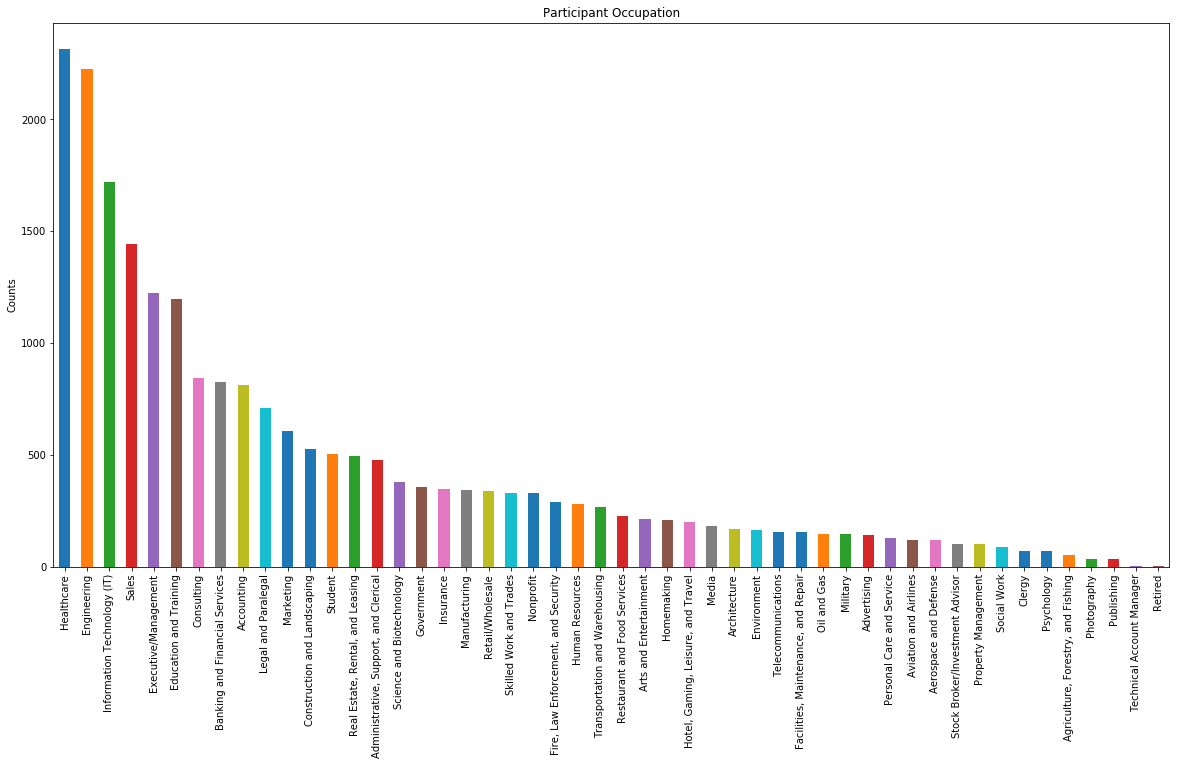

In [42]:
# participants occupation counts

plt.figure(figsize=(20,10))
plot_data =participants['Participant Occupation'].value_counts()
plot_data.plot(kind='bar')
plt.title("Participant Occupation")
plt.ylabel("Counts")

Text(0,0.5,'Total of All Confirmed Gifts($)')

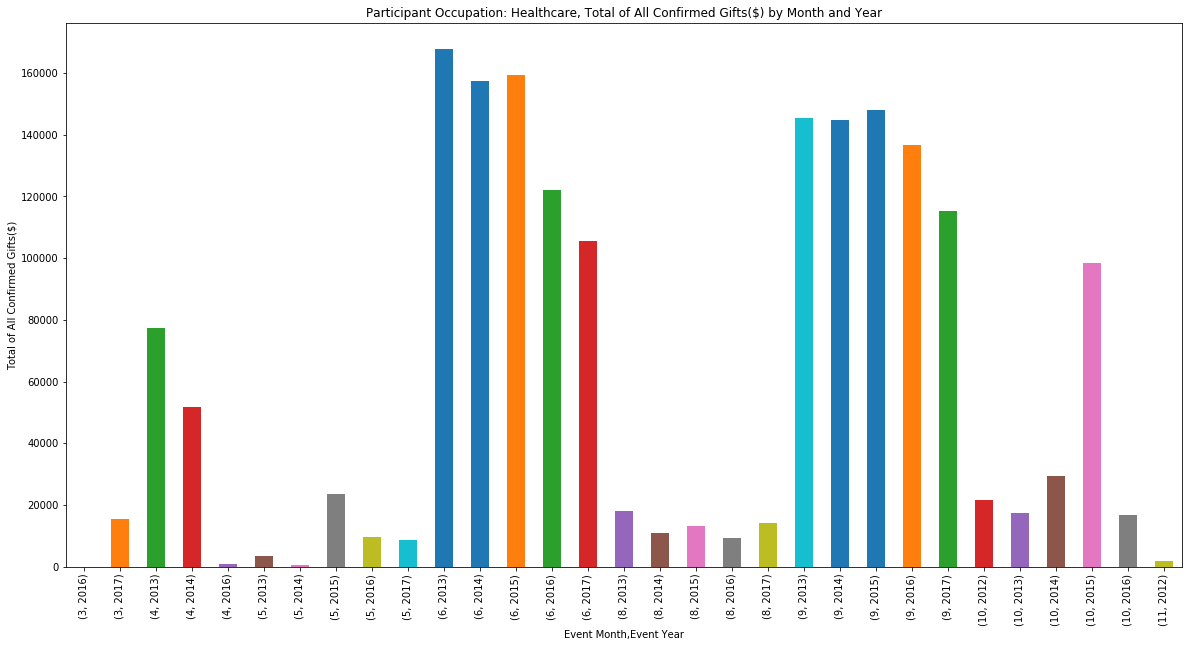

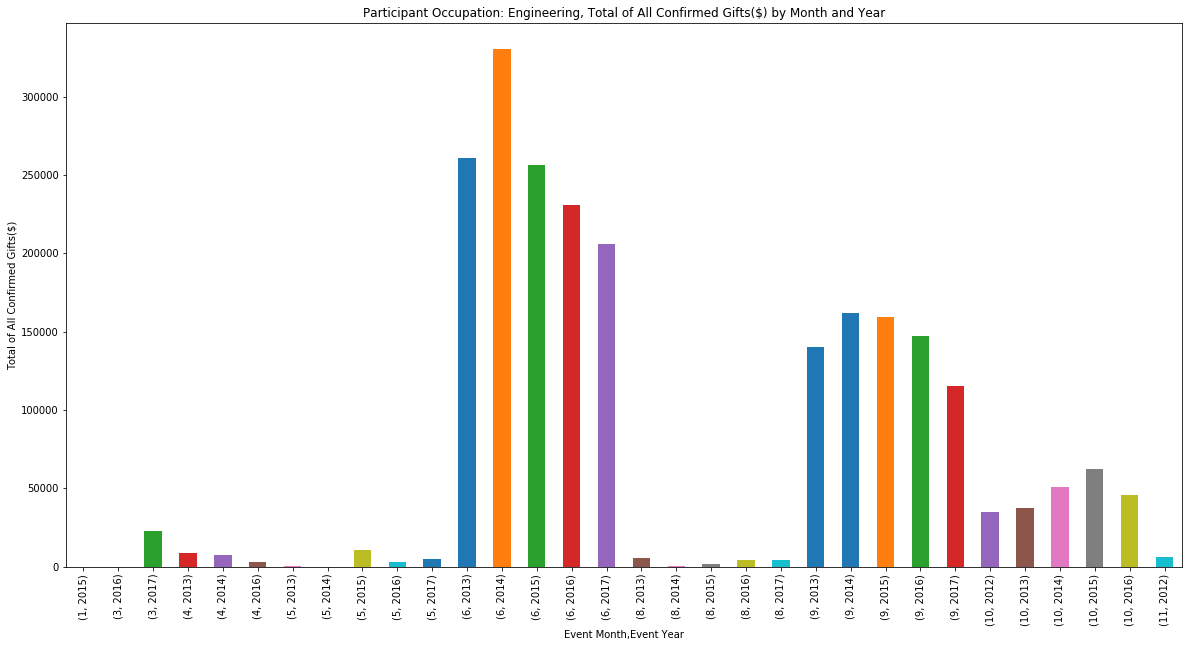

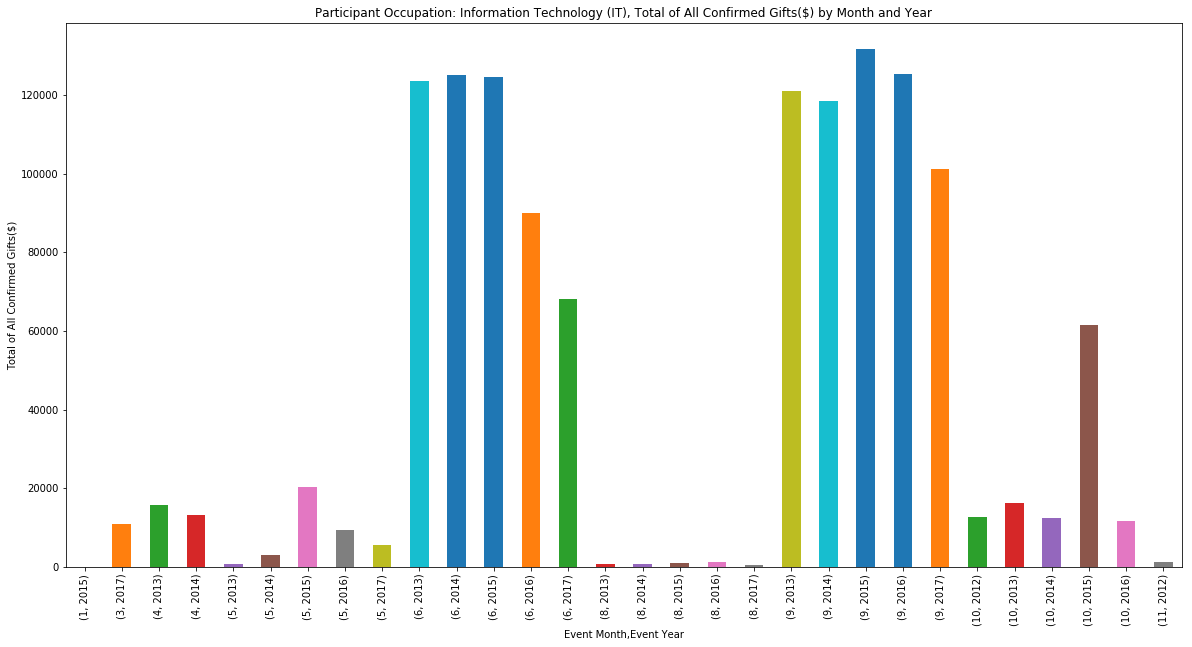

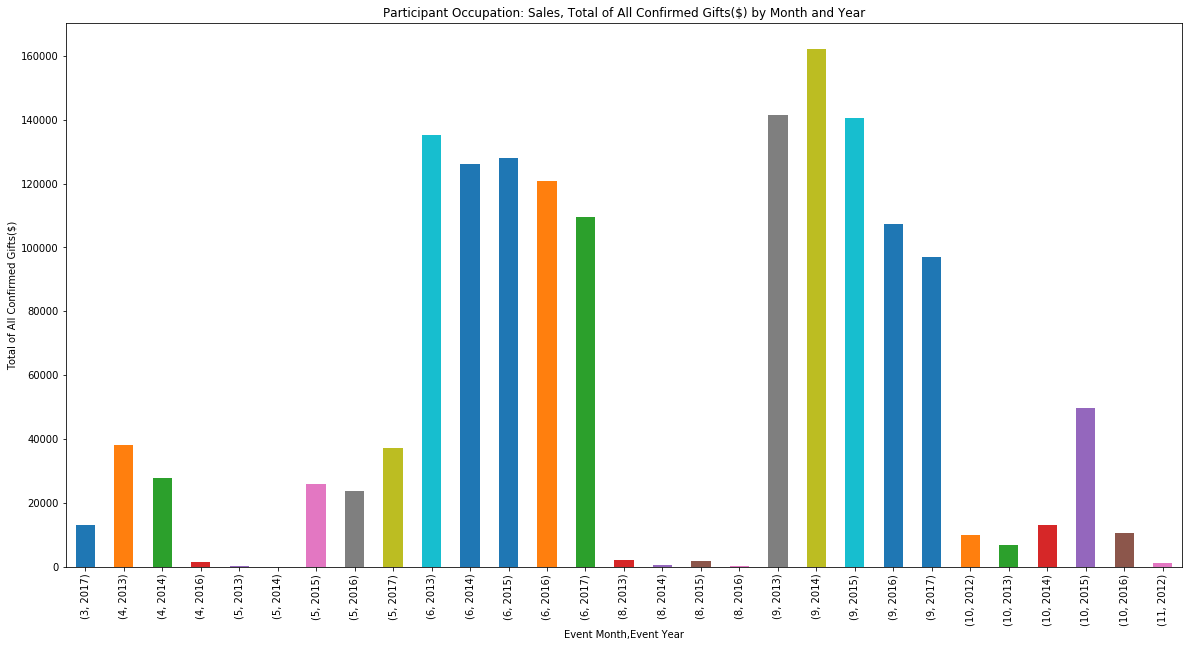

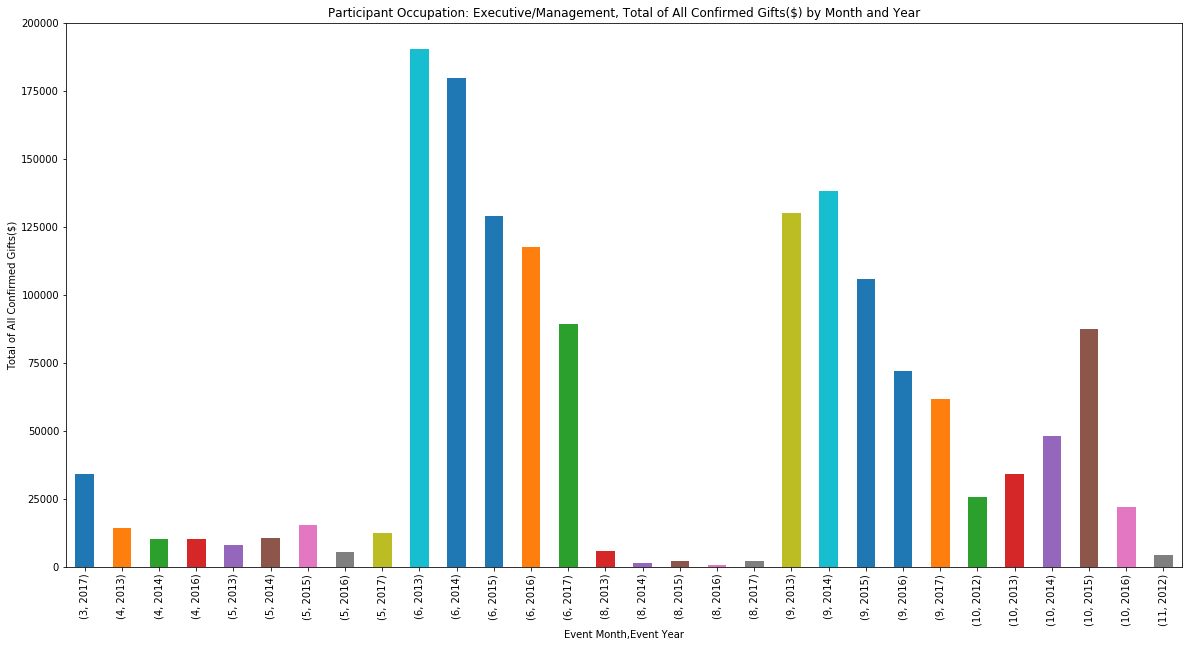

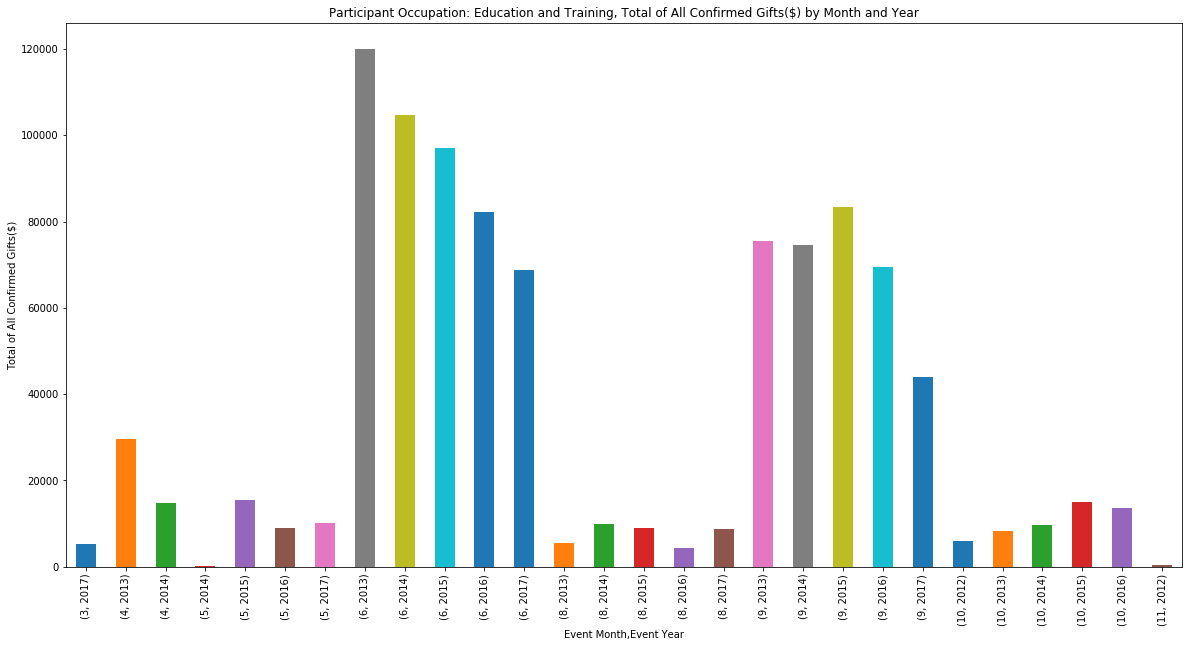

In [43]:
plt.figure(figsize=(20,10))
plot_data =participants[participants['Participant Occupation'] == 'Healthcare'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Participant Occupation: Healthcare, Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Participant Occupation'] == 'Engineering'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Participant Occupation: Engineering, Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Participant Occupation'] == 'Information Technology (IT)'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Participant Occupation: Information Technology (IT), Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Participant Occupation'] == 'Sales'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Participant Occupation: Sales, Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Participant Occupation'] == 'Executive/Management'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Participant Occupation: Executive/Management, Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

plt.figure(figsize=(20,10))
plot_data =participants[participants['Participant Occupation'] == 'Education and Training'].groupby(['Event Month', 'Event Year'])['Total of All Confirmed Gifts($)'].sum()
plot_data.plot(kind='bar')
plt.title("Participant Occupation: Education and Training, Total of All Confirmed Gifts($) by Month and Year")
plt.ylabel("Total of All Confirmed Gifts($)")

In [44]:
participants.groupby(['Participant Occupation',"Event Year"],as_index=False).agg({"Fiscal Year": "count"})

,Participant Occupation,Event Year,Fiscal Year
0,Accounting,2012,7
1,Accounting,2013,187
2,Accounting,2014,182
3,Accounting,2015,213
4,Accounting,2016,133
5,Accounting,2017,92
6,"Administrative, Support, and Clerical",2012,8
7,"Administrative, Support, and Clerical",2013,115
8,"Administrative, Support, and Clerical",2014,103
9,"Administrative, Support, and Clerical",2015,122


In [45]:
participants.groupby(["Event Year","Team Division"],as_index=False).agg({'Participant Occupation': "count"})

,Event Year,Team Division,Participant Occupation
0,2012,Corporate,80
1,2012,Family and Friends,169
2,2012,Organization (Clubs; Civic Groups; Place of Wo...,4
3,2012,Other,3
4,2013,Corporate,1866
5,2013,Family and Friends,2214
6,2013,Organization (Clubs; Civic Groups; Place of Wo...,64
7,2013,Other,40
8,2013,School,0
9,2014,Corporate,2056


Text(0.5,0.98,'Total of All Confirmed Gifts($) by Gender')

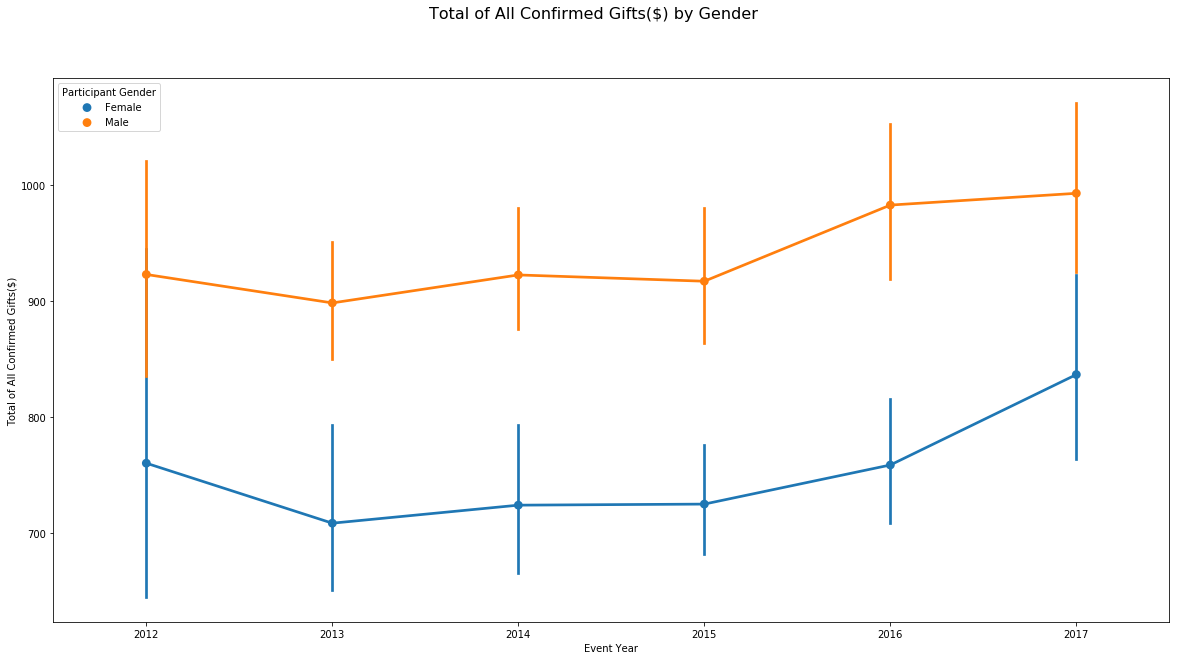

In [46]:
plt.figure(figsize=(20,10))

sns.pointplot(x='Event Year', y="Total of All Confirmed Gifts($)", hue="Participant Gender",data=participants,  jitter=True)
#plt.xticks(rotation=90)
plt.suptitle('Total of All Confirmed Gifts($) by Gender', fontsize=16)



Text(0.5,0.98,'Total From Participant($) by Gender and Team Division')

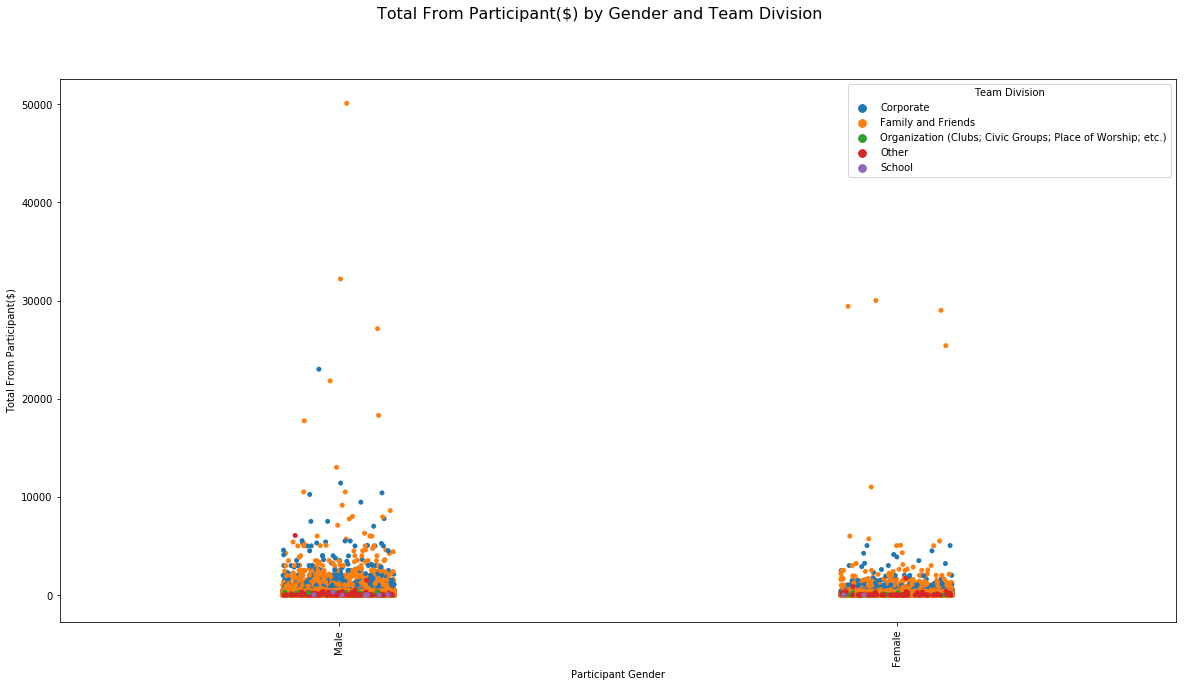

In [47]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Participant Gender', y="Total From Participant($)", hue="Team Division",data=participants, order = participants['Participant Gender'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total From Participant($) by Gender and Team Division', fontsize=16)



Text(0.5,0.98,'Total From Participant($) by Gender and Past Participation')

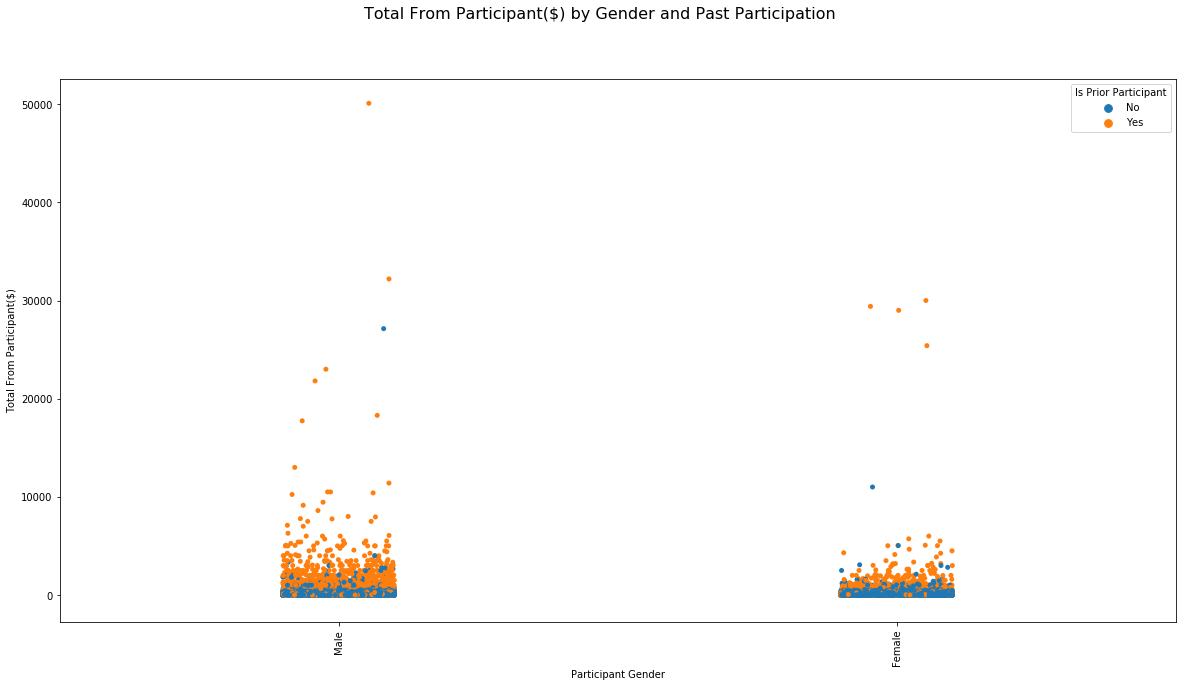

In [48]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Participant Gender', y="Total From Participant($)", hue="Is Prior Participant",data=participants, order = participants['Participant Gender'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total From Participant($) by Gender and Past Participation', fontsize=16)



Text(0.5,0.98,'Total of All Confirmed Gifts($) by Gender and Past Participation')

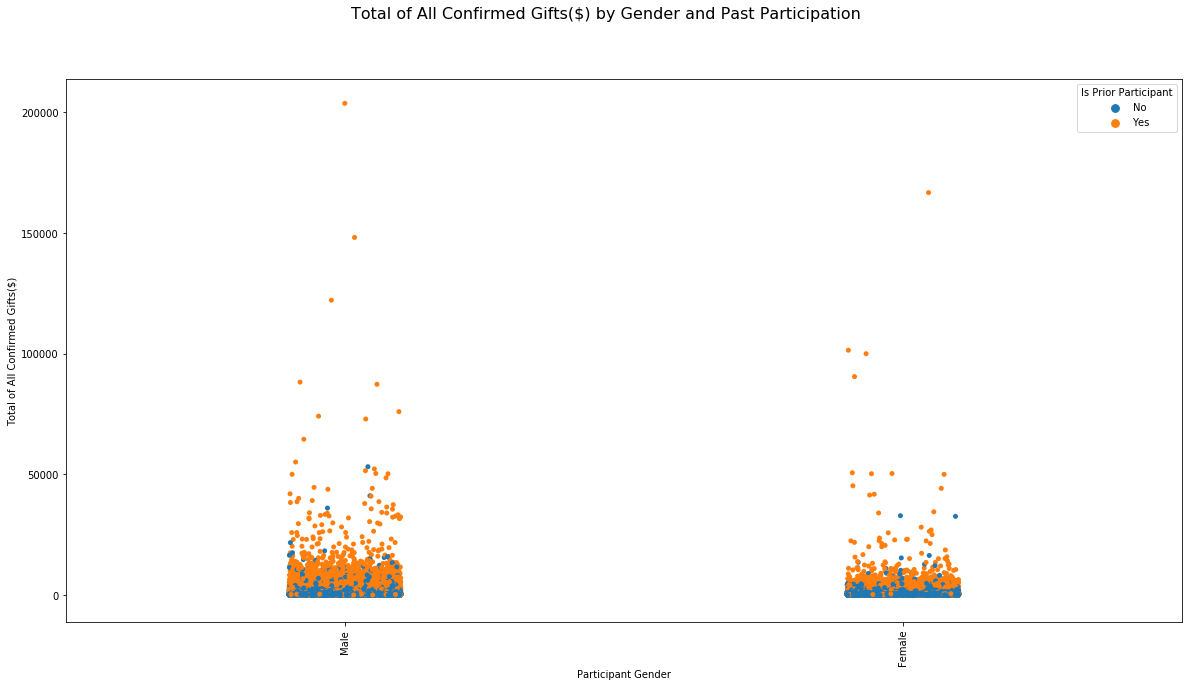

In [49]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Participant Gender', y="Total of All Confirmed Gifts($)", hue="Is Prior Participant",data=participants, order = participants['Participant Gender'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total of All Confirmed Gifts($) by Gender and Past Participation', fontsize=16)



Text(0,0.5,'Total of All Confirmed Gifts ($)')

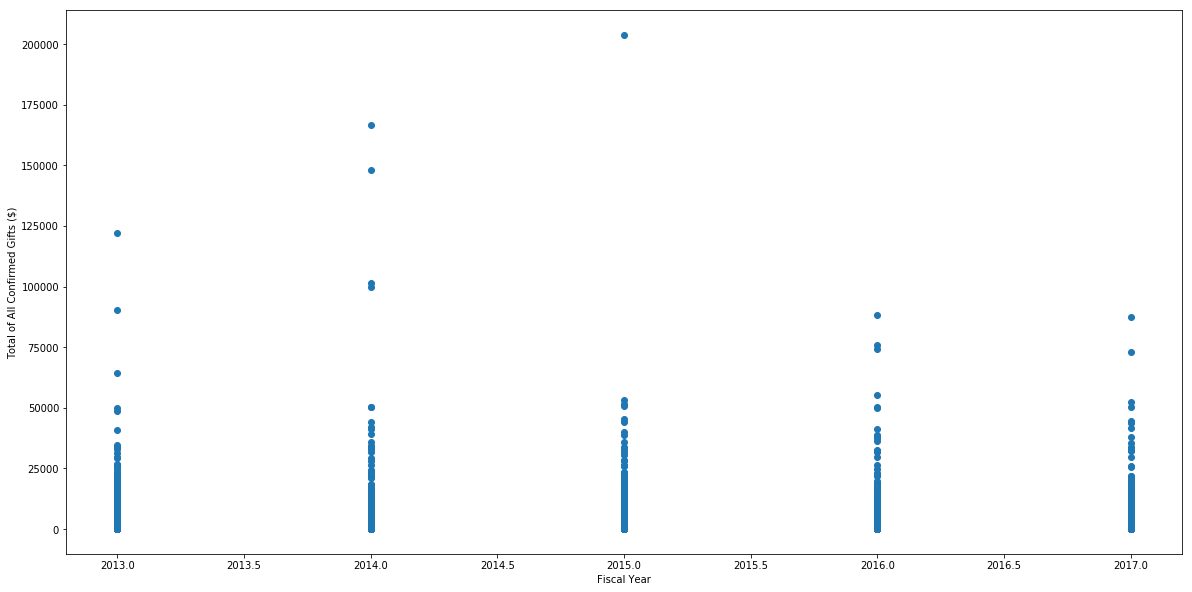

In [50]:
plt.figure(figsize=(20,10))
plt.scatter(participants['Fiscal Year'],participants['Total of All Confirmed Gifts($)'])

plt.xlabel('Fiscal Year')

plt.ylabel('Total of All Confirmed Gifts ($)')

# Describing Data

In [51]:
#setting up dummy variables for regression

dummy = pd.get_dummies(participants['Participant Gender'])
participantsd = pd.concat([participants, dummy],axis=1)
participantsd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Event Month,Event Day,Event Year,Participation Type Name,Team Name,Team Creation Date,...,Event ID,Participant Gender,Participant Goal($),Participant Goal_M,Suggested Participant Goal($),Source Code Type,Source Code Text,Sub Source Code Text,Female,Male
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25,6,25,2016,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,...,27037,Female,1095.0,1095.0,1095.0,NaN,NaN,NaN,1,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23,9,23,2017,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,...,28894,Female,1500.0,1500.0,1100.0,NaN,NaN,NaN,1,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,...,25572,Male,1075.0,1075.0,1075.0,6,www.google.com,NaN,0,1
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24,6,24,2017,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,...,28914,Male,500.0,500.0,1075.0,NaN,NaN,NaN,0,1
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29,6,29,2013,Two-Day Participant,RawHinies,2012-12-04 17:10:00,...,20901,Female,2000.0,2000.0,1075.0,NaN,NaN,NaN,1,0


In [52]:
dummy = pd.get_dummies(participants['Team Division'],prefix_sep='_')
participantsd = pd.concat([participantsd, dummy],axis=1)
participantsd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Event Month,Event Day,Event Year,Participation Type Name,Team Name,Team Creation Date,...,Source Code Type,Source Code Text,Sub Source Code Text,Female,Male,Corporate,Family and Friends,Organization (Clubs; Civic Groups; Place of Worship; etc.),Other,School
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25,6,25,2016,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,...,NaN,NaN,NaN,1,0,1,0,0,0,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23,9,23,2017,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,...,NaN,NaN,NaN,1,0,1,0,0,0,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,...,6,www.google.com,NaN,0,1,1,0,0,0,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24,6,24,2017,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,...,NaN,NaN,NaN,0,1,1,0,0,0,0
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29,6,29,2013,Two-Day Participant,RawHinies,2012-12-04 17:10:00,...,NaN,NaN,NaN,1,0,0,1,0,0,0


In [53]:
dummy = pd.get_dummies(participants['Participant Occupation'])
participantsd = pd.concat([participantsd, dummy],axis=1)
participantsd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Event Month,Event Day,Event Year,Participation Type Name,Team Name,Team Creation Date,...,Retired,Sales,Science and Biotechnology,Skilled Work and Trades,Social Work,Stock Broker/Investment Advisor,Student,Technical Account Manager,Telecommunications,Transportation and Warehousing
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25,6,25,2016,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,...,0,0,0,0,0,0,0,0,0,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23,9,23,2017,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,...,0,0,0,0,0,0,0,0,0,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,...,0,0,0,0,0,0,0,0,0,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24,6,24,2017,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,...,0,0,0,0,0,0,0,0,0,0
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29,6,29,2013,Two-Day Participant,RawHinies,2012-12-04 17:10:00,...,0,0,0,0,0,0,0,0,0,0


In [54]:
dummy = pd.get_dummies(participants['Participant Connection to MS'])
participantsd = pd.concat([participantsd, dummy],axis=1)
participantsd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Event Month,Event Day,Event Year,Participation Type Name,Team Name,Team Creation Date,...,Friend or Co-worker with MS,I have MS,None,Other,Parent has MS,Possible MS,Relative has MS,Relative: other,Sibling has MS,Spouse has MS
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25,6,25,2016,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,...,0,0,0,0,0,0,0,0,0,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23,9,23,2017,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,...,0,0,0,0,0,0,0,0,0,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,...,0,0,0,0,0,0,0,0,0,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24,6,24,2017,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,...,0,0,0,0,0,0,0,0,0,0
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29,6,29,2013,Two-Day Participant,RawHinies,2012-12-04 17:10:00,...,0,0,0,0,0,0,0,0,0,0


In [55]:
dummy = pd.get_dummies(participants['Address  -  Participant State/Province'])
participantsd = pd.concat([participantsd, dummy],axis=1)
participantsd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Event Month,Event Day,Event Year,Participation Type Name,Team Name,Team Creation Date,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25,6,25,2016,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,...,0,0,0,0,0,0,0,0,0,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23,9,23,2017,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,...,0,0,0,0,0,0,0,0,0,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,...,0,0,0,0,0,0,0,0,0,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24,6,24,2017,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,...,0,0,0,0,0,0,0,0,0,0
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29,6,29,2013,Two-Day Participant,RawHinies,2012-12-04 17:10:00,...,0,0,0,0,0,0,0,0,0,0


In [56]:
dummy = pd.get_dummies(participants['Is Prior Participant'])
participantsd = pd.concat([participantsd, dummy],axis=1)
participantsd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Event Month,Event Day,Event Year,Participation Type Name,Team Name,Team Creation Date,...,UT,VA,VI,VT,WA,WI,WV,WY,No,Yes
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25,6,25,2016,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,...,0,0,0,0,0,0,0,0,1,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23,9,23,2017,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,...,0,0,0,0,0,0,0,0,1,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,...,0,0,0,0,0,0,0,0,1,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24,6,24,2017,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,...,0,0,0,0,0,0,0,0,0,1
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29,6,29,2013,Two-Day Participant,RawHinies,2012-12-04 17:10:00,...,0,0,0,0,0,0,0,0,0,1


In [57]:
participantsd=participantsd.fillna(0)
participantsd

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Event Month,Event Day,Event Year,Participation Type Name,Team Name,Team Creation Date,...,UT,VA,VI,VT,WA,WI,WV,WY,No,Yes
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25,6,25,2016,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,...,0,0,0,0,0,0,0,0,1,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23,9,23,2017,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,...,0,0,0,0,0,0,0,0,1,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,...,0,0,0,0,0,0,0,0,1,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24,6,24,2017,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,...,0,0,0,0,0,0,0,0,0,1
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29,6,29,2013,Two-Day Participant,RawHinies,2012-12-04 17:10:00,...,0,0,0,0,0,0,0,0,0,1
5,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Some Nerve,2014-11-26 11:37:00,...,0,0,0,0,0,0,0,0,0,1
6,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25,6,25,2016,Two Day Cyclist,Conquest Muscle Activation,2016-01-31 18:50:00,...,0,0,0,0,0,0,0,0,0,1
7,COC Bike Events,2014,Colorado - Bike MS 2014,2014-06-28,6,28,2014,Two-Day Participant,Some Nerve,2014-01-07 11:13:00,...,0,0,0,0,0,0,0,0,1,0
8,CAN Bike Events,2016,CAN 2016 Bike MS: Waves to Wine Ride,2016-09-24,9,24,2016,$80 Cyclist Registration & Return Coach to San...,Mitzvah Milers,2015-09-27 22:54:00,...,0,0,0,0,0,0,0,0,1,0
9,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23,9,23,2017,Cyclist,Mitzvah Milers,2016-11-01 09:06:00,...,0,0,0,0,0,0,0,0,0,1


In [58]:
participantsd.describe()

,Fiscal Year,Event Month,Event Day,Event Year,Team ID,Contact ID,Emails Sent,Total Amount Drop,Total of All Confirmed Gifts($),Total From Participant($),...,UT,VA,VI,VT,WA,WI,WV,WY,No,Yes
count,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,6.549900e+04,65499.000000,65499.000000,65499.000000,65499.000000,...,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000
mean,2014.810165,7.724148,18.691614,2014.548298,329205.501290,1.043183e+07,32.358143,0.041314,856.559061,127.000670,...,0.002351,0.020626,0.000015,0.000336,0.004519,0.001069,0.000198,0.009099,0.521794,0.478206
std,1.377881,2.037624,7.422654,1.418966,163159.778817,4.186126e+06,269.046299,0.199016,2490.747586,492.649481,...,0.048432,0.142131,0.003907,0.018324,0.067073,0.032674,0.014087,0.094956,0.499529,0.499529
min,2013.000000,1.000000,1.000000,2012.000000,0.000000,1.566055e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,6.000000,12.000000,2013.000000,312991.000000,7.681859e+06,0.000000,0.000000,200.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,9.000000,20.000000,2014.000000,370504.000000,1.163842e+07,0.000000,0.000000,400.000000,35.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2016.000000,10.000000,25.000000,2016.000000,443941.000000,1.366256e+07,6.000000,0.000000,800.000000,150.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2017.000000,12.000000,31.000000,2017.000000,534794.000000,1.636498e+07,27354.000000,1.000000,203791.000000,50093.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
#export data to excel

writer = pd.ExcelWriter('participants_Summary.xlsx')
participantsd.describe().to_excel(writer,'Sheet1')
#df2.to_excel(writer,'Sheet2')
writer.save()

In [60]:
# counting 1 values

print((participants[['Security Category Name','Fiscal Year','Internal Event Name','Event Date','Participation Type Name','Team Name','Team Creation Date','Team Division','Team ID','Contact ID','Member ID','Participant Accept Email','Registration Date','Registration Active Status','Is Team Captain','Is Secondary Registration','Is Prior Participant','Emails Sent','Total of All Confirmed Gifts($)','Total From Participant($)','Total Not From Participant($)','Number From Participant','Number Not From Participant','Participant Email Status','Participant Employer','Participant Occupation','Participant Connection to MS','Address  -  Participant State/Province','Address  -  Participant County','Address  -  Participant City','Address -  Participant ZIP/Postal Code','Registration Type','Event ID','Participant Gender','Participant Goal($)','Suggested Participant Goal($)','Source Code Type','Source Code Text','Sub Source Code Text']] == 1).sum())


Security Category Name                        0
Fiscal Year                                   0
Internal Event Name                           0
Event Date                                    0
Participation Type Name                       0
Team Name                                     0
Team Creation Date                            0
Team Division                                 0
Team ID                                       0
Contact ID                                    0
Member ID                                     0
Participant Accept Email                  43948
Registration Date                             0
Registration Active Status                    0
Is Team Captain                            6195
Is Secondary Registration                   448
Is Prior Participant                          0
Emails Sent                                3138
Total of All Confirmed Gifts($)               2
Total From Participant($)                     6
Total Not From Participant($)           

In [61]:
participantsd.corr()


,Fiscal Year,Event Month,Event Day,Event Year,Team ID,Contact ID,Participant Accept Email,Is Team Captain,Is Secondary Registration,Emails Sent,...,UT,VA,VI,VT,WA,WI,WV,WY,No,Yes
Fiscal Year,1.000000,-0.011077,0.036109,0.951000,0.352670,0.231679,0.108476,0.003712,-0.087110,0.011219,...,0.000511,-0.081666,-0.005133,-0.013197,-0.006411,-0.006685,-0.001992,-0.000684,-0.013553,0.013553
Event Month,-0.011077,1.000000,-0.061670,-0.218504,-0.027242,0.050864,-0.009072,0.011212,-0.002584,-0.000881,...,0.007500,-0.091589,-0.007142,-0.006923,0.014372,-0.016899,-0.011390,0.002794,0.045671,-0.045671
Event Day,0.036109,-0.061670,1.000000,0.111800,0.093597,-0.005965,-0.009009,-0.019818,-0.063884,0.015587,...,0.004268,-0.138631,0.000689,-0.007433,0.007215,0.003436,-0.013286,-0.031435,-0.048388,0.048388
Event Year,0.951000,-0.218504,0.111800,1.000000,0.348990,0.225366,0.105072,-0.000210,-0.075278,0.006943,...,-0.000319,-0.056985,-0.004264,-0.011193,-0.010475,-0.005724,-0.000861,0.015775,-0.013273,0.013273
Team ID,0.352670,-0.027242,0.093597,0.348990,1.000000,0.109536,0.025937,0.149048,-0.037468,0.016859,...,-0.004547,-0.027450,-0.000432,0.001528,-0.003949,0.006541,-0.001963,-0.003325,-0.073252,0.073252
Contact ID,0.231679,0.050864,-0.005965,0.225366,0.109536,1.000000,0.025770,-0.124636,0.008964,-0.061308,...,0.002440,-0.024725,0.001261,0.003168,-0.003264,-0.001041,-0.000340,-0.008354,0.323271,-0.323271
Participant Accept Email,0.108476,-0.009072,-0.009009,0.105072,0.025937,0.025770,1.000000,0.051780,-0.032957,0.024885,...,-0.010285,-0.020229,-0.005580,0.000423,-0.010468,-0.012896,-0.006280,0.010643,-0.066793,0.066793
Is Team Captain,0.003712,0.011212,-0.019818,-0.000210,0.149048,-0.124636,0.051780,1.000000,-0.024290,0.062004,...,-0.001686,0.004119,-0.001263,-0.005924,0.000003,-0.004185,-0.004554,0.020675,-0.108884,0.108884
Is Secondary Registration,-0.087110,-0.002584,-0.063884,-0.075278,-0.037468,0.008964,-0.032957,-0.024290,1.000000,-0.008902,...,-0.000204,0.003596,-0.000324,-0.001521,-0.005591,-0.002714,-0.001169,-0.007952,0.021967,-0.021967
Emails Sent,0.011219,-0.000881,0.015587,0.006943,0.016859,-0.061308,0.024885,0.062004,-0.008902,1.000000,...,-0.004410,0.000490,-0.000470,-0.001972,-0.004344,0.001264,-0.001485,-0.006080,-0.070429,0.070429


In [86]:
#export data to excel

writer = pd.ExcelWriter('participants_Corr.xlsx')
participantsd.corr().to_excel(writer,'Sheet1')
#df2.to_excel(writer,'Sheet2')
writer.save()

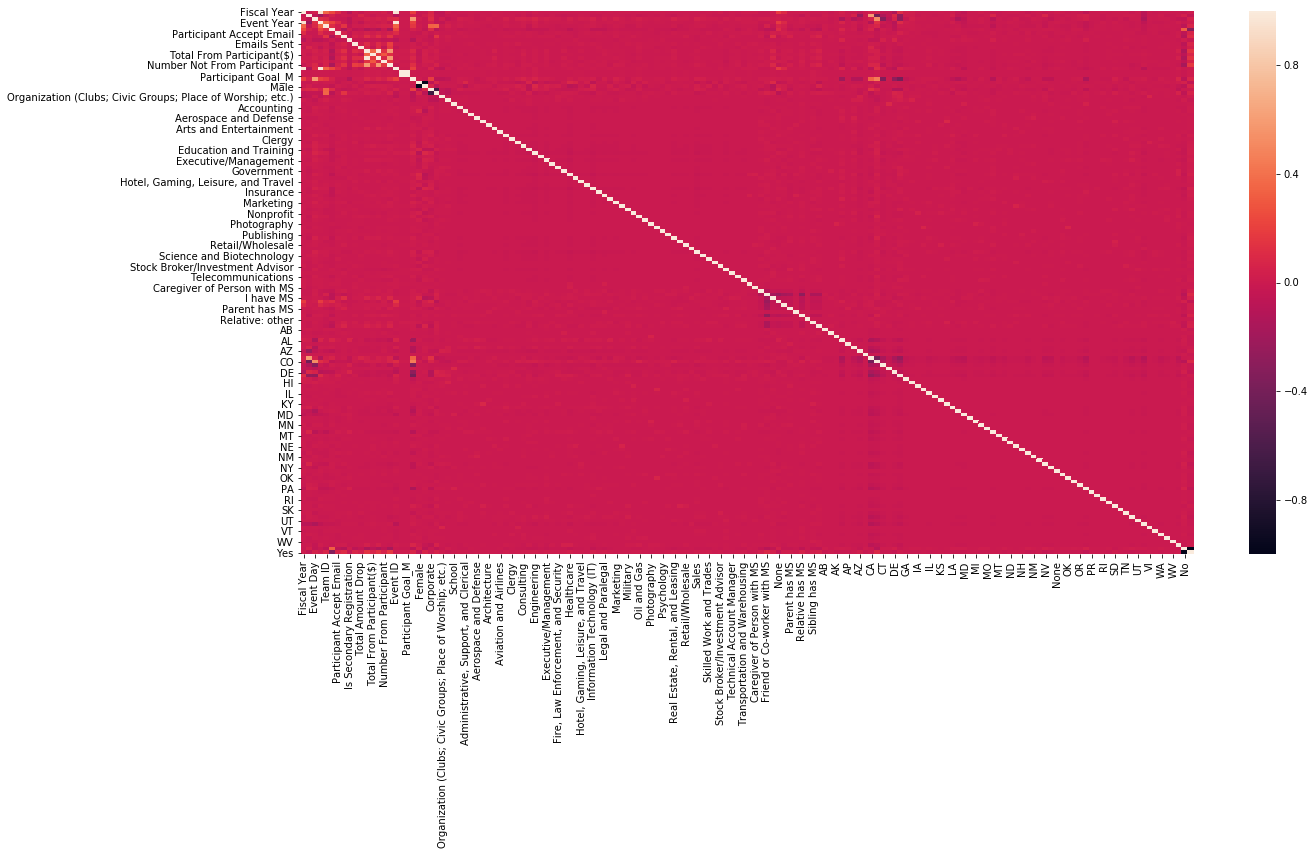

In [62]:
plt.figure(figsize=(20,10))

sns.heatmap(participantsd.corr())
plt.show()

# Modeling

In [101]:
#Getting ready to fit the model

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

from statsmodels.compat import lzip
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms



In [115]:
#set up data for regression

y = participantsd['Total of All Confirmed Gifts($)']

#Left out 'Male' for gender,  'Student' for occupation, 'Other' for connection to MS, 'Other' for occupation, 'School' for team division, and'ND' for state to account for dummy trap
X = participantsd[["Total From Participant($)","Total Not From Participant($)",'Event Month','Event Year','Healthcare','Engineering','Information Technology (IT)','Sales','Executive/Management','Education and Training','Consulting','Banking and Financial Services','Accounting','Legal and Paralegal','Marketing','Construction and Landscaping','Real Estate, Rental, and Leasing','Administrative, Support, and Clerical','Science and Biotechnology','Government','Insurance','Manufacturing','Retail/Wholesale','Skilled Work and Trades','Nonprofit','Fire, Law Enforcement, and Security','Human Resources','Transportation and Warehousing','Restaurant and Food Services','Arts and Entertainment','Homemaking','Hotel, Gaming, Leisure, and Travel','Media','Architecture','Environment','Facilities, Maintenance, and Repair','Telecommunications','Oil and Gas','Military','Advertising','Personal Care and Service','Aviation and Airlines','Aerospace and Defense','Stock Broker/Investment Advisor','Property Management','Social Work','Clergy','Psychology','Agriculture, Forestry, and Fishing','Photography','Publishing','Technical Account Manager','Retired','Relative has MS','None','I have MS','Parent has MS','Spouse has MS','Child has MS','Sibling has MS','TX', 'PA', 'NJ', 'CA', 'MN', 'NY', 'FL', 'MA', 'IL', 'MI', 'OH', 'NC', 'WA', 'CO', 'MO', 'UT', 'MD', 'VA', 'CT', 'AZ', 'GA', 'WI', 'KY', 'KS', 'TN', 'AL', 'AR', 'DE', 'NH', 'DC', 'IN', 'OK', 'IA', 'AK', 'RI', 'RI', 'NM', 'NE', 'NV', 'OR', 'MS', 'SD', 'WV', 'LA', 'ME', 'SC','MT','Family and Friends','Corporate','Organization (Clubs; Civic Groups; Place of Worship; etc.)','Female']]
X = sm.add_constant(X)
#check data

X.head()


,const,Total From Participant($),Total Not From Participant($),Event Month,Event Year,Healthcare,Engineering,Information Technology (IT),Sales,Executive/Management,...,SD,WV,LA,ME,SC,MT,Family and Friends,Corporate,Organization (Clubs; Civic Groups; Place of Worship; etc.),Female
0,1.0,250.0,413.00,6,2016,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1.0,135.0,1805.00,9,2017,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1.0,0.0,400.00,6,2015,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,100.0,531.16,6,2017,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,25.0,1070.00,6,2013,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [116]:
#run ols regression

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Total of All Confirmed Gifts($)   R-squared:                       0.989
Model:                                         OLS   Adj. R-squared:                  0.989
Method:                              Least Squares   F-statistic:                 5.468e+04
Date:                             Thu, 12 Jul 2018   Prob (F-statistic):               0.00
Time:                                     12:19:33   Log-Likelihood:            -4.5643e+05
No. Observations:                            65499   AIC:                         9.131e+05
Df Residuals:                                65387   BIC:                         9.141e+05
Df Model:                                      111                                         
Covariance Type:                         nonrobust                                         
                                                                 coef    std err

### OLS Regression results indicated the following variables were significant at the 95% level.


| Variable| coef |   std err  |         t   |    P>*t*  |     [0.025  |     0.975]| 
| ------------- |-------------| -----| -----| -----| -----| 
| const 	| -4025.4497	| 1535.737	| -2.621	| 0.009	| -7035.494	| -1015.405
| Total From Participant	| 0.9961	| 0.002	| 478.556	| 0	| 0.992	| 1
| Total Not From Participant	| 0.9751	| 0	| 2265.973	| 0	| 0.974	| 0.976
| Event Month	| -3.7142	| 0.738	| -5.033	| 0	| -5.161	| -2.268
| Event Year	| 2.0215	| 0.762	| 2.654	| 0.008	| 0.528	| 3.515
| Healthcare	| 11.5963	| 5.552	| 2.089	| 0.037	| 0.714	| 22.478
| Banking and Financial Services	| -30.8918	| 9.074	| -3.405	| 0.001	| -48.676	| -13.108
| Government	| 31.5379	| 13.726	| 2.298	| 0.022	| 4.634	| 58.442
| Arts and Entertainment	| 51.3239	| 17.681	| 2.903	| 0.004	| 16.668	| 85.979
| Oil and Gas	| -47.4863	| 21.276	| -2.232	| 0.026	| -89.188	| -5.785
| Parent has MS	| 11.351	| 5.695	| 1.993	| 0.046	| 0.19	| 22.512
| CA	| -21.9315	| 8.446	| -2.597	| 0.009	| -38.486	| -5.377
| FL	| -18.9499	| 8.883	| -2.133	| 0.033	| -36.361	| -1.539
| IL	| -71.8908	| 19.781	| -3.634	| 0	| -110.662	| -33.119
| CO	| -21.6286	| 8.614	| -2.511	| 0.012	| -38.512	| -4.745
| CT	| -25.7106	| 9.655	| -2.663	| 0.008	| -44.635	| -6.786
| AZ	| -22.3182	| 10.185	| -2.191	| 0.028	| -42.28	| -2.356
| AL	| -24.8752	| 9.761	| -2.548	| 0.011	| -44.006	| -5.744


### Initial OLS regression results revealed that the following variables had p values greater than 0.05 and confidence intervals about zero, which indicated they were not significant at the 95% level.
  *  Engineering
  *  Information Technology (IT)
  *  Sales
  *  Executive/Management
  *  Education and Training
  *  Consulting
  *  Accounting
  *  Legal and Paralegal
  *  Marketing
  *  Construction and Landscaping
  *  Real Estate, Rental, and Leasing
  *  Administrative, Support, and Clerical
  *  Science and Biotechnology
  *  Insurance
  *  Manufacturing
  *  Retail/Wholesale
  *  Skilled Work and Trades
  *  Nonprofit
  *  Fire, Law Enforcement, and Security
  *  Human Resources
  *  Transportation and Warehousing
  *  Restaurant and Food Services
  *  Homemaking
  *  Hotel, Gaming, Leisure, and Travel
  *  Media
  *  Architecture
  *  Environment
  *  Facilities, Maintenance, and Repair
  *  Telecommunications
  *  Military
  *  Advertising
  *  Personal Care and Service
  *  Aviation and Airlines
  *  Aerospace and Defense
  *  Stock Broker/Investment Advisor
  *  Property Management
  *  Social Work
  *  Clergy
  *  Psychology
  *  Agriculture, Forestry, and Fishing
  *  Photography
  *  Publishing
  *  Retail Wholesale
  *  Technical Account Manager
  *  Retired
  *  Relative has MS
  *  None
  *  None
  *  I have MS
  *  Spouse has MS
  *  Child has MS
  *  Sibling has MS
  *  TX
  *  PA
  *  NJ
  *  MN
  *  NY
  *  MA
  *  MI
  *  OH
  *  NC
  *  WA
  *  MO
  *  UT
  *  MD
  *  VA
  *  GA
  *  WI
  *  KY
  *  KS
  *  TN
  *  AR
  *  DE
  *  NH
  *  DC
  *  IN
  *  OK
  *  IA
  *  AK
  *  RI
  *  RI
  *  NM
  *  NE
  *  NV
  *  OR
  *  MS
  *  SD
  *  WV
  *  LA
  *  ME
  *  SC
  *  MT
  *  Family and Friends
  *  Corporate
  *  Other
  *  Other
  *  Other
  *  Organization (Clubs; Civic Groups; Place of Worship; etc.)
  *  Female

In [117]:
#compute the condition number to assess multicollinearity. according to Greene, >20 conditional number is bad (https://www.amazon.com/Econometric-Analysis-8th-William-Greene/dp/0134461363/ref=dp_ob_title_bk)
np.linalg.cond(X.values)

1.8544166652262996e+22

In [118]:
# Fitting regression model

linreg = LinearRegression()

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
#checking the r^2 score 

linreg.score(X, y)

0.98934167964324438

In [120]:
# getting intercept coefficient

print('Estimated intercept coefficient:',linreg.intercept_)


Estimated intercept coefficient: -4014.79517006


In [121]:
# getting number of coefficients
print('Number of coefficients:',len(linreg.coef_))

Number of coefficients: 113


In [122]:
# predicting gift amount
linreg.predict(X)



array([  660.42974103,  1905.48414498,   407.99979488, ...,   649.15980065,
          -5.91523919,    -5.91523919])

Text(0,0.5,'Predicted Total of All Confirmed Gifts ($)')

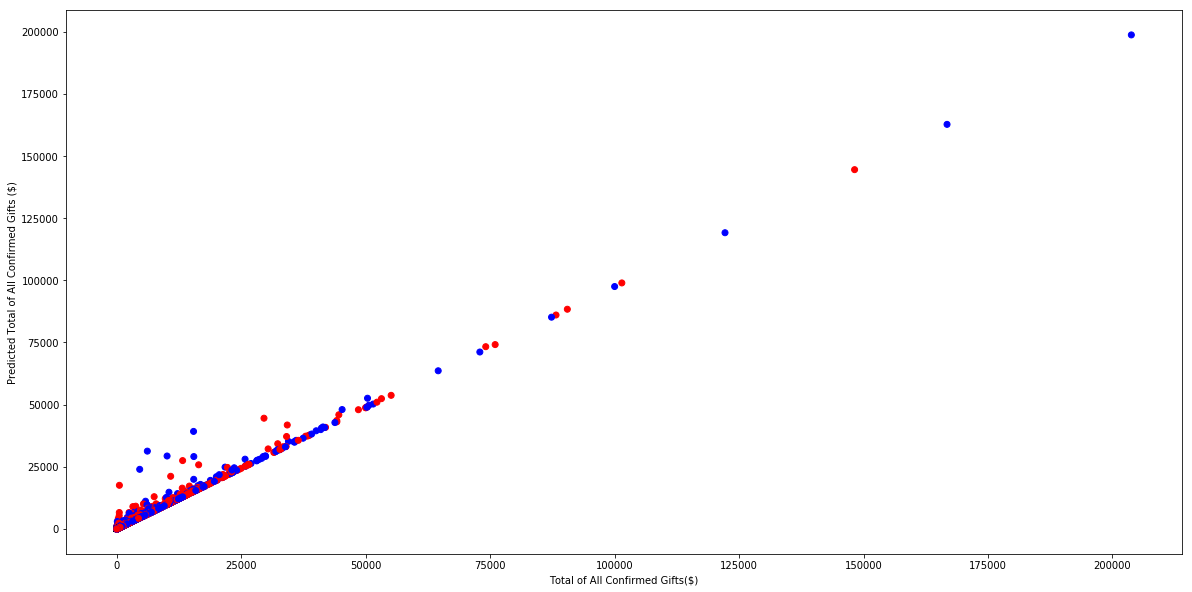

In [123]:
#scatter plot to compare actual and predicted gift

plt.figure(figsize=(20,10))

plt.scatter(y,linreg.predict(X),color=['red','blue'])

plt.xlabel('Total of All Confirmed Gifts($)')

plt.ylabel('Predicted Total of All Confirmed Gifts ($)')

Text(0,0.5,'residuals')

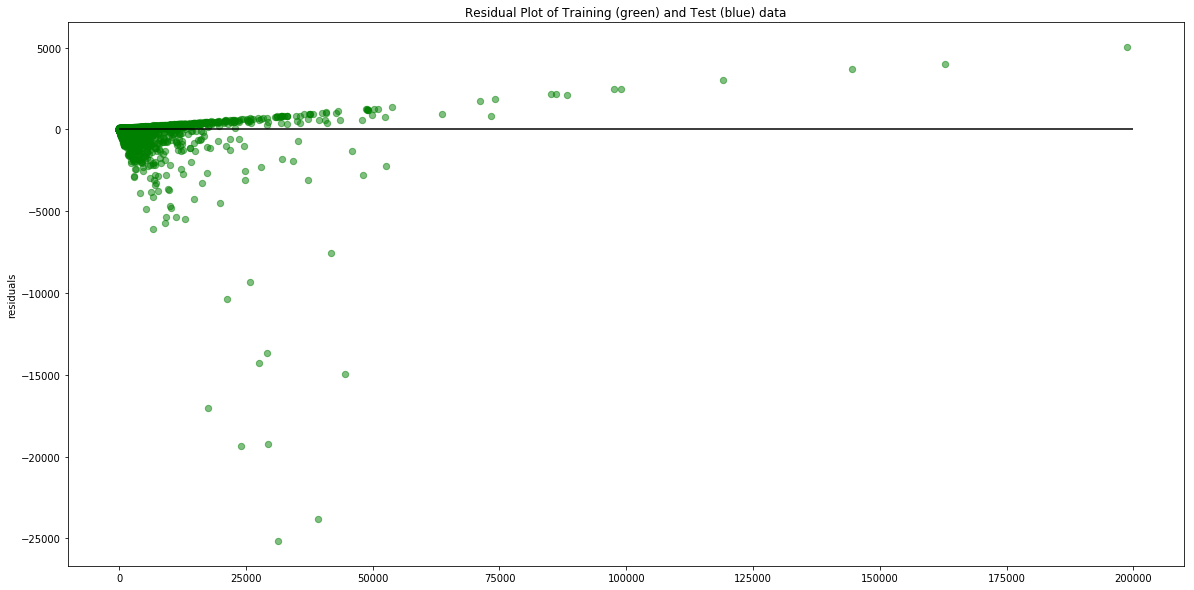

In [124]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X),y - linreg.predict(X), color=['green'],s=40,alpha=0.5)
#plt.scatter(linreg.predict(X_test),linreg.predict(X_test) - y_test, color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=200000)

plt.title('Residual Plot of Training (green) and Test (blue) data')

plt.ylabel('residuals')


Residuals show evidence of Heteroskedasticity. This is likely due to the large range between the largest and smallest gift amounts. It is likely the error variance changes proportionally with a factor. 

The 95% cofidence intervals indicated that the constant had a range of -7035.494 to -1015.405. This is by far the largest range in the results. 

In [222]:
#set up model training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [126]:
# Fitting training regression model

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [127]:


# Predict results and calculating accuracy to compare to original r^2

y_pred = linreg.predict(X)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: 0.99


In [128]:


linreg.score(X_test, y_test)

0.98769665205174917

Text(0,0.5,'residuals')

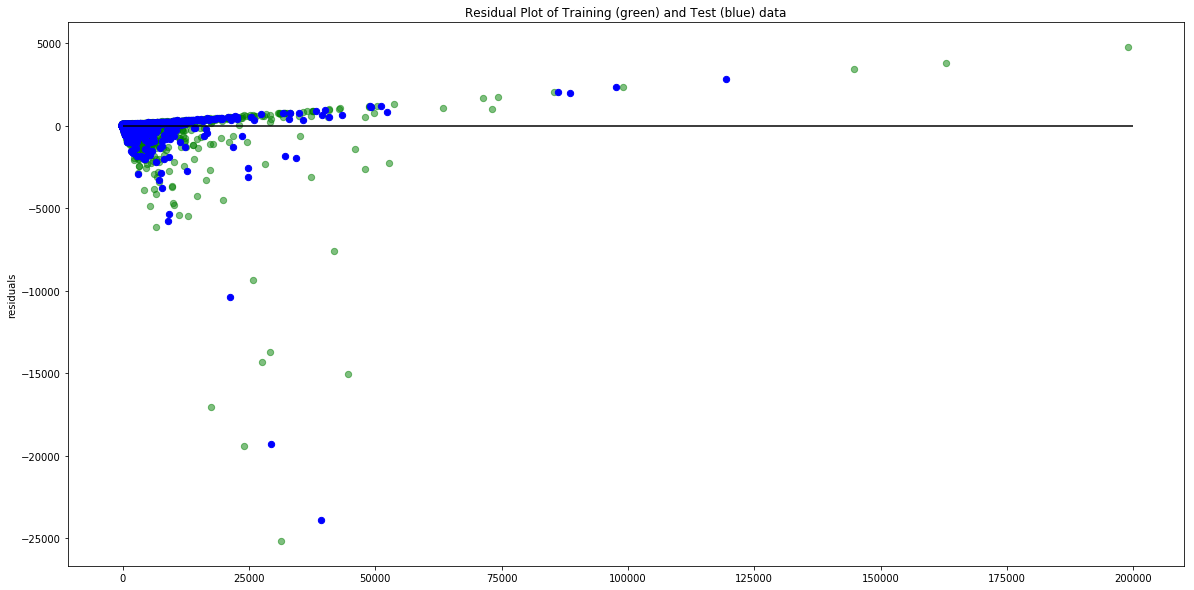

In [129]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X_train),y_train - linreg.predict(X_train), color=['green'],s=40,alpha=0.5)
plt.scatter(linreg.predict(X_test),y_test - linreg.predict(X_test), color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=200000)

plt.title('Residual Plot of Training (green) and Test (blue) data')

plt.ylabel('residuals')


## Adjustments to the Model

Residuals show evidence of Heteroskedasticity. This is likely due to the large range between the largest and smallest gift amounts. It is likely the error variance changes proportionally with a factor. 



In [130]:
#set up data for revised regression

y = (participantsd['Total of All Confirmed Gifts($)'])
print(y.describe())

count     65499.000000
mean        856.559061
std        2490.747586
min           0.000000
25%         200.000000
50%         400.000000
75%         800.000000
max      203791.000000
Name: Total of All Confirmed Gifts($), dtype: float64


### Outliers

The following teams are the largest per member revenue raisers. It appears the max gift of 203,791 may be causing the issue with Heteroskedasticity, but are there other gift value outliers?

An observation is an outlier if it falls more than 1.5(IQR) above the upper quartile or more than 1.5(IQR) below the lower quartile.

Using the 'Total of All Confirmed Gifts($)' summary statistics above:

IQR = Q3 − Q1 = 800 − 200 = 600

1.5(IQR) = 1.5(600) = 900

Q1 − 900 = 200 - 900 = −700. 
The minimum value is 0 so there are no outliers in the bottom of the distribution.

Q3 + 900 = 800 + 900 = 1700. 
The maximum value is 203,791 so there are outliers in the top of the distribution.

### Total of All Confirmed Gifts($) in excess of 1,700 will be eliminated from the forecast.

### Model #2

In [131]:
#set up data for revised regression

y = (participantsd['Total of All Confirmed Gifts($)'])
print(y.describe())

count     65499.000000
mean        856.559061
std        2490.747586
min           0.000000
25%         200.000000
50%         400.000000
75%         800.000000
max      203791.000000
Name: Total of All Confirmed Gifts($), dtype: float64


In [185]:
# dropping rows with outliers

participantsdd = participantsd[participantsd['Total of All Confirmed Gifts($)'] < 1700]
participantsdd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Event Month,Event Day,Event Year,Participation Type Name,Team Name,Team Creation Date,...,UT,VA,VI,VT,WA,WI,WV,WY,No,Yes
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25,6,25,2016,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,...,0,0,0,0,0,0,0,0,1,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,...,0,0,0,0,0,0,0,0,1,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24,6,24,2017,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,...,0,0,0,0,0,0,0,0,0,1
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29,6,29,2013,Two-Day Participant,RawHinies,2012-12-04 17:10:00,...,0,0,0,0,0,0,0,0,0,1
5,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Some Nerve,2014-11-26 11:37:00,...,0,0,0,0,0,0,0,0,0,1


In [133]:
y = (participantsdd['Total of All Confirmed Gifts($)'])
print(y.describe())

count    58687.000000
mean       439.743970
std        385.663288
min          0.000000
25%        140.000000
50%        395.000000
75%        595.000000
max       1695.000000
Name: Total of All Confirmed Gifts($), dtype: float64


In [134]:
#export data to excel

writer = pd.ExcelWriter('participantsdd_Y.xlsx')
y.to_excel(writer,'Sheet1')
#df2.to_excel(writer,'Sheet2')
writer.save()

Text(0,0.5,'Counts')

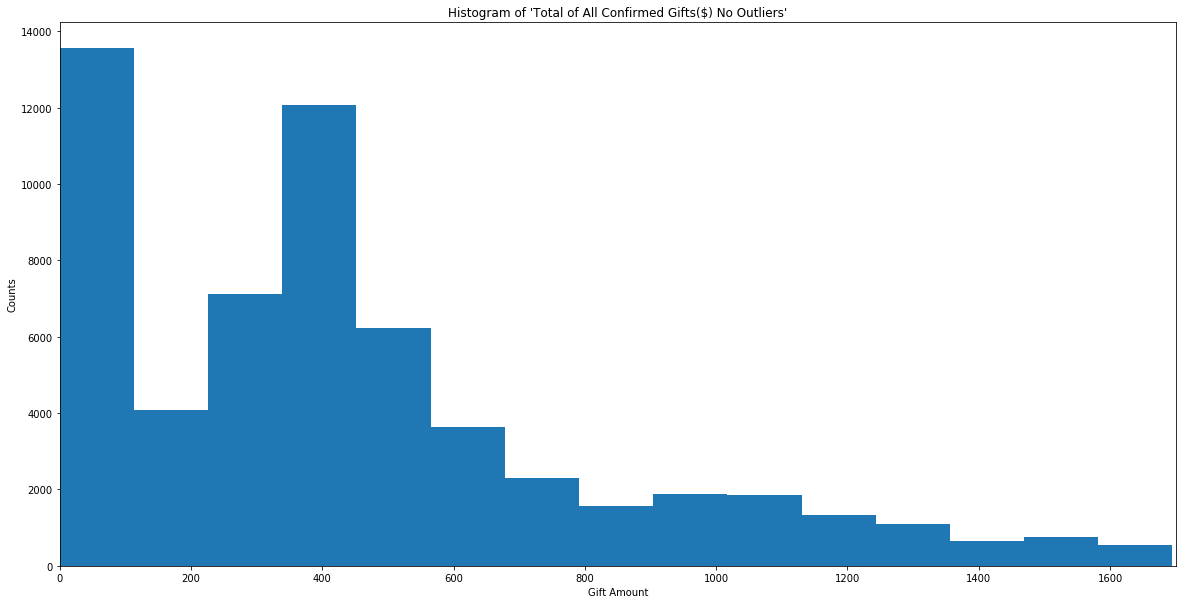

In [135]:
# Histogram of gift amounts

plt.figure(figsize=(20,10))
plot_data =y
plot_data.plot(kind='hist',bins=15).set_xlim((0.0, 1700))
plt.title("Histogram of 'Total of All Confirmed Gifts($) No Outliers'")
plt.xlabel("Gift Amount")
plt.ylabel("Counts")

In [136]:
#Left out 'Male' for gender, "Total From Participant($)" from gift amounts, 'Student' for occupation, 'Other' for connection to MS, 'School' for team division, and'ND' for state to account for dummy trap
X = participantsdd[["Total Not From Participant($)",'Event Month','Event Year','Healthcare','Engineering','Information Technology (IT)','Sales','Executive/Management','Education and Training','Consulting','Banking and Financial Services','Accounting','Legal and Paralegal','Marketing','Construction and Landscaping','Real Estate, Rental, and Leasing','Administrative, Support, and Clerical','Science and Biotechnology','Government','Insurance','Manufacturing','Retail/Wholesale','Skilled Work and Trades','Nonprofit','Fire, Law Enforcement, and Security','Human Resources','Transportation and Warehousing','Restaurant and Food Services','Arts and Entertainment','Homemaking','Hotel, Gaming, Leisure, and Travel','Media','Architecture','Environment','Facilities, Maintenance, and Repair','Telecommunications','Oil and Gas','Military','Advertising','Personal Care and Service','Aviation and Airlines','Aerospace and Defense','Stock Broker/Investment Advisor','Property Management','Social Work','Clergy','Psychology','Agriculture, Forestry, and Fishing','Photography','Publishing','Technical Account Manager','Retired','Relative has MS','None','I have MS','Parent has MS','Spouse has MS','Child has MS','Sibling has MS','TX', 'PA', 'NJ', 'CA', 'MN', 'NY', 'FL', 'MA', 'IL', 'MI', 'OH', 'NC', 'WA', 'CO', 'MO', 'UT', 'MD', 'VA', 'CT', 'AZ', 'GA', 'WI', 'KY', 'KS', 'TN', 'AL', 'AR', 'DE', 'NH', 'DC', 'IN', 'OK', 'IA', 'AK', 'RI', 'RI', 'NM', 'NE', 'NV', 'OR', 'MS', 'SD', 'WV', 'LA', 'ME', 'SC','MT','Family and Friends','Corporate', 'Other','Organization (Clubs; Civic Groups; Place of Worship; etc.)','Female']]
X = sm.add_constant(X)
#check data

X.head()




,const,Total Not From Participant($),Event Month,Event Year,Healthcare,Engineering,Information Technology (IT),Sales,Executive/Management,Education and Training,...,LA,ME,SC,MT,Family and Friends,Corporate,Other,Other,Organization (Clubs; Civic Groups; Place of Worship; etc.),Female
0,1.0,413.00,6,2016,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1.0,400.00,6,2015,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,531.16,6,2017,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,1070.00,6,2013,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,1.0,100.00,6,2015,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [137]:
#export data to excel

writer = pd.ExcelWriter('participantsdd_X.xlsx')
X.to_excel(writer,'Sheet1')
#df2.to_excel(writer,'Sheet2')
writer.save()

In [138]:
#run ols regression

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Total of All Confirmed Gifts($)   R-squared:                       0.805
Model:                                         OLS   Adj. R-squared:                  0.804
Method:                              Least Squares   F-statistic:                     2153.
Date:                             Thu, 12 Jul 2018   Prob (F-statistic):               0.00
Time:                                     12:21:26   Log-Likelihood:            -3.8484e+05
No. Observations:                            58687   AIC:                         7.699e+05
Df Residuals:                                58574   BIC:                         7.709e+05
Df Model:                                      112                                         
Covariance Type:                         nonrobust                                         
                                                                 coef    std err

### OLS Regression results indicated the following variables were significant at the 95% level.


| Variable| coef |   std err  |         t   |    P>*t*  |     [0.025  |     0.975]| 
| ------------- |-------------| -----| -----| -----| -----| 
| const	| -7215.7364	| 1082.995	| -6.663	| 0	| -9338.412	| -5093.061
| Total Not From Participant($)	| 0.8541	| 0.002	| 462.021	| 0	| 0.851	| 0.858
| Event Year	| 3.6347	| 0.537	| 6.766	| 0	| 2.582	| 4.688
| Healthcare	| 40.8226	| 3.881	| 10.52	| 0	| 33.217	| 48.429
| Engineering	| 21.9085	| 4.015	| 5.457	| 0	| 14.039	| 29.778
| Information Technology (IT)	| 13.3268	| 4.48	| 2.975	| 0.003	| 4.546	| 22.107
| Sales	| 10.737	| 4.984	| 2.154	| 0.031	| 0.967	| 20.507
| Executive/Management	| 34.8739	| 5.628	| 6.196	| 0	| 23.842	| 45.905
| Consulting	| 40.006	| 6.557	| 6.101	| 0	| 27.154	| 52.858
| Banking and Financial Services	| 30.9103	| 6.43	| 4.807	| 0	| 18.307	| 43.514
| Accounting	| 27.7193	| 6.392	| 4.336	| 0	| 15.19	| 40.248
| Legal and Paralegal	| 66.7648	| 7.059	| 9.457	| 0	| 52.928	| 80.601
| Real Estate, Rental, and Leasing	| 40.5426	| 8.626	| 4.7	| 0	| 23.636	| 57.449
| Human Resources	| 24.3277	| 10.972	| 2.217	| 0.027	| 2.822	| 45.834
| Transportation and Warehousing	| -24.2812	| 10.847	| -2.239	| 0.025	| -45.541	| -3.022
| Telecommunications	| 33.2138	| 15.257	| 2.177	| 0.029	| 3.31	| 63.117
| Property Management	| 47.4395	| 19.181	| 2.473	| 0.013	| 9.844	| 85.035
| Relative has MS	| 17.2346	| 2.466	| 6.988	| 0	| 12.401	| 22.068
| None	| 10.8454	| 2.792	| 3.884	| 0	| 5.373	| 16.318
| None	| 363.5991	| 64.762	| 5.614	| 0	| 236.666	| 490.532
| I have MS	| 9.6945	| 3.994	| 2.427	| 0.015	| 1.866	| 17.523
| Spouse has MS	| 23.5958	| 4.532	| 5.207	| 0	| 14.714	| 32.478
| Child has MS	| 29.249	| 5.877	| 4.977	| 0	| 17.731	| 40.767
| Sibling has MS	| 22.8104	| 4.452	| 5.123	| 0	| 14.084	| 31.537
| TX	| 20.1655	| 8.506	| 2.371	| 0.018	| 3.493	| 36.838
| FL	| -12.3625	| 6.086	| -2.031	| 0.042	| -24.291	| -0.434
| MA	| -38.1591	| 9.367	| -4.074	| 0	| -56.518	| -19.8
| OH	| 34.3053	| 16.465	| 2.084	| 0.037	| 2.034	| 66.577
| CO	| 23.7772	| 5.929	| 4.01	| 0	| 12.156	| 35.398
| VA	| 40.7888	| 7.575	| 5.385	| 0	| 25.942	| 55.636
| CT	| -45.9898	| 6.599	| -6.969	| 0	| -58.924	| -33.056
| KY	| -63.3516	| 25.934	| -2.443	| 0.015	| -114.182	| -12.521
| AL	| -50.5419	| 6.658	| -7.591	| 0	| -63.592	| -37.491
| AR	| -21.342	| 8.894	| -2.399	| 0.016	| -38.775	| -3.909
| DC	| 41.6666	| 12.902	| 3.23	| 0.001	| 16.379	| 66.954
| NE	| 109.5948	| 25.606	| 4.28	| 0	| 59.406	| 159.783
| NV	| -40.1617	| 9.175	| -4.377	| 0	| -58.145	| -22.178
| MS	| -50.2435	| 10.315	| -4.871	| 0	| -70.461	| -30.026
| SD	| 45.8205	| 14.66	| 3.125	| 0.002	| 17.086	| 74.555
| LA	| -26.8002	| 11.663	| -2.298	| 0.022	| -49.659	| -3.941
| Family and Friends	| 24.2015	| 1.965	| 12.315	| 0	| 20.35	| 28.053
| Corporate	| 20.2873	| 2.064	| 9.828	| 0	| 16.241	| 24.333
| Other	| 16.351	| 7.353	| 2.224	| 0.026	| 1.94	| 30.762
| Other	| 17.3802	| 3.548	| 4.899	| 0	| 10.427	| 24.334
| Organization (Clubs; Civic Groups; Place of Worship; etc.)	| 32.9377	| 11.406	| 2.888	| 0.004	| 10.581	| 55.294
| Female	| -20.7923	| 1.514	| -13.738	| 0	| -23.759	| -17.826

### Initial OLS regression results revealed that the following variables had p values greater than 0.05 and confidence intervals about zero, which indicated they were not significant at the 95% level.
  *  Event Month
  *  Education and Training
  *  Marketing
  *  Construction and Landscaping
  *  Administrative, Support, and Clerical
  *  Science and Biotechnology
  *  Government
  *  Insurance
  *  Manufacturing
  *  Retail/Wholesale
  *  Skilled Work and Trades
  *  Nonprofit
  *  Fire, Law Enforcement, and Security
  *  Restaurant and Food Services
  *  Arts and Entertainment
  *  Homemaking
  *  Hotel, Gaming, Leisure, and Travel
  *  Media
  *  Architecture
  *  Environment
  *  Facilities, Maintenance, and Repair
  *  Oil and Gas
  *  Military
  *  Advertising
  *  Personal Care and Service
  *  Aviation and Airlines
  *  Aerospace and Defense
  *  Stock Broker/Investment Advisor
  *  Social Work
  *  Clergy
  *  Psychology
  *  Agriculture, Forestry, and Fishing
  *  Photography
  *  Publishing
  *  Technical Account Manager
  *  Retired
  *  Parent has MS
  *  PA
  *  NJ
  *  CA
  *  MN
  *  NY
  *  IL
  *  MI
  *  NC
  *  WA
  *  MO
  *  UT
  *  MD
  *  AZ
  *  GA
  *  WI
  *  KS
  *  TN
  *  DE
  *  NH
  *  IN
  *  OK
  *  IA
  *  AK
  *  RI
  *  RI
  *  NM
  *  OR
  *  WV
  *  ME
  *  SC
  *  MT

In [139]:
#compute the condition number to assess multicollinearity. according to Greene, >20 conditional number is bad (https://www.amazon.com/Econometric-Analysis-8th-William-Greene/dp/0134461363/ref=dp_ob_title_bk)
np.linalg.cond(X.values)

3.1024610958510522e+20

In [140]:
# confirming Y values 
y.describe()

count    58687.000000
mean       439.743970
std        385.663288
min          0.000000
25%        140.000000
50%        395.000000
75%        595.000000
max       1695.000000
Name: Total of All Confirmed Gifts($), dtype: float64

In [141]:
# Fitting regression model

linreg = LinearRegression()

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [142]:
#checking the r^2 score 

linreg.score(X, y)

0.80459947245340191

In [143]:
# getting number of coefficients
print('Number of coefficients:',len(linreg.coef_))

Number of coefficients: 114


In [144]:
# predicting gift amount
linreg.predict(X)

array([ 490.81843096,  537.69467825,  656.99375516, ...,  467.87355118,
        104.34750367,  104.34750367])

In [145]:
# exporting predictions to csv 

prediction = linreg.predict(X)

prediction = pd.DataFrame(prediction, columns=['predictions']).to_csv('prediction.csv')

Text(0,0.5,'Predicted Total of All Confirmed Gifts ($)')

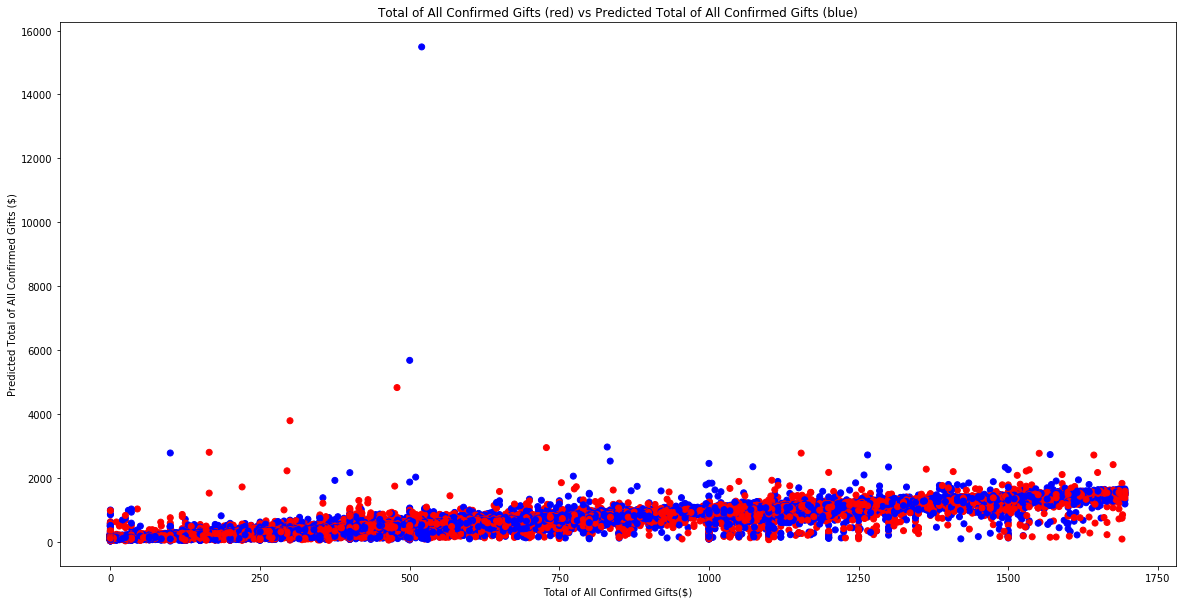

In [148]:
#scatter plot to compare actual and predicted gift

plt.figure(figsize=(20,10))

plt.scatter(y,linreg.predict(X),color=['red','blue']) 

plt.title('Total of All Confirmed Gifts (red) vs Predicted Total of All Confirmed Gifts (blue)')
plt.xlabel('Total of All Confirmed Gifts($)')

plt.ylabel('Predicted Total of All Confirmed Gifts ($)')

Text(0,0.5,'residuals')

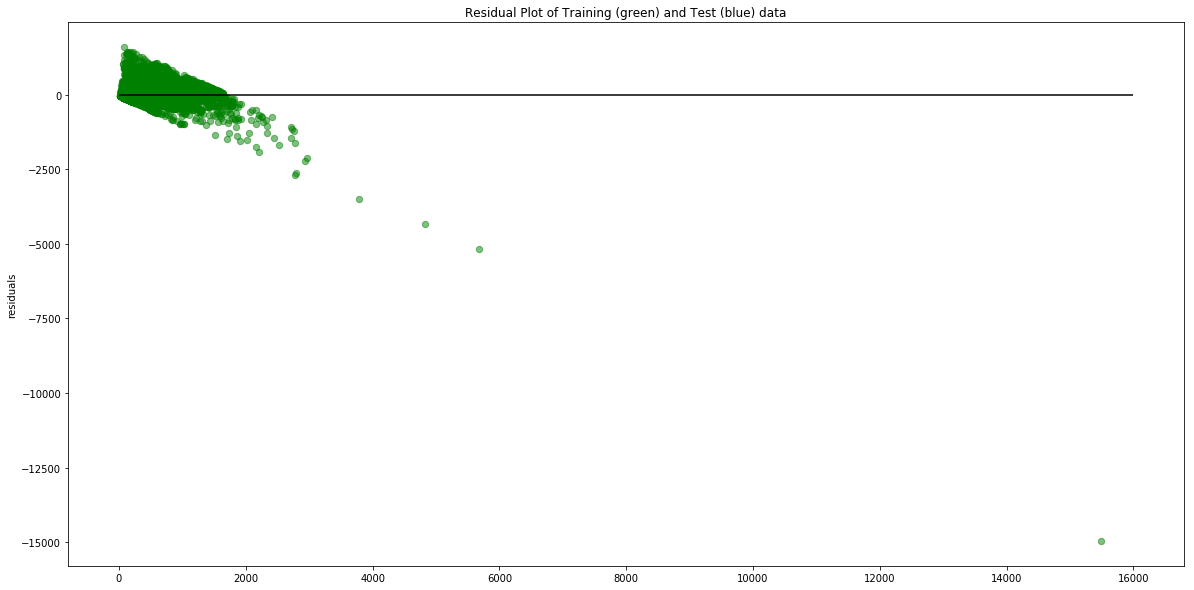

In [149]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X),y - linreg.predict(X), color=['green'],s=40,alpha=0.5)
#plt.scatter(linreg.predict(X_test),linreg.predict(X_test) - y_test, color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=16000)

plt.title('Residual Plot of Training (green) and Test (blue) data')

plt.ylabel('residuals')

Why is the model greatly over-predicting the gift at roughly $500?

In [54]:
#set up model training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [55]:
# Fitting training regression model

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# Predict results and calculating accuracy to compare to original r^2

y_pred = linreg.predict(X)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: 0.84


In [57]:
linreg.score(X_test, y_test)

0.83827461175420548

Text(0,0.5,'residuals')

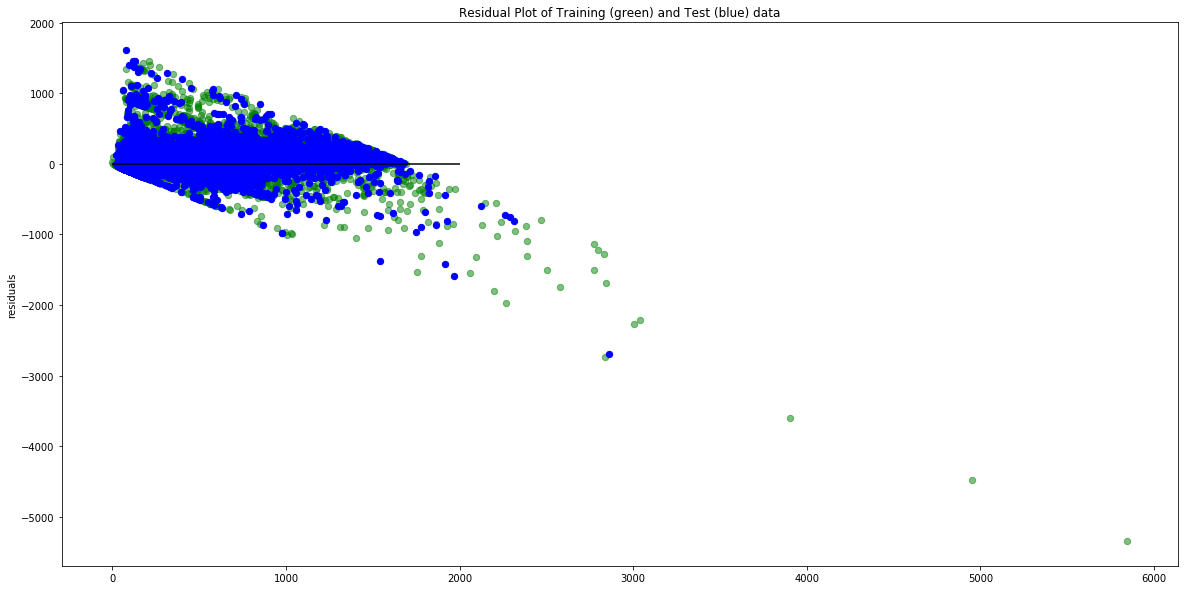

In [211]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X_train),y_train - linreg.predict(X_train), color=['green'],s=40,alpha=0.5)
plt.scatter(linreg.predict(X_test),y_test - linreg.predict(X_test), color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=2000)

plt.title('Residual Plot of Training (green) and Test (blue) data')

plt.ylabel('residuals')

#### discussion

The residuals shape shows multiple linear lines with negative slope. This multiple sub collections of of highly linear relationships indicate that several Total of All Gifts ($) are dependant entirely on one of the independent variables or constant values that exist appart from the independent variables. 

The histogram of Total of All Gifts ($) shows shows to peaks and a right skew to the dependent variable.  


After exporting the predicted values, y values and X values, investigation determined that observation # 28832 contained the predicted y of 15,488.55031. The following table lists all of the predicted values above 2,700.




|Obs|    Predicted Y | Total of All Confirmed Gifts($)|  
| ------------- |-------------| -----|
| 28832	| 15488.5503061517	| 520
| 61478	| 5673.83762599766	| 500
| 3984	| 4821.59795881496	| 478.8
| 28834	| 3783.14139813932	| 300
| 26543	| 2960.78145067982	| 830
| 4650	| 2941.3177936345	| 728.33
| 40800	| 2794.18135194581	| 165
| 51651	| 2773.10221379218	| 100
| 4756	| 2769.18688668409	| 1154
| 4060	| 2763.43209121036	| 1551.72
| 39566	| 2723.69097984639	| 1570
| 44011	| 2711.64823567627	| 1265
| 27920	| 2709.09430834768	| 1643



Model 2 rerun after dropping obs 28832

### Additionally, investigation of the predicted variables demonstrated that "Total From Participant" should be utilized in place of "Total Not From Participant" for a predicter. 

The reason is that "Total Not From Participant" had values that exceeded their y value counterparts.
For example, observation #28832 had a "Total Not From Participant" of 18020 but a "Total of All Confirmed Gifts" of 520. This held for all of the abnormally high estimated gift values. 

### Model 3: reruning model 2 with "Total From Participant" inplace of "Total Not From Participant"


In [280]:
participantsdd.describe()

,Fiscal Year,Event Month,Event Day,Event Year,Team ID,Contact ID,Emails Sent,Total of All Confirmed Gifts($),Total From Participant($),Total Not From Participant($),...,UT,VA,VI,VT,WA,WI,WV,WY,No,Yes
count,58687.000000,58687.000000,58687.000000,58687.000000,58687.000000,5.868700e+04,58687.000000,58687.000000,58687.000000,58687.000000,...,58687.000000,58687.000000,58687.000000,58687.000000,58687.000000,58687.000000,58687.000000,58687.00000,58687.000000,58687.000000
mean,2014.795781,7.714775,18.486598,2014.538722,326302.701467,1.067913e+07,18.291053,439.743970,90.563173,359.344495,...,0.002368,0.020158,0.000017,0.000375,0.004447,0.001142,0.000204,0.00944,0.556052,0.443948
std,1.375930,2.042567,7.474779,1.416066,165239.129213,4.071400e+06,199.195356,385.663288,148.150928,396.061373,...,0.048610,0.140541,0.004128,0.019358,0.066540,0.033769,0.014298,0.09670,0.496853,0.496853
min,2013.000000,1.000000,1.000000,2012.000000,0.000000,1.566055e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2014.000000,6.000000,12.000000,2013.000000,312699.000000,8.327469e+06,0.000000,140.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2015.000000,9.000000,20.000000,2014.000000,369842.000000,1.180836e+07,0.000000,395.000000,24.000000,285.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,2016.000000,10.000000,24.000000,2016.000000,442803.500000,1.374252e+07,4.000000,595.000000,125.000000,525.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,2017.000000,12.000000,31.000000,2017.000000,534794.000000,1.636498e+07,27199.000000,1695.000000,1690.000000,18020.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [281]:
y = (participantsdd['Total of All Confirmed Gifts($)'])
print(y.describe())

count    58687.000000
mean       439.743970
std        385.663288
min          0.000000
25%        140.000000
50%        395.000000
75%        595.000000
max       1695.000000
Name: Total of All Confirmed Gifts($), dtype: float64


In [282]:
#Left out 'Male' for gender, "Total Not From Participant($)", from gift amounts, 'Student' for occupation, 'Other' for connection to MS, 'School' for team division, and'ND' for state to account for dummy trap
X = participantsdd[["Total From Participant($)",'Event Month','Event Year','Healthcare','Engineering','Information Technology (IT)','Sales','Executive/Management','Education and Training','Consulting','Banking and Financial Services','Accounting','Legal and Paralegal','Marketing','Construction and Landscaping','Real Estate, Rental, and Leasing','Administrative, Support, and Clerical','Science and Biotechnology','Government','Insurance','Manufacturing','Retail/Wholesale','Skilled Work and Trades','Nonprofit','Fire, Law Enforcement, and Security','Human Resources','Transportation and Warehousing','Restaurant and Food Services','Arts and Entertainment','Homemaking','Hotel, Gaming, Leisure, and Travel','Media','Architecture','Environment','Facilities, Maintenance, and Repair','Telecommunications','Oil and Gas','Military','Advertising','Personal Care and Service','Aviation and Airlines','Aerospace and Defense','Stock Broker/Investment Advisor','Property Management','Social Work','Clergy','Psychology','Agriculture, Forestry, and Fishing','Photography','Publishing','Technical Account Manager','Retired','Relative has MS','None','I have MS','Parent has MS','Spouse has MS','Child has MS','Sibling has MS','TX', 'PA', 'NJ', 'CA', 'MN', 'NY', 'FL', 'MA', 'IL', 'MI', 'OH', 'NC', 'WA', 'CO', 'MO', 'UT', 'MD', 'VA', 'CT', 'AZ', 'GA', 'WI', 'KY', 'KS', 'TN', 'AL', 'AR', 'DE', 'NH', 'DC', 'IN', 'OK', 'IA', 'AK', 'RI', 'RI', 'NM', 'NE', 'NV', 'OR', 'MS', 'SD', 'WV', 'LA', 'ME', 'SC','MT','Family and Friends','Corporate', 'Other','Organization (Clubs; Civic Groups; Place of Worship; etc.)','Female']]
X = sm.add_constant(X)
#check data

X.head()

,const,Total From Participant($),Event Month,Event Year,Healthcare,Engineering,Information Technology (IT),Sales,Executive/Management,Education and Training,...,LA,ME,SC,MT,Family and Friends,Corporate,Other,Other,Organization (Clubs; Civic Groups; Place of Worship; etc.),Female
0,1.0,250.0,6,2016,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1.0,0.0,6,2015,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,100.0,6,2017,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,25.0,6,2013,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,1.0,400.0,6,2015,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [283]:
#run ols regression

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Total of All Confirmed Gifts($)   R-squared:                       0.143
Model:                                         OLS   Adj. R-squared:                  0.141
Method:                              Least Squares   F-statistic:                     87.20
Date:                             Thu, 12 Jul 2018   Prob (F-statistic):               0.00
Time:                                     15:36:20   Log-Likelihood:            -4.2823e+05
No. Observations:                            58687   AIC:                         8.567e+05
Df Residuals:                                58574   BIC:                         8.577e+05
Df Model:                                      112                                         
Covariance Type:                         nonrobust                                         
                                                                 coef    std err

### OLS Regression results indicated the following variables were significant at the 95% level.


| Variable| coef |   std err  |         t   |    P>*t*  |     [0.025  |     0.975]| 
| ------------- |-------------| -----| -----| -----| -----| 
| const	| 6652.9299	| 2268.663	| 2.933	| 0.003	| 2206.34	| 11100
| Total From Participant	| 0.5919	| 0.01	| 58.697	| 0	| 0.572	| 0.612
| Event Month	| 6.9233	| 1.066	| 6.494	| 0	| 4.834	| 9.013
| Event Year	| -3.214	| 1.125	| -2.856	| 0.004	| -5.42	| -1.008
| Healthcare	| 29.0336	| 8.135	| 3.569	| 0	| 13.09	| 44.978
| Engineering	| 40.4286	| 8.41	| 4.807	| 0	| 23.945	| 56.912
| Information Technology (IT)	| 57.5127	| 9.38	| 6.131	| 0	| 39.128	| 75.898
| Sales	| 53.2609	| 10.437	| 5.103	| 0	| 32.803	| 73.718
| Executive/Management	| 52.3433	| 11.791	| 4.439	| 0	| 29.232	| 75.454
| Education and Training	| 64.7766	| 11.161	| 5.804	| 0	| 42.902	| 86.651
| Consulting	| 46.3363	| 13.735	| 3.374	| 0.001	| 19.415	| 73.258
| Banking and Financial Services	| 71.8336	| 13.468	| 5.334	| 0	| 45.437	| 98.23
| Accounting	| 48.0526	| 13.389	| 3.589	| 0	| 21.811	| 74.294
| Legal and Paralegal	| 30.1944	| 14.798	| 2.04	| 0.041	| 1.189	| 59.199
| Marketing	| 81.4788	| 15.819	| 5.151	| 0	| 50.474	| 112.483
| Construction and Landscaping	| 45.0861	| 16.419	| 2.746	| 0.006	| 12.905	| 77.267
| Administrative, Support, and Clerical	| 74.7737	| 17.546	| 4.262	| 0	| 40.384	| 109.164
| Science and Biotechnology	| 97.7546	| 19.471	| 5.02	| 0	| 59.591	| 135.919
| Government	| 77.1386	| 20.951	| 3.682	| 0	| 36.075	| 118.202
| Insurance	| 72.3479	| 21.307	| 3.395	| 0.001	| 30.586	| 114.11
| Human Resources	| 50.9506	| 22.98	| 2.217	| 0.027	| 5.909	| 95.992
| Arts and Entertainment	| 59.7477	| 27.444	| 2.177	| 0.029	| 5.957	| 113.538
| Hotel, Gaming, Leisure, and Travel	| 56.6216	| 27.512	| 2.058	| 0.04	| 2.697	| 110.546
| Architecture	| 173.8735	| 29.469	| 5.9	| 0	| 116.114	| 231.633
| Facilities, Maintenance, and Repair	| 93.0366	| 30.418	| 3.059	| 0.002	| 33.417	| 152.656
| Oil and Gas	| 113.2994	| 33.648	| 3.367	| 0.001	| 47.349	| 179.25
| Property Management	| 113.118	| 40.171	| 2.816	| 0.005	| 34.382	| 191.854
| Clergy	| 133.5057	| 47.427	| 2.815	| 0.005	| 40.548	| 226.464
| Publishing	| 314.0048	| 67.642	| 4.642	| 0	| 181.427	| 446.583
| Technical Account Manager	| 524.5302	| 252.868	| 2.074	| 0.038	| 28.908	| 1020.153
| Relative has MS	| 69.0126	| 5.16	| 13.376	| 0	| 58.9	| 79.125
| None	| 20.881	| 5.849	| 3.57	| 0	| 9.418	| 32.344
| I have MS	| 100.7592	| 8.355	| 12.06	| 0	| 84.383	| 117.135
| Parent has MS	| 115.3011	| 8.701	| 13.251	| 0	| 98.247	| 132.355
| Spouse has MS	| 118.4165	| 9.48	| 12.491	| 0	| 99.835	| 136.998
| Child has MS	| 80.4854	| 12.306	| 6.54	| 0	| 56.365	| 104.606
| Sibling has MS	| 87.5568	| 9.32	| 9.395	| 0	| 69.29	| 105.823
| CA	| 60.3605	| 12.149	| 4.968	| 0	| 36.549	| 84.172
| NY	| -55.3565	| 21.285	| -2.601	| 0.009	| -97.075	| -13.638
| MA	| -161.1669	| 19.609	| -8.219	| 0	| -199.601	| -122.733
| IL	| 102.8641	| 29.575	| 3.478	| 0.001	| 44.898	| 160.831
| OH	| 86.91	| 34.484	| 2.52	| 0.012	| 19.322	| 154.498
| CO	| 125.0445	| 12.409	| 10.077	| 0	| 100.724	| 149.365
| UT	| -65.3883	| 32.536	| -2.01	| 0.044	| -129.159	| -1.617
| VA	| 84.2966	| 15.866	| 5.313	| 0	| 53.2	| 115.393
| CT	| -146.8951	| 13.813	| -10.635	| 0	| -173.968	| -119.822
| AZ	| 35.3358	| 14.636	| 2.414	| 0.016	| 6.649	| 64.023
| GA	| -64.9187	| 23.628	| -2.748	| 0.006	| -111.229	| -18.609
| WI	| 110.6652	| 45.29	| 2.443	| 0.015	| 21.897	| 199.433
| KY	| -176.2011	| 54.313	| -3.244	| 0.001	| -282.655	| -69.748
| AL	| -127.6322	| 13.942	| -9.155	| 0	| -154.958	| -100.307
| AR	| -57.9779	| 18.628	| -3.112	| 0.002	| -94.488	| -21.467
| DE	| -42.0686	| 13.872	| -3.033	| 0.002	| -69.258	| -14.879
| DC	| 111.5166	| 27.02	| 4.127	| 0	| 58.558	| 164.475
| NE	| 131.6507	| 53.636	| 2.455	| 0.014	| 26.523	| 236.778
| NV	| -94.9176	| 19.216	| -4.94	| 0	| -132.58	| -57.255
| MS	| -141.5007	| 21.6	| -6.551	| 0	| -183.837	| -99.164
| LA	| -78.4484	| 24.425	| -3.212	| 0.001	| -126.322	| -30.575
| Family and Friends	| 116.5377	| 4.093	| 28.474	| 0	| 108.516	| 124.56
| Corporate	| 109.5585	| 4.303	| 25.461	| 0	| 101.125	| 117.992
| Other	| 51.4559	| 15.398	| 3.342	| 0.001	| 21.276	| 81.636
| Other	| 41.417	| 7.43	| 5.574	| 0	| 26.854	| 55.98
| Organization (Clubs; Civic Groups; Place of Worship; etc.)	| 67.7729	| 23.889	| 2.837	| 0.005	| 20.95	| 114.596
| Female	| -9.0568	| 3.177	| -2.851	| 0.004	| -15.284	| -2.83

### Initial OLS regression results revealed that the following variables had p values greater than 0.05 and confidence intervals about zero, which indicated they were not significant at the 95% level.
  *  Real Estate, Rental, and Leasing
  *  Manufacturing
  *  Retail/Wholesale
  *  Skilled Work and Trades
  *  Nonprofit
  *  Fire, Law Enforcement, and Security
  *  Transportation and Warehousing
  *  Restaurant and Food Services
  *  Homemaking
  *  Media
  *  Environment
  *  Telecommunications
  *  Military
  *  Advertising
  *  Personal Care and Service
  *  Aviation and Airlines
  *  Aerospace and Defense
  *  Stock Broker/Investment Advisor
  *  Social Work
  *  Psychology
  *  Agriculture, Forestry, and Fishing
  *  Photography
  *  Retired
  *  None
  *  TX
  *  PA
  *  NJ
  *  MN
  *  FL
  *  MI
  *  NC
  *  WA
  *  MO
  *  MD
  *  KS
  *  TN
  *  NH
  *  IN
  *  OK
  *  IA
  *  AK
  *  RI
  *  RI
  *  NM
  *  OR
  *  SD
  *  WV
  *  ME
  *  SC
  *  MT

In [284]:
#compute the condition number to assess multicollinearity. according to Greene, >20 conditional number is bad (https://www.amazon.com/Econometric-Analysis-8th-William-Greene/dp/0134461363/ref=dp_ob_title_bk)
np.linalg.cond(X.values)

3.2103635202062831e+20

In [285]:
# confirming Y values 
y.describe()

count    58687.000000
mean       439.743970
std        385.663288
min          0.000000
25%        140.000000
50%        395.000000
75%        595.000000
max       1695.000000
Name: Total of All Confirmed Gifts($), dtype: float64

In [286]:
# Fitting regression model

linreg = LinearRegression()

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [287]:
#checking the r^2 score 

linreg.score(X, y)

0.14290911754563884

In [288]:
# getting number of coefficients
print('Number of coefficients:',len(linreg.coef_))

Number of coefficients: 114


Text(0,0.5,'Predicted Total of All Confirmed Gifts ($)')

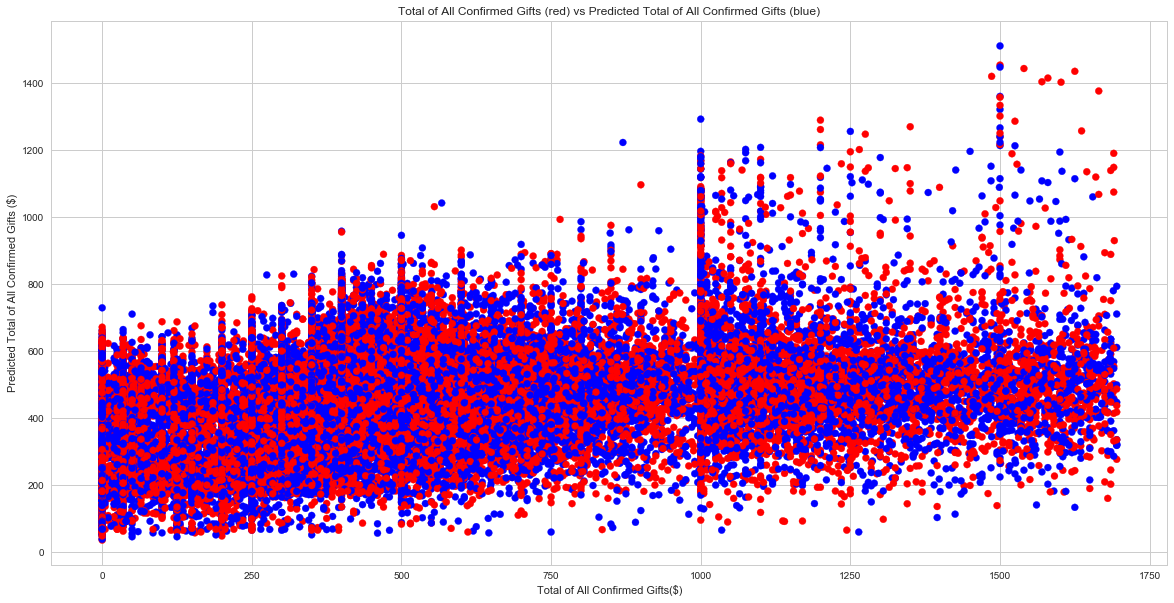

In [294]:
#scatter plot to compare actual and predicted gift

plt.figure(figsize=(20,10))

plt.scatter(y,linreg.predict(X),color=['red','blue']) 

plt.title('Total of All Confirmed Gifts (red) vs Predicted Total of All Confirmed Gifts (blue)')
plt.xlabel('Total of All Confirmed Gifts($)')

plt.ylabel('Predicted Total of All Confirmed Gifts ($)')

Text(0,0.5,'residuals')

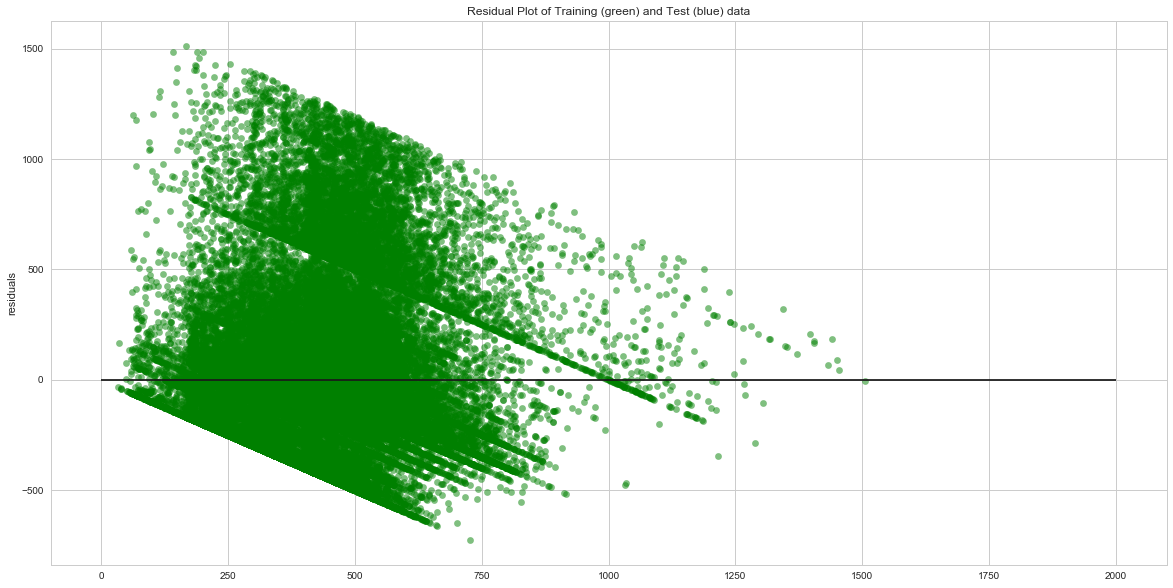

In [289]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X),y - linreg.predict(X), color=['green'],s=40,alpha=0.5)
#plt.scatter(linreg.predict(X_test),linreg.predict(X_test) - y_test, color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=2000)

plt.title('Residual Plot of Training (green) and Test (blue) data')

plt.ylabel('residuals')

In [290]:
#set up model training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [291]:
# Fitting training regression model

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [292]:
# Predict results and calculating accuracy to compare to original r^2

y_pred = linreg.predict(X)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: 0.13


Text(0,0.5,'residuals')

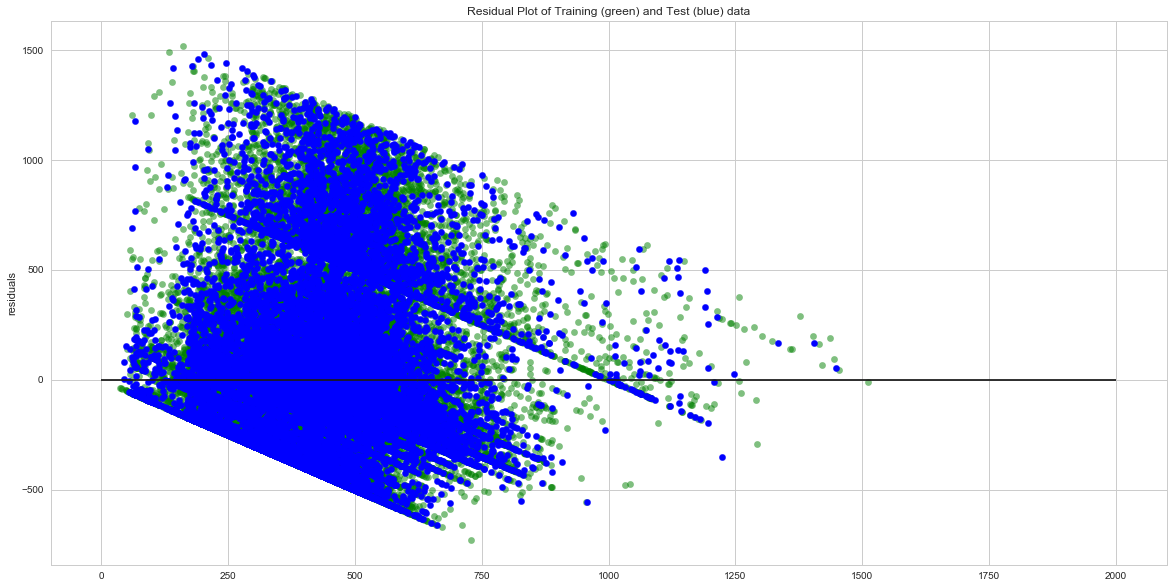

In [293]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X_train),y_train - linreg.predict(X_train), color=['green'],s=40,alpha=0.5)
plt.scatter(linreg.predict(X_test),y_test - linreg.predict(X_test), color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=2000)

plt.title('Residual Plot of Training (green) and Test (blue) data')

plt.ylabel('residuals')

### Model 3 corrected over estimation but greatly reduced the r^2.

It also appears to have changed heterskedasticity.

However, The residuals shape shows multiple linear lines with negative slope. This multiple sub collections of of highly linear relationships indicate that several Total of All Gifts ($) are dependant entirely on one of the independent variables or constant values that exist appart from the independent variables.

Revisiting the raw data again yielded 2,706 observations were the Total Not From Participant exceeded the Total of All Confirmed Gifts. These occurrences will be dropped and the 2nd model run again.

This means Total Not From Participant will be uses in X again and not Total From Participant

### Model 4: 

In [90]:
#set up data for revised regression

y = (participantsd['Total of All Confirmed Gifts($)'])
print(y.describe())

count     65499.000000
mean        856.559061
std        2490.747586
min           0.000000
25%         200.000000
50%         400.000000
75%         800.000000
max      203791.000000
Name: Total of All Confirmed Gifts($), dtype: float64


In [91]:
# dropping rows with outliers

participantsdd = participantsd[participantsd['Total of All Confirmed Gifts($)'] < 1700]
participantsdd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Event Month,Event Day,Event Year,Participation Type Name,Team Name,Team Creation Date,...,UT,VA,VI,VT,WA,WI,WV,WY,No,Yes
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25,6,25,2016,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,...,0,0,0,0,0,0,0,0,1,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,...,0,0,0,0,0,0,0,0,1,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24,6,24,2017,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,...,0,0,0,0,0,0,0,0,0,1
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29,6,29,2013,Two-Day Participant,RawHinies,2012-12-04 17:10:00,...,0,0,0,0,0,0,0,0,0,1
5,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Some Nerve,2014-11-26 11:37:00,...,0,0,0,0,0,0,0,0,0,1


In [92]:
# dropping Total Not From Participant exceeded the Total of All Confirmed Gifts occurrences
# dropping rows with outliers

participantsdd = participantsd[participantsd['Total Amount Drop'] < 1]
participantsdd.head()



,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Event Month,Event Day,Event Year,Participation Type Name,Team Name,Team Creation Date,...,UT,VA,VI,VT,WA,WI,WV,WY,No,Yes
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25,6,25,2016,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,...,0,0,0,0,0,0,0,0,1,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23,9,23,2017,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,...,0,0,0,0,0,0,0,0,1,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,...,0,0,0,0,0,0,0,0,1,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24,6,24,2017,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,...,0,0,0,0,0,0,0,0,0,1
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29,6,29,2013,Two-Day Participant,RawHinies,2012-12-04 17:10:00,...,0,0,0,0,0,0,0,0,0,1


In [93]:
y = (participantsdd['Total of All Confirmed Gifts($)'])
print(y.describe())

count     62793.000000
mean        820.619589
std        2323.096226
min           0.000000
25%         200.000000
50%         400.000000
75%         770.000000
max      203791.000000
Name: Total of All Confirmed Gifts($), dtype: float64


Text(0,0.5,'Counts')

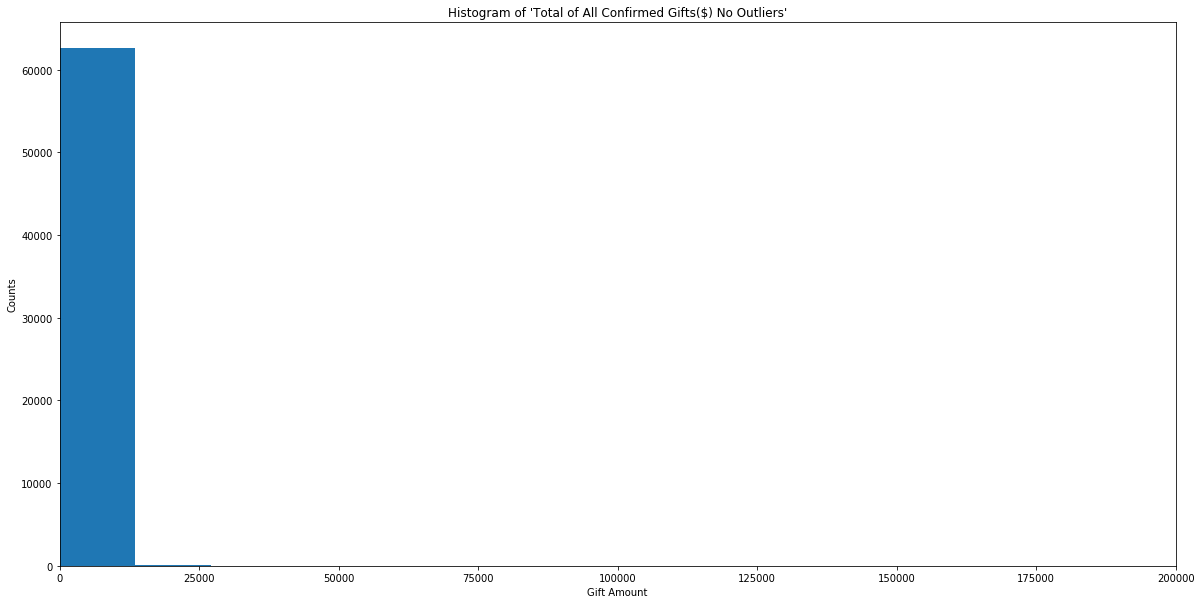

In [94]:
# Histogram of gift amounts

plt.figure(figsize=(20,10))
plot_data =y
plot_data.plot(kind='hist',bins=15).set_xlim((0.0, 200000))
plt.title("Histogram of 'Total of All Confirmed Gifts($) No Outliers'")
plt.xlabel("Gift Amount")
plt.ylabel("Counts")

In [69]:
#Left out 'Male' for gender, "Total From Participant($)" from gift amounts, 'Student' for occupation, 'Other' for connection to MS, 'School' for team division, and'ND' for state to account for dummy trap
X = participantsdd[["Total Not From Participant($)",'Event Month','Event Year','Healthcare','Engineering','Information Technology (IT)','Sales','Executive/Management','Education and Training','Consulting','Banking and Financial Services','Accounting','Legal and Paralegal','Marketing','Construction and Landscaping','Real Estate, Rental, and Leasing','Administrative, Support, and Clerical','Science and Biotechnology','Government','Insurance','Manufacturing','Retail/Wholesale','Skilled Work and Trades','Nonprofit','Fire, Law Enforcement, and Security','Human Resources','Transportation and Warehousing','Restaurant and Food Services','Arts and Entertainment','Homemaking','Hotel, Gaming, Leisure, and Travel','Media','Architecture','Environment','Facilities, Maintenance, and Repair','Telecommunications','Oil and Gas','Military','Advertising','Personal Care and Service','Aviation and Airlines','Aerospace and Defense','Stock Broker/Investment Advisor','Property Management','Social Work','Clergy','Psychology','Agriculture, Forestry, and Fishing','Photography','Publishing','Technical Account Manager','Retired','Relative has MS','None','I have MS','Parent has MS','Spouse has MS','Child has MS','Sibling has MS','TX', 'PA', 'NJ', 'CA', 'MN', 'NY', 'FL', 'MA', 'IL', 'MI', 'OH', 'NC', 'WA', 'CO', 'MO', 'UT', 'MD', 'VA', 'CT', 'AZ', 'GA', 'WI', 'KY', 'KS', 'TN', 'AL', 'AR', 'DE', 'NH', 'DC', 'IN', 'OK', 'IA', 'AK', 'RI', 'RI', 'NM', 'NE', 'NV', 'OR', 'MS', 'SD', 'WV', 'LA', 'ME', 'SC','MT','Family and Friends','Corporate', 'Other','Organization (Clubs; Civic Groups; Place of Worship; etc.)','Female']]
X = sm.add_constant(X)
#check data

X.head()


,const,Total Not From Participant($),Event Month,Event Year,Healthcare,Engineering,Information Technology (IT),Sales,Executive/Management,Education and Training,...,LA,ME,SC,MT,Family and Friends,Corporate,Other,Other,Organization (Clubs; Civic Groups; Place of Worship; etc.),Female
0,1.0,413.00,6,2016,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1.0,1805.00,9,2017,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1.0,400.00,6,2015,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,531.16,6,2017,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,1070.00,6,2013,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [70]:
#run ols regression

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Total of All Confirmed Gifts($)   R-squared:                       0.957
Model:                                         OLS   Adj. R-squared:                  0.957
Method:                              Least Squares   F-statistic:                 1.235e+04
Date:                             Thu, 19 Jul 2018   Prob (F-statistic):               0.00
Time:                                     13:42:42   Log-Likelihood:            -4.7726e+05
No. Observations:                            62793   AIC:                         9.547e+05
Df Residuals:                                62680   BIC:                         9.558e+05
Df Model:                                      112                                         
Covariance Type:                         nonrobust                                         
                                                                 coef    std err

### OLS Regression results indicated the following variables were significant at the 95% level.


| Variable| coef |   std err  |         t   |    P>*t*  |     [0.025  |     0.975]| 
| ------------- |-------------| -----| -----| -----| -----| 
| const	| -7923.9167	| 2960.002	| -2.677	| 0.007	| -13700	| -2122.307
| Total Not From Participant($)	| 1.0402	| 0.001	| 1157.568	| 0	| 1.038	| 1.042
| Event Year	| 3.9525	| 1.468	| 2.692	| 0.007	| 1.075	| 6.83
| Healthcare	| 30.1557	| 10.599	| 2.845	| 0.004	| 9.382	| 50.93
| Executive/Management	| 40.3635	| 14.362	| 2.81	| 0.005	| 12.213	| 68.514
| Consulting	| 123.2248	| 17.148	| 7.186	| 0	| 89.615	| 156.835
| Legal and Paralegal	| 80.7371	| 18.671	| 4.324	| 0	| 44.141	| 117.333
| Marketing	| -41.1358	| 20.339	| -2.023	| 0.043	| -80.999	| -1.272
| Real Estate, Rental, and Leasing	| 50.0844	| 22.214	| 2.255	| 0.024	| 6.544	| 93.625
| Hotel, Gaming, Leisure, and Travel	| -82.6985	| 34.902	| -2.369	| 0.018	| -151.107	| -14.29
| Relative has MS	| 38.8319	| 6.676	| 5.817	| 0	| 25.747	| 51.916
| None	| 376.1461	| 183.727	| 2.047	| 0.041	| 16.041	| 736.251
| I have MS	| 47.7738	| 10.134	| 4.714	| 0	| 27.911	| 67.637
| Spouse has MS	| 53.0393	| 11.591	| 4.576	| 0	| 30.322	| 75.757
| TX	| 52.9261	| 23.346	| 2.267	| 0.023	| 7.169	| 98.684
| CO	| 58.2961	| 16.481	| 3.537	| 0	| 25.994	| 90.598
| VA	| 71.4748	| 20.784	| 3.439	| 0.001	| 30.739	| 112.211
| CT	| 65.2014	| 18.436	| 3.537	| 0	| 29.067	| 101.335
| NH	| 284.995	| 69.66	| 4.091	| 0	| 148.461	| 421.529
| NE	| 188.3212	| 68.572	| 2.746	| 0.006	| 53.92	| 322.723
| Family and Friends	| 23.6098	| 5.397	| 4.375	| 0	| 13.032	| 34.187
| Other	| 32.159	| 9.689	| 3.319	| 0.001	| 13.169	| 51.149
| Female	| -33.9082	| 4.177	| -8.118	| 0	| -42.095	| -25.721

### Initial OLS regression results revealed that the following variables had p values greater than 0.05 and confidence intervals about zero, which indicated they were not significant at the 95% level.
  *  Event Month
  *  Engineering
  *  Information Technology (IT)
  *  Sales
  *  Education and Training
  *  Banking and Financial Services
  *  Accounting
  *  Construction and Landscaping
  *  Administrative, Support, and Clerical
  *  Science and Biotechnology
  *  Government
  *  Insurance
  *  Manufacturing
  *  Retail/Wholesale
  *  Skilled Work and Trades
  *  Nonprofit
  *  Fire, Law Enforcement, and Security
  *  Human Resources
  *  Transportation and Warehousing
  *  Restaurant and Food Services
  *  Arts and Entertainment
  *  Homemaking
  *  Media
  *  Architecture
  *  Environment
  *  Facilities, Maintenance, and Repair
  *  Telecommunications
  *  Oil and Gas
  *  Military
  *  Advertising
  *  Personal Care and Service
  *  Aviation and Airlines
  *  Aerospace and Defense
  *  Stock Broker/Investment Advisor
  *  Property Management
  *  Social Work
  *  Clergy
  *  Psychology
  *  Agriculture, Forestry, and Fishing
  *  Photography
  *  Publishing
  *  Technical Account Manager
  *  Retired
  *  None
  *  Parent has MS
  *  Child has MS
  *  Sibling has MS
  *  PA
  *  NJ
  *  CA
  *  MN
  *  NY
  *  FL
  *  MA
  *  IL
  *  MI
  *  OH
  *  NC
  *  WA
  *  MO
  *  UT
  *  MD
  *  AZ
  *  GA
  *  WI
  *  KY
  *  KS
  *  TN
  *  AL
  *  AR
  *  DE
  *  DC
  *  IN
  *  OK
  *  IA
  *  AK
  *  RI
  *  RI
  *  NM
  *  NV
  *  OR
  *  MS
  *  SD
  *  WV
  *  LA
  *  ME
  *  SC
  *  MT
  *  Corporate
  *  Other
  *  Organization (Clubs; Civic Groups; Place of Worship; etc.)

In [71]:
#compute the condition number to assess multicollinearity. according to Greene, >20 conditional number is bad (https://www.amazon.com/Econometric-Analysis-8th-William-Greene/dp/0134461363/ref=dp_ob_title_bk)
np.linalg.cond(X.values)

2.5778773243305869e+20

In [72]:
# confirming Y values 
y.describe()

count     62793.000000
mean        820.619589
std        2323.096226
min           0.000000
25%         200.000000
50%         400.000000
75%         770.000000
max      203791.000000
Name: Total of All Confirmed Gifts($), dtype: float64

In [73]:
# Fitting regression model

linreg = LinearRegression()

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
#checking the r^2 score 

linreg.score(X, y)



0.95663880240681365

In [75]:
# predicting gift amount
linreg.predict(X)

array([  513.84833164,  1968.90819258,   560.43698324, ...,   503.31988352,
          79.49974068,    79.49974068])

In [76]:
# exporting predictions to csv 

#prediction = linreg.predict(X)

#prediction = pd.DataFrame(prediction, columns=['predictions']).to_csv('prediction.csv')

Text(0,0.5,'Predicted Total of All Confirmed Gifts ($)')

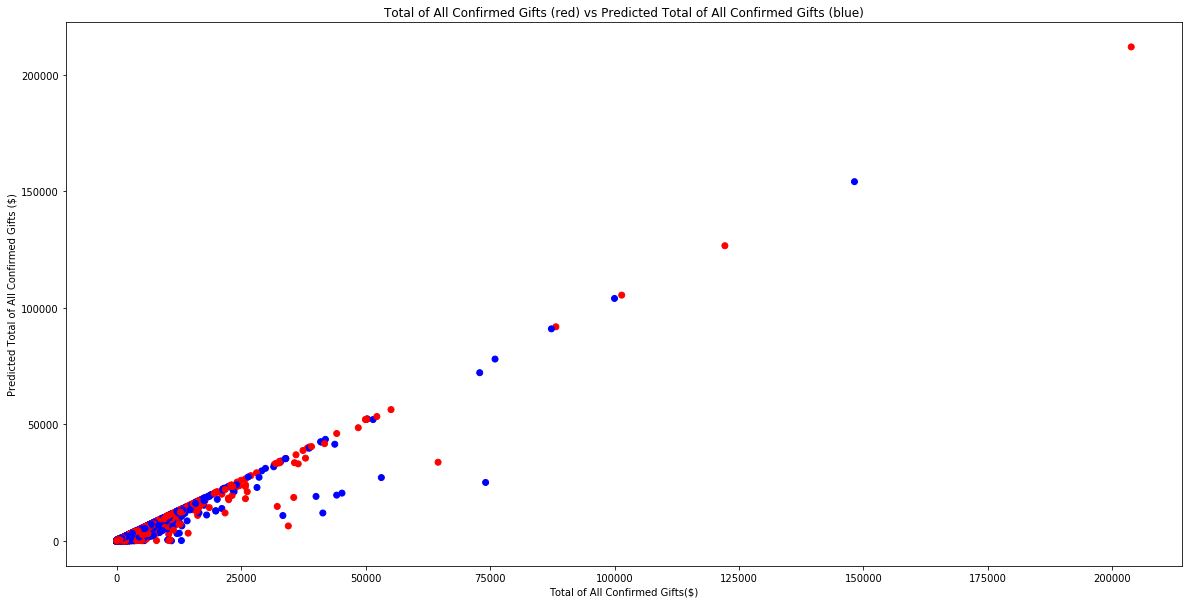

In [77]:
#scatter plot to compare actual and predicted gift

plt.figure(figsize=(20,10))

plt.scatter(y,linreg.predict(X),color=['red','blue']) 

plt.title('Total of All Confirmed Gifts (red) vs Predicted Total of All Confirmed Gifts (blue)')
plt.xlabel('Total of All Confirmed Gifts($)')

plt.ylabel('Predicted Total of All Confirmed Gifts ($)')

Text(0,0.5,'residuals')

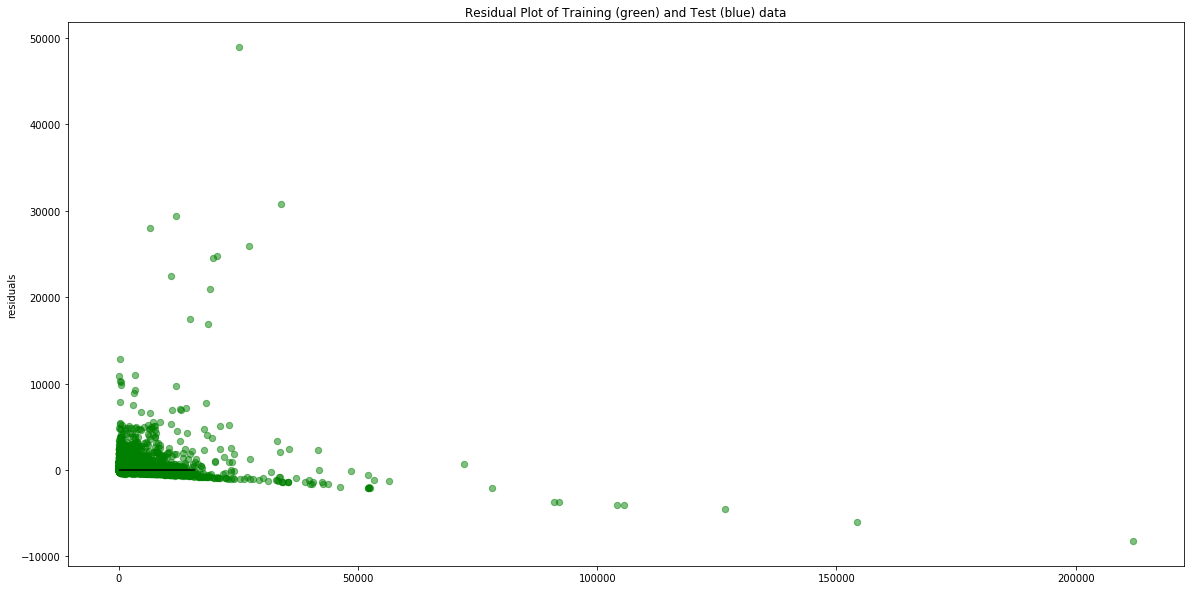

In [78]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X),y - linreg.predict(X), color=['green'],s=40,alpha=0.5)
#plt.scatter(linreg.predict(X_test),linreg.predict(X_test) - y_test, color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=16000)

plt.title('Residual Plot of Training (green) and Test (blue) data')

plt.ylabel('residuals')

In [79]:
#Heterskedasticity Test: Breush-Pagan test
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(results.resid, results.model.exog)
lzip(name, test)

C:\Users\millsj.ADMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  after removing the cwd from sys.path.


[('Lagrange multiplier statistic', 985.4012543610055),
 ('p-value', 3.4369312510759378e-139),
 ('f-value', 8.922410587284956),
 ('f p-value', 5.3882158080313957e-141)]

In [80]:
#set up model training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [81]:
# Fitting training regression model

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
# Predict results and calculating accuracy to compare to original r^2

y_pred = linreg.predict(X)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: 0.97


In [83]:
linreg.score(X_test, y_test)

0.96502825093826072

Text(0,0.5,'residuals')

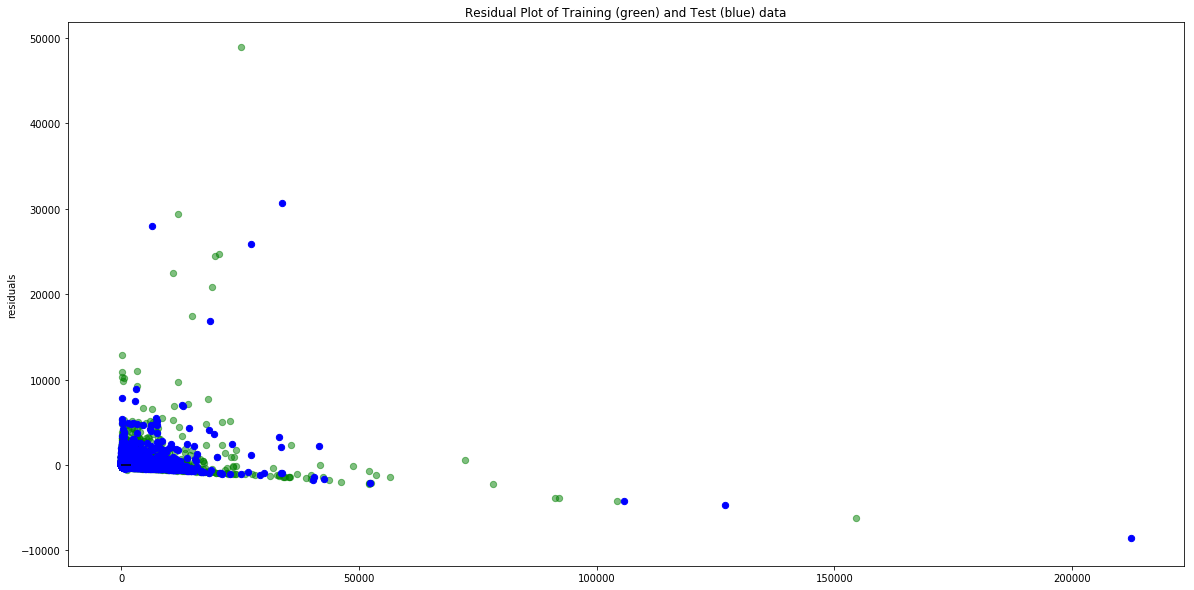

In [84]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X_train),y_train - linreg.predict(X_train), color=['green'],s=40,alpha=0.5)
plt.scatter(linreg.predict(X_test),y_test - linreg.predict(X_test), color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=2000)

plt.title('Residual Plot of Training (green) and Test (blue) data')

plt.ylabel('residuals')

In [85]:
#Heterskedasticity Test: Breush-Pagan test
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(results.resid, results.model.exog)
lzip(name, test)

C:\Users\millsj.ADMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  after removing the cwd from sys.path.


[('Lagrange multiplier statistic', 985.4012543610055),
 ('p-value', 3.4369312510759378e-139),
 ('f-value', 8.922410587284956),
 ('f p-value', 5.3882158080313957e-141)]

### Model 4 is clearly the best fit thus far and reported the best r^2 of 0.957.

It also appears to have changed heterskedasticity back to model one but with reduced severity.

In [ ]:
#Examined Correlation results for correlations over 0.9, Event Year and Fiscal Year were highly correlated with Event ID. Total Not From Participant($) was also highly correlated with Total of All Confirmed Gifts($).
# Total of All Confirmed Gifts($), Total Not From Participant($), Number Not From Participant, Total From Participant($), Yes, Number From Participant, Is Team Captain, Emails Sent, Suggested Participant Goal($), I have MS, Total Amount Drop, Spouse has MS, Event Day are highest correlated variables with Total of All Confirmed Gifts. 
#Rerunning model with only those variables. 



    

### Model 5 Dropping variables based on correlation

In [108]:
# dropping rows with outliers

participantsdd = participantsd[participantsd['Total of All Confirmed Gifts($)'] < 1700]
participantsdd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Event Month,Event Day,Event Year,Participation Type Name,Team Name,Team Creation Date,...,UT,VA,VI,VT,WA,WI,WV,WY,No,Yes
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25,6,25,2016,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,...,0,0,0,0,0,0,0,0,1,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,...,0,0,0,0,0,0,0,0,1,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24,6,24,2017,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,...,0,0,0,0,0,0,0,0,0,1
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29,6,29,2013,Two-Day Participant,RawHinies,2012-12-04 17:10:00,...,0,0,0,0,0,0,0,0,0,1
5,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Some Nerve,2014-11-26 11:37:00,...,0,0,0,0,0,0,0,0,0,1


In [109]:
# dropping Total Not From Participant exceeded the Total of All Confirmed Gifts occurrences
# dropping rows with outliers

participantsdd = participantsd[participantsd['Total Amount Drop'] < 1]
participantsdd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Event Month,Event Day,Event Year,Participation Type Name,Team Name,Team Creation Date,...,UT,VA,VI,VT,WA,WI,WV,WY,No,Yes
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25,6,25,2016,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,...,0,0,0,0,0,0,0,0,1,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23,9,23,2017,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,...,0,0,0,0,0,0,0,0,1,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27,6,27,2015,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,...,0,0,0,0,0,0,0,0,1,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24,6,24,2017,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,...,0,0,0,0,0,0,0,0,0,1
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29,6,29,2013,Two-Day Participant,RawHinies,2012-12-04 17:10:00,...,0,0,0,0,0,0,0,0,0,1


In [114]:
y = (participantsdd['Total of All Confirmed Gifts($)'])
print(y.describe())

count     62793.000000
mean        820.619589
std        2323.096226
min           0.000000
25%         200.000000
50%         400.000000
75%         770.000000
max      203791.000000
Name: Total of All Confirmed Gifts($), dtype: float64


In [133]:
#Left out 'Male' for gender, "Total From Participant($)" from gift amounts, 'Student' for occupation, 'Other' for connection to MS, 'School' for team division, and'ND' for state to account for dummy trap
X = participantsdd[["Total Not From Participant($)", 'Number Not From Participant','Total From Participant($)','Yes','Number From Participant','Emails Sent']]
X = sm.add_constant(X)
#check data

X.head()


,const,Total Not From Participant($),Number Not From Participant,Total From Participant($),Yes,Number From Participant,Emails Sent
0,1.0,413.00,7,250.0,0,1,0
1,1.0,1805.00,22,135.0,0,2,159
2,1.0,400.00,1,0.0,0,0,0
3,1.0,531.16,5,100.0,1,1,0
4,1.0,1070.00,16,25.0,1,1,407


In [134]:
#run ols regression

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Total of All Confirmed Gifts($)   R-squared:                       1.000
Model:                                         OLS   Adj. R-squared:                  1.000
Method:                              Least Squares   F-statistic:                 2.819e+07
Date:                             Thu, 19 Jul 2018   Prob (F-statistic):               0.00
Time:                                     15:48:34   Log-Likelihood:            -3.2778e+05
No. Observations:                            62793   AIC:                         6.556e+05
Df Residuals:                                62786   BIC:                         6.556e+05
Df Model:                                        6                                         
Covariance Type:                         nonrobust                                         
                                    coef    std err          t      P>|t|      [

### OLS Regression results indicated the following variables were significant at the 95% level.


| Variable| coef |   std err  |         t   |    P>*t*  |     [0.025  |     0.975]| 
| ------------- |-------------| -----| -----| -----| -----| 
| const	| 1.7201	| 0.282	| 6.102	| 0	| 1.168	| 2.273
| Total Not From Participant	| 0.9993	| 0	| 9752.322	| 0	| 0.999	| 1
| Number Not From Participant	| -0.1991	| 0.02	| -9.994	| 0	| -0.238	| -0.16
| Total From Participant	| 0.9833	| 0	| 2600.333	| 0	| 0.983	| 0.984
| Number From Participant	| -1.5973	| 0.173	| -9.249	| 0	| -1.936	| -1.259


### OLS regression results revealed that the following variables had p values greater than 0.05 and confidence intervals about zero, which indicated they were not significant at the 95% level.
  *  Yes
  *  Emails Sent

In [135]:
#compute the condition number to assess multicollinearity. according to Greene, >20 conditional number is bad (https://www.amazon.com/Econometric-Analysis-8th-William-Greene/dp/0134461363/ref=dp_ob_title_bk)
np.linalg.cond(X.values)

5250.0977316484923

In [136]:
# confirming Y values 
y.describe()

count     62793.000000
mean        820.619589
std        2323.096226
min           0.000000
25%         200.000000
50%         400.000000
75%         770.000000
max      203791.000000
Name: Total of All Confirmed Gifts($), dtype: float64

In [137]:
# Fitting regression model

linreg = LinearRegression()

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [138]:
#checking the r^2 score 

linreg.score(X, y)

0.99962893020943711

In [139]:
# predicting gift amount
linreg.predict(X)

array([  6.57278562e+02,   1.93069063e+03,   4.01250164e+02, ...,
         6.54685230e+02,   1.72011490e+00,   1.72011490e+00])

Text(0,0.5,'Predicted Total of All Confirmed Gifts ($)')

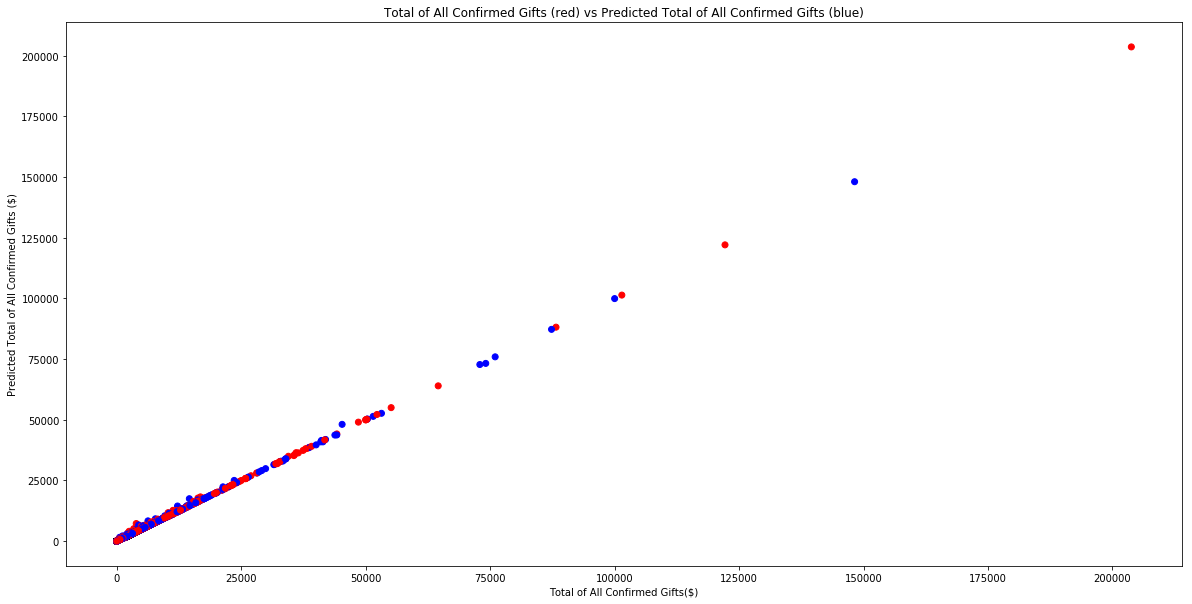

In [140]:
#scatter plot to compare actual and predicted gift

plt.figure(figsize=(20,10))

plt.scatter(y,linreg.predict(X),color=['red','blue']) 

plt.title('Total of All Confirmed Gifts (red) vs Predicted Total of All Confirmed Gifts (blue)')
plt.xlabel('Total of All Confirmed Gifts($)')

plt.ylabel('Predicted Total of All Confirmed Gifts ($)')

Text(0,0.5,'residuals')

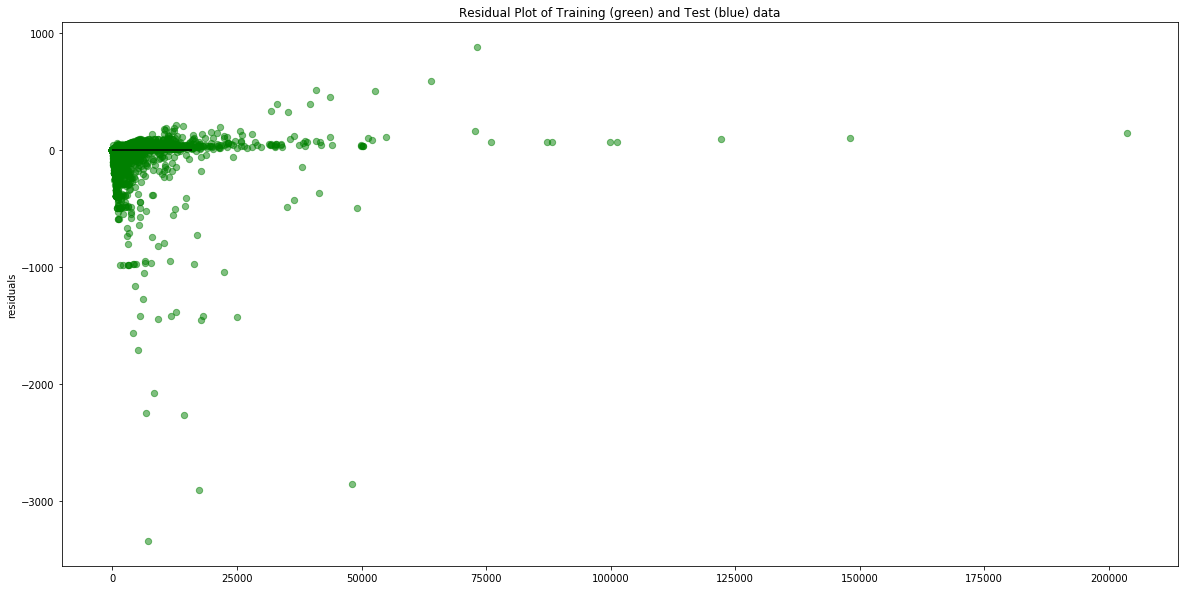

In [141]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X),y - linreg.predict(X), color=['green'],s=40,alpha=0.5)
#plt.scatter(linreg.predict(X_test),linreg.predict(X_test) - y_test, color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=16000)

plt.title('Residual Plot of Training (green) and Test (blue) data')

plt.ylabel('residuals')

In [142]:
#Heterskedasticity Test: Breush-Pagan test
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(results.resid, results.model.exog)
lzip(name, test)

C:\Users\millsj.ADMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  after removing the cwd from sys.path.


[('Lagrange multiplier statistic', 3121.7945519714394),
 ('p-value', 0.0),
 ('f-value', 547.45833513394166),
 ('f p-value', 0.0)]

In [143]:
#set up model training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [144]:
# Fitting training regression model

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [145]:
# Predict results and calculating accuracy to compare to original r^2

y_pred = linreg.predict(X)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: 1.00


In [146]:
linreg.score(X_test, y_test)

0.99962059513399903

Text(0,0.5,'residuals')

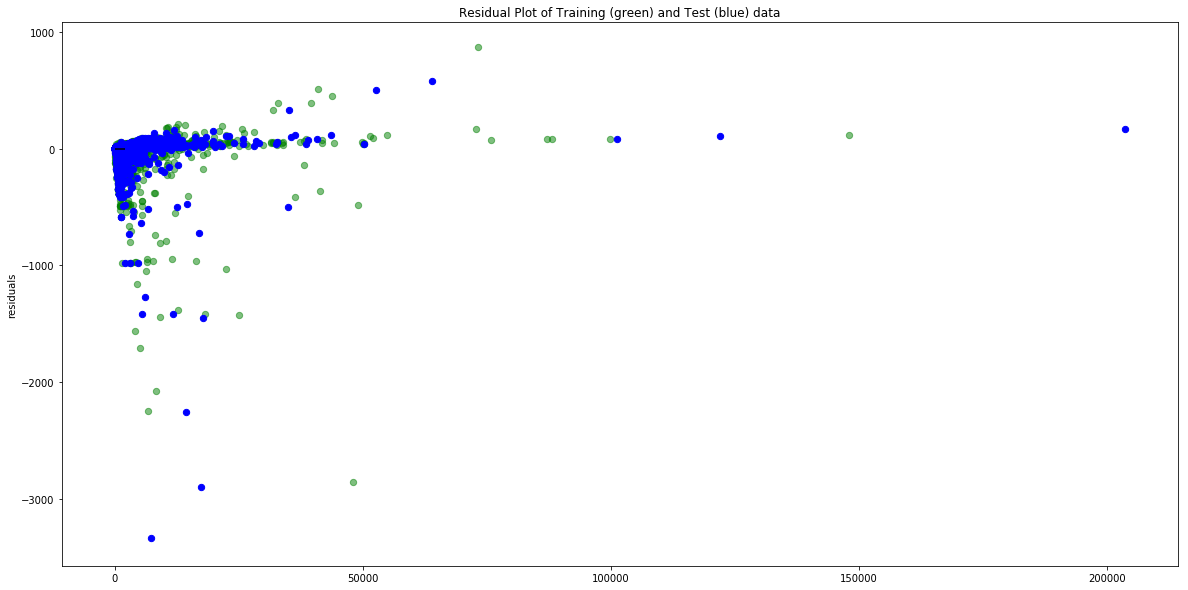

In [147]:
# Residuals
plt.figure(figsize=(20,10))

plt.scatter(linreg.predict(X_train),y_train - linreg.predict(X_train), color=['green'],s=40,alpha=0.5)
plt.scatter(linreg.predict(X_test),y_test - linreg.predict(X_test), color=['blue'],s=40)
plt.hlines(y=0,xmin=0,xmax=2000)

plt.title('Residual Plot of Training (green) and Test (blue) data')

plt.ylabel('residuals')

In [148]:
#Heterskedasticity Test: Breush-Pagan test
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(results.resid, results.model.exog)
lzip(name, test)

C:\Users\millsj.ADMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  after removing the cwd from sys.path.


[('Lagrange multiplier statistic', 3121.7945519714394),
 ('p-value', 0.0),
 ('f-value', 547.45833513394166),
 ('f p-value', 0.0)]

# FIRST PRIORITY: CORPORATE ACQUISITION
  * What are the greatest growth opportunities for new corporate teams?
  * Can we apply those opportunities to specific rides/markets, especially our biggest events?
  * What industries have had the strongest involvement in Bike MS in the last five years?
  * What occupations were responsible for most of our fundraising?
  * Can we tie together these industries and occupations to identify gaps/opportunities?
  * What is the common denominator for our top performing corporate teams? (Is it industry, culture, executive involvement, connection to MS, other?)
  * Can we quantify the effect competing events are having in our top markets? 
Top competitors:
   1. Best Buddies
     * HYANNIS PORT June 2, 2018 Boston to Hyannis Port, MA
     * HEARST CASTLE September 8, 2018 San Simeon, CA
     * MIAMI November 16, 2018 Miami, FL
   2. Peddle the Cause
     * Louis
     * San Diego
   3. Pelatonia – OH
   4. PanMass Challenge - Boston
   5. ADA – Tour de Cure
   6. Jude Children’s Research Hospital
   7. JDRF Ride to Cure Diabetes
   8. Cycle for Life - Cystic Fibrosis Foundation
   9. Ride to Recovery
   10. Virtual Cycling
   11. Athletic Club Stationary Cycling Relays
   12. American Cancer Society
   13. Leukemia and Lymphoma Society – Team in Training

# SECOND PRIORITY: DIGITAL/SOCIAL ACQUISITION
  * What are the greatest opportunities for digital marketing investments? Where have we seen the greatest ROI?
  * Once someone is registered, what tactics and behaviors drive fundraising, and at what times leading up to the event?
  * What behavioral data do you see about usage of our fundraising tools and how it may or may not relate to performance of top fundraisers?
  * Despite increasing our digital advertising spend, acquisition continues to trend downward overall. Why? Is it an issue of needing more traffic, better targeting, or a conversion rate issue that needs to be addressed through the registration process? What can we do to reverse the trend?


# FINALLY:
  * As you studied this data, is there something else that came up as an insight into our operations that the questions above do not capture? 


# Descriptive Analytics